# CounterFactual Experiment

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import itertools
import warnings
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.utils import Bunch
from typing import cast
from CounterFactualModel import CounterFactualModel
from ConstraintParser import ConstraintParser
import CounterFactualVisualizer as CounterFactualVisualizer
importlib.reload(CounterFactualVisualizer)
from CounterFactualVisualizer import (plot_pca_with_counterfactual, plot_sample_and_counterfactual_heatmap, 
                                     plot_pca_loadings, plot_constraints, 
                                     plot_sample_and_counterfactual_comparison, plot_pairwise_with_counterfactual_df,plot_pca_with_counterfactuals)
from CounterFactualExplainer import CounterFactualExplainer

warnings.filterwarnings("ignore")

## Setup + Constants

In [2]:
CLASS_COLORS_LIST = ['purple', 'green', 'orange']
IRIS: Bunch = cast(Bunch, load_iris())
IRIS_FEATURES = IRIS.data
IRIS_LABELS = IRIS.target

TRAIN_FEATURES, TEST_FEATURES, TRAIN_LABELS, TEST_LABELS = train_test_split(IRIS_FEATURES, IRIS_LABELS, test_size=0.3, random_state=42)

MODEL = RandomForestClassifier(n_estimators=3, random_state=42)
MODEL.fit(TRAIN_FEATURES, TRAIN_LABELS)


ORIGINAL_SAMPLE = {'petal width (cm)': 6.1, 'petal length (cm)': 2.8, 'sepal length (cm)': 4.7, 'sepal width (cm)': 1.2}
SAMPLE_DATAFRAME = pd.DataFrame([ORIGINAL_SAMPLE])  # Wrapping sample in a list to create a DataFrame

CONSTRAINT_PARSER = ConstraintParser("constraints/custom_l100_pv0.001_t2_dpg_metrics.txt")
CONSTRAINTS = CONSTRAINT_PARSER.read_constraints_from_file()

cf_dpg = CounterFactualModel(MODEL, CONSTRAINTS, verbose=True)  # Ensure you are using the correct constraints (nested_dict)
TARGET_CLASS = 0
ORIGINAL_SAMPLE_PREDICTED_CLASS = MODEL.predict(SAMPLE_DATAFRAME)
print(ORIGINAL_SAMPLE_PREDICTED_CLASS)

[1]


## Constraints Extracted from DPG

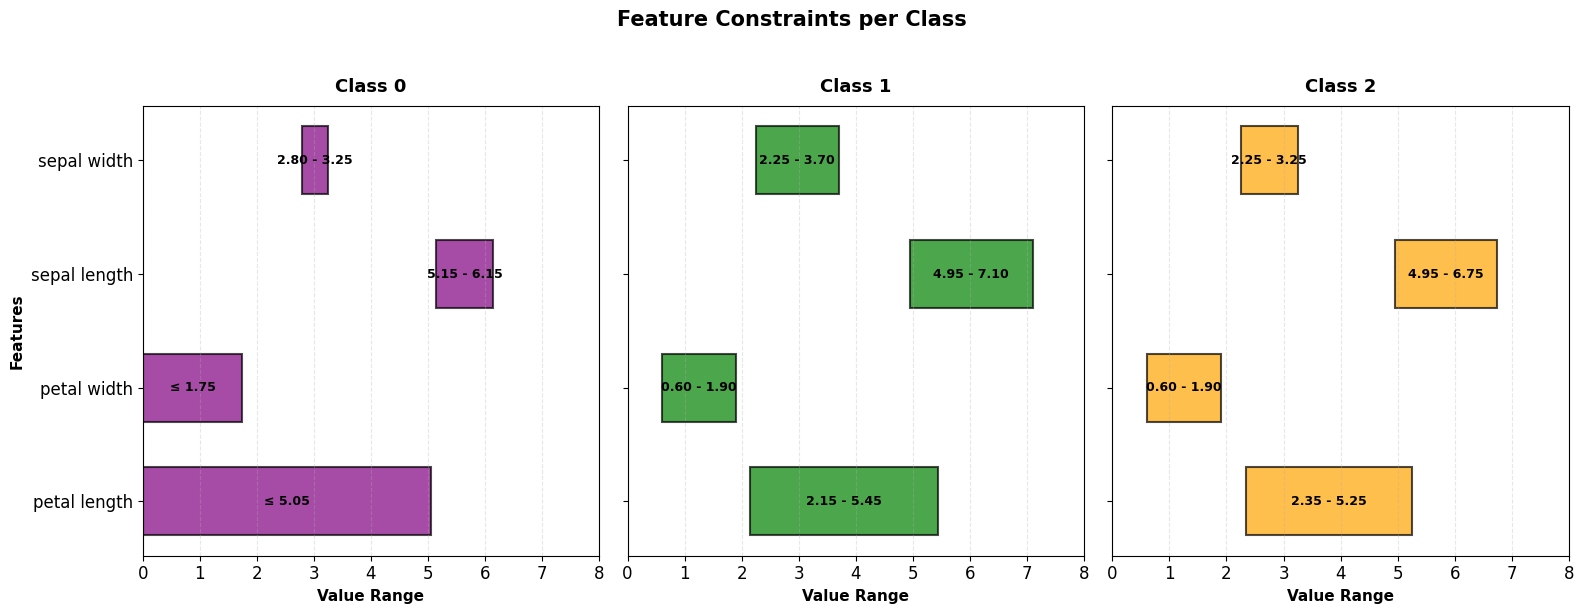

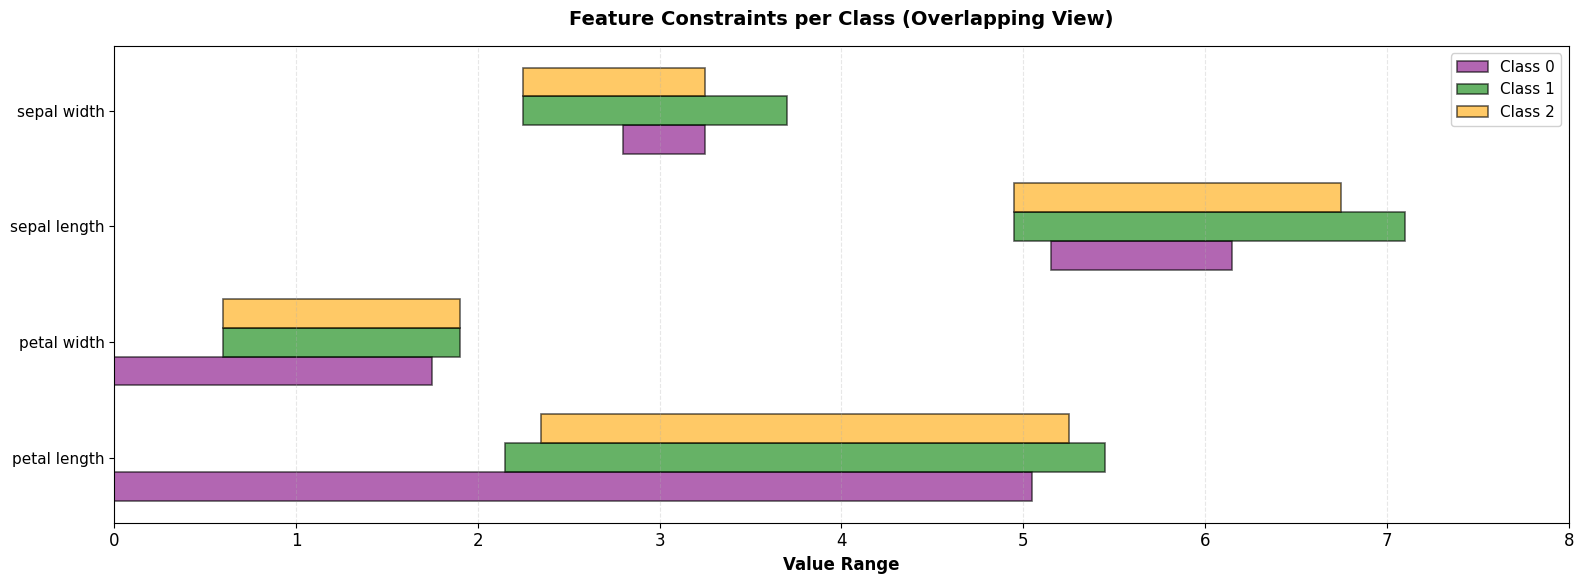

In [3]:

plot_constraints(CONSTRAINTS, overlapping=False, class_colors_list=CLASS_COLORS_LIST)
plot_constraints(CONSTRAINTS, overlapping=True, class_colors_list=CLASS_COLORS_LIST)

## Visualizing Counterfactual Samples

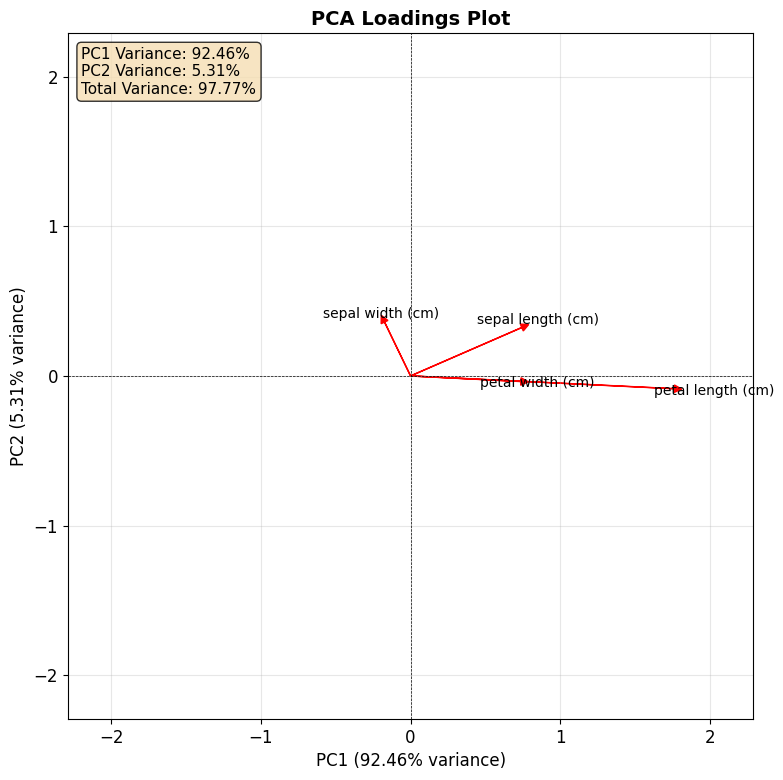

In [4]:
plot_pca_loadings(IRIS_FEATURES, IRIS.feature_names)

## Generate Counterfactuals with All Rule Combinations

Generating counterfactual with constraints: {'petal width (cm)': 'non_increasing', 'petal length (cm)': 'non_increasing', 'sepal length (cm)': 'non_increasing', 'sepal width (cm)': 'non_increasing'}


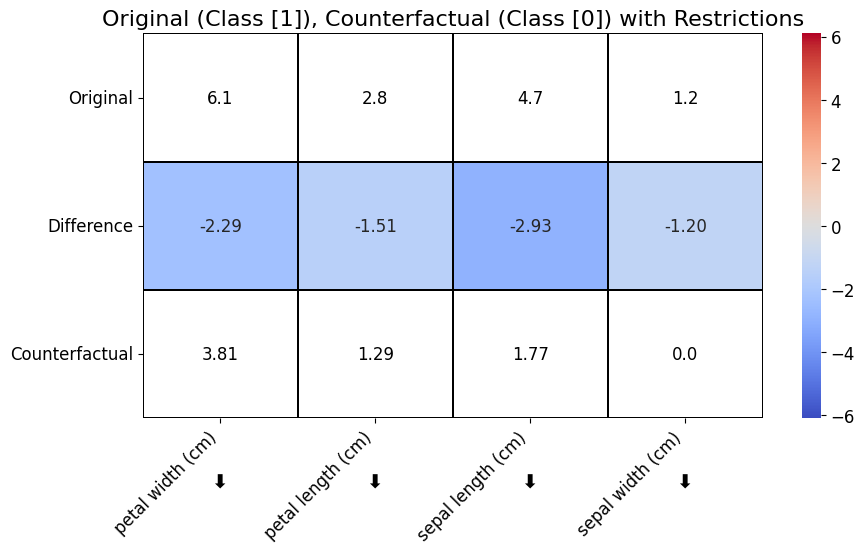

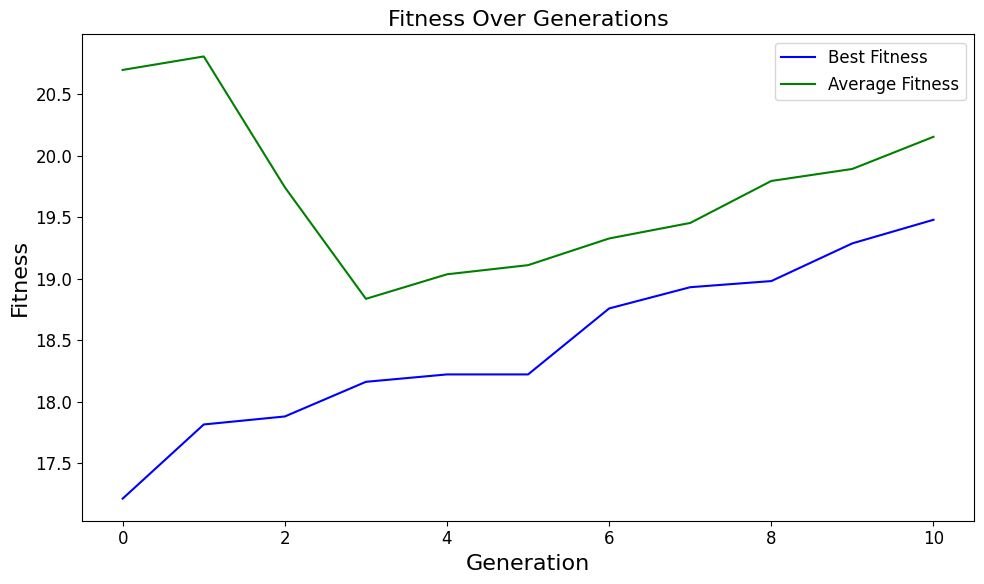

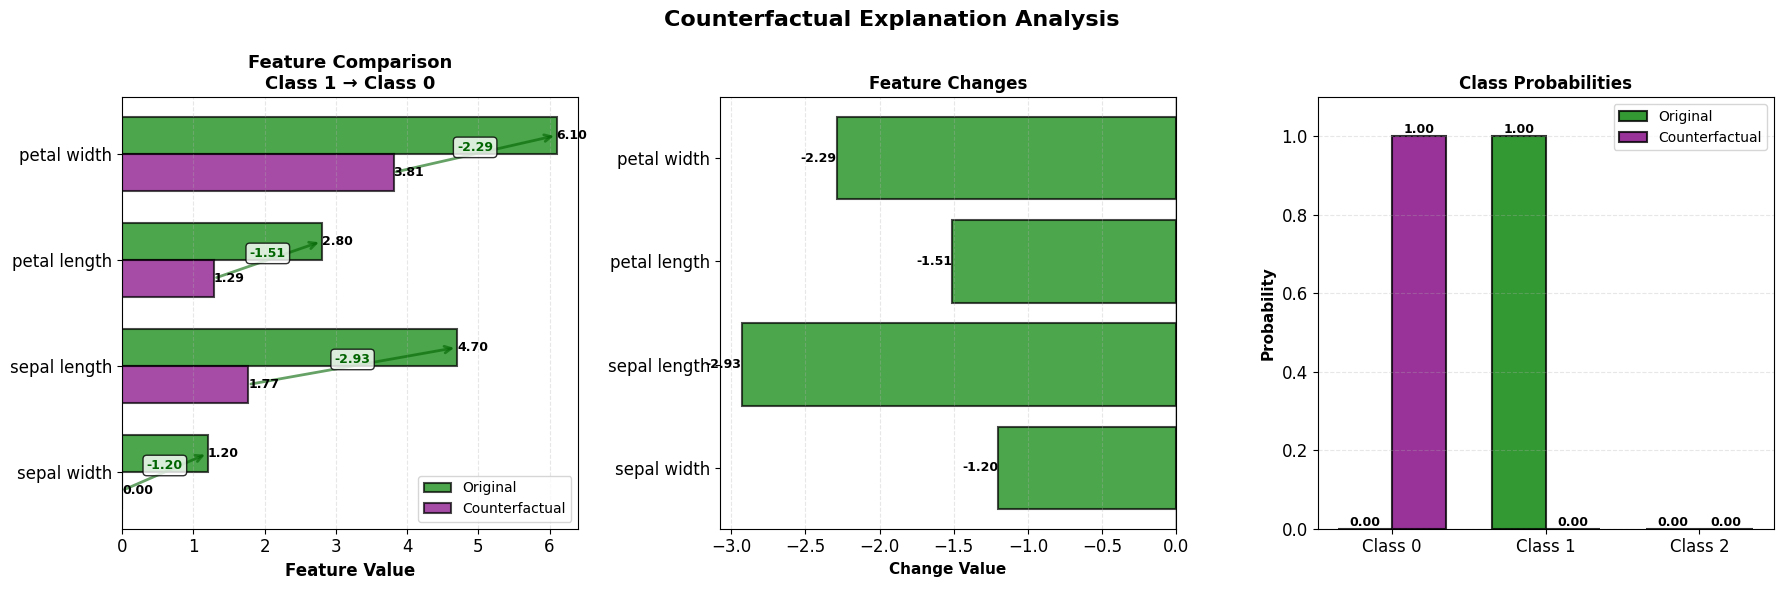

Feature 'petal width (cm)' changed from 6.1 to 3.81.
Feature 'petal length (cm)' changed from 2.8 to 1.29.
Feature 'sepal length (cm)' changed from 4.7 to 1.77.
Feature 'sepal width (cm)' changed from 1.2 to 0.
All constraints were respected.
Stopping criteria not set or not reached.
Original class: 1, Counterfactual class: 0
Original fitness: inf, Best fitness: inf
Generating counterfactual with constraints: {'petal width (cm)': 'non_increasing', 'petal length (cm)': 'non_increasing', 'sepal length (cm)': 'non_increasing', 'sepal width (cm)': 'non_decreasing'}
Generating counterfactual with constraints: {'petal width (cm)': 'non_increasing', 'petal length (cm)': 'non_increasing', 'sepal length (cm)': 'non_decreasing', 'sepal width (cm)': 'non_increasing'}
Generating counterfactual with constraints: {'petal width (cm)': 'non_increasing', 'petal length (cm)': 'non_increasing', 'sepal length (cm)': 'non_decreasing', 'sepal width (cm)': 'non_increasing'}


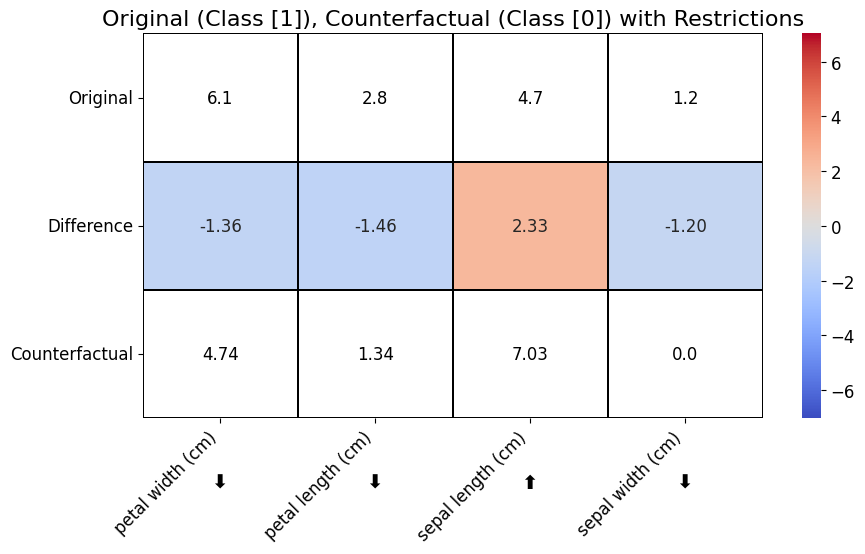

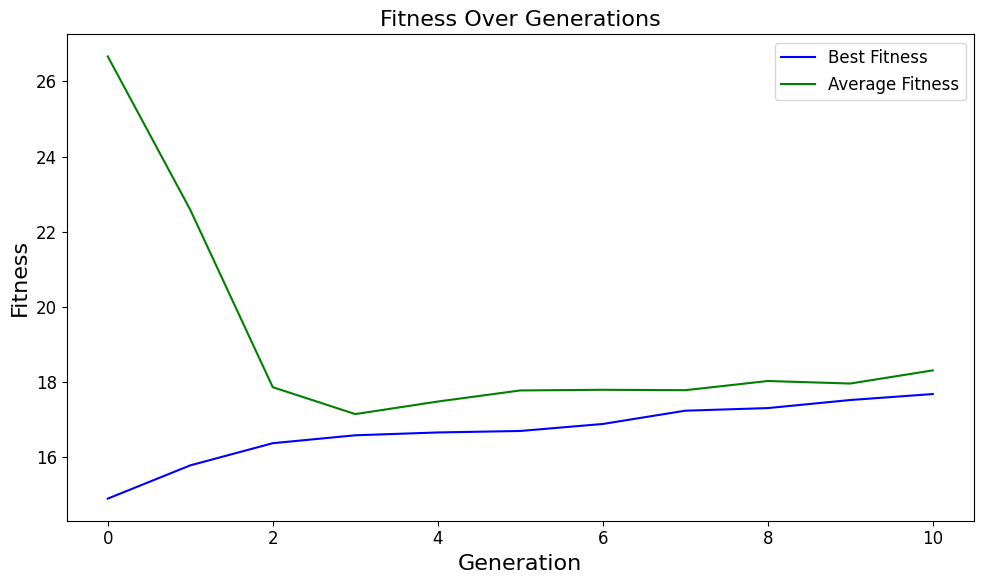

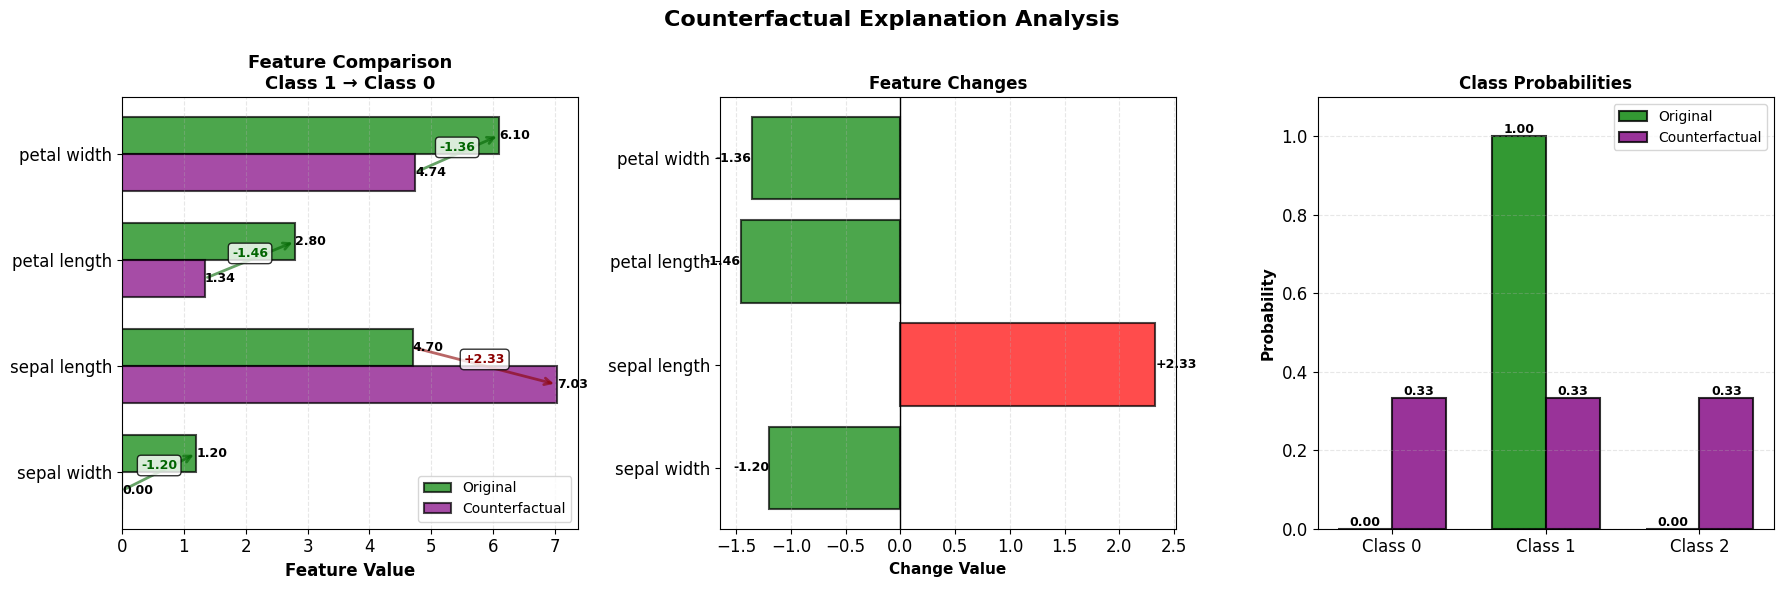

Feature 'petal width (cm)' changed from 6.1 to 4.74.
Feature 'petal length (cm)' changed from 2.8 to 1.34.
Feature 'sepal length (cm)' changed from 4.7 to 7.03.
Feature 'sepal width (cm)' changed from 1.2 to 0.
All constraints were respected.
Stopping criteria not set or not reached.
Original class: 1, Counterfactual class: 0
Original fitness: inf, Best fitness: inf
Generating counterfactual with constraints: {'petal width (cm)': 'non_increasing', 'petal length (cm)': 'non_increasing', 'sepal length (cm)': 'non_decreasing', 'sepal width (cm)': 'non_decreasing'}
Generating counterfactual with constraints: {'petal width (cm)': 'non_increasing', 'petal length (cm)': 'non_decreasing', 'sepal length (cm)': 'non_increasing', 'sepal width (cm)': 'non_increasing'}
Generating counterfactual with constraints: {'petal width (cm)': 'non_increasing', 'petal length (cm)': 'non_decreasing', 'sepal length (cm)': 'non_increasing', 'sepal width (cm)': 'non_increasing'}


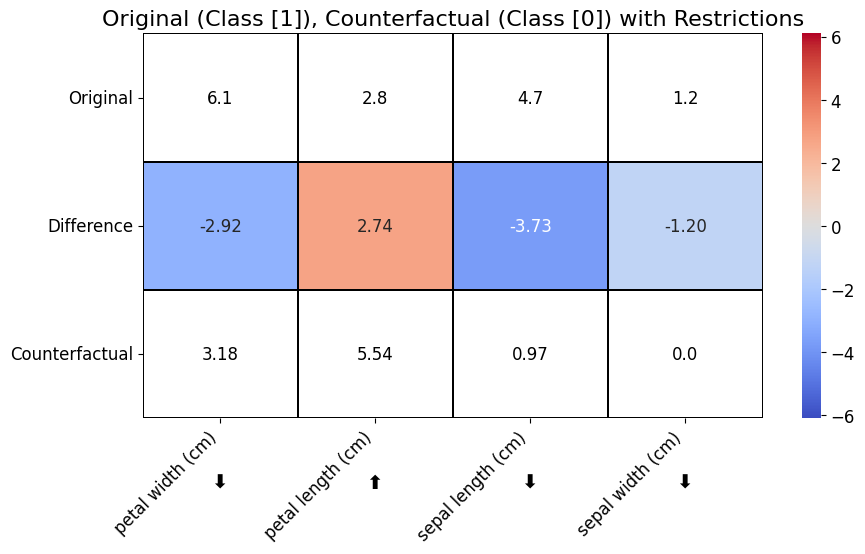

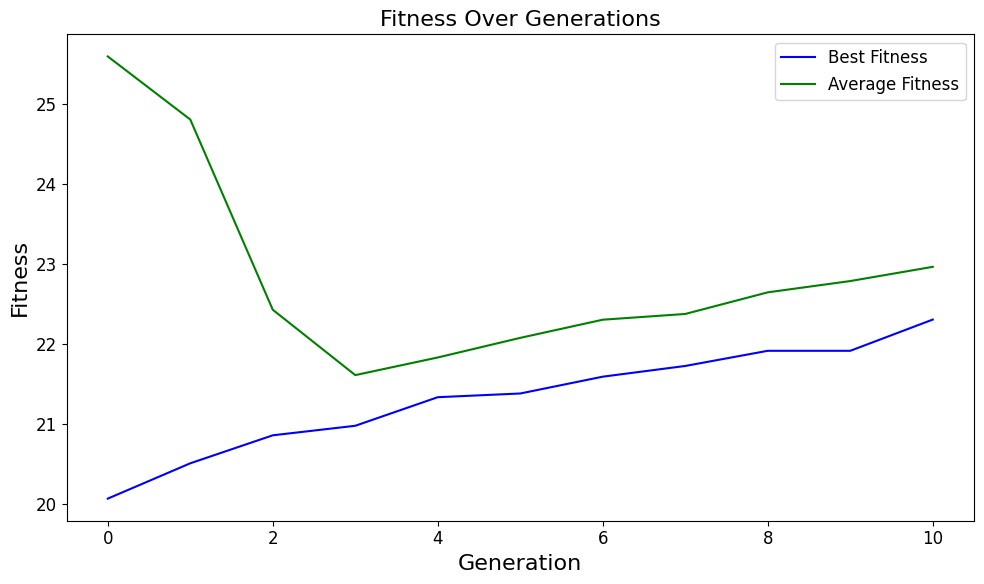

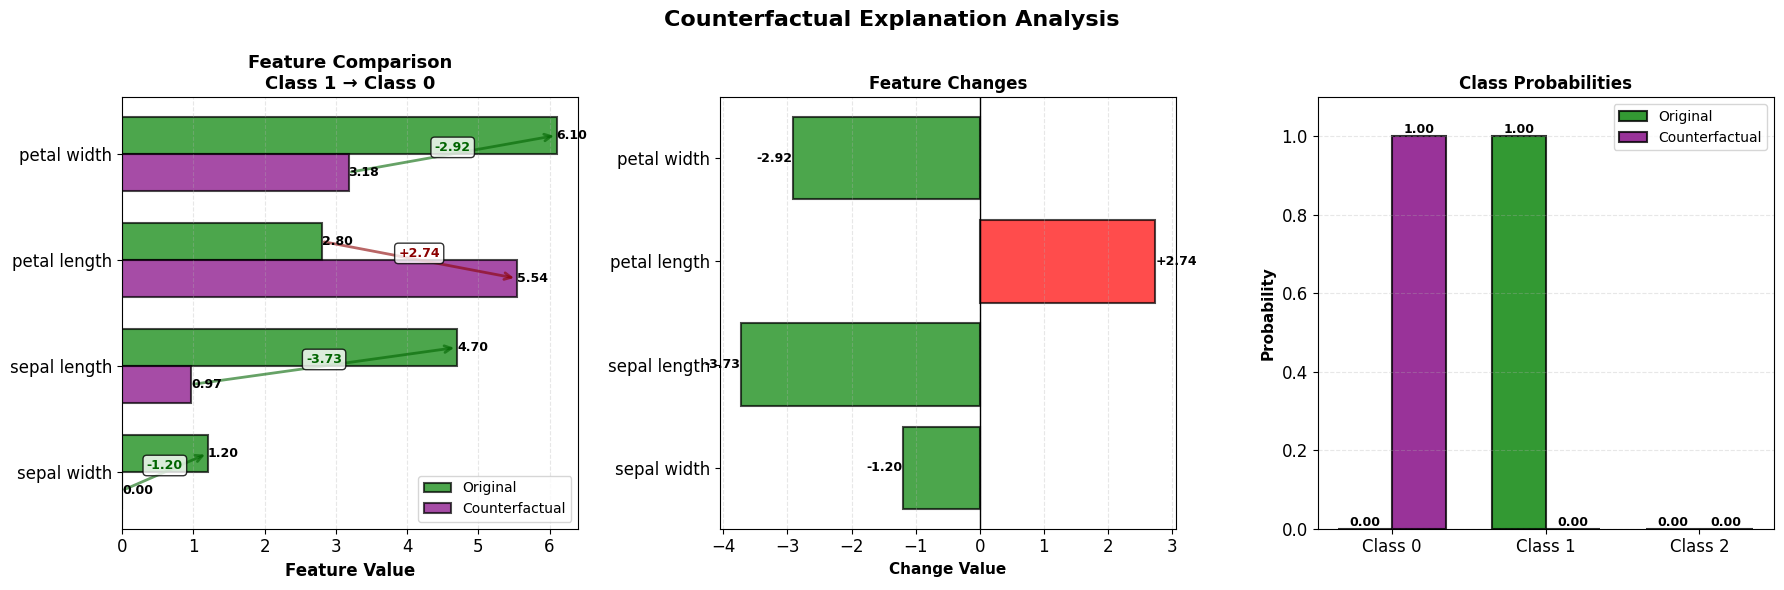

Feature 'petal width (cm)' changed from 6.1 to 3.18.
Feature 'petal length (cm)' changed from 2.8 to 5.54.
Feature 'sepal length (cm)' changed from 4.7 to 0.97.
Feature 'sepal width (cm)' changed from 1.2 to 0.
All constraints were respected.
Stopping criteria not set or not reached.
Original class: 1, Counterfactual class: 0
Original fitness: inf, Best fitness: inf
Generating counterfactual with constraints: {'petal width (cm)': 'non_increasing', 'petal length (cm)': 'non_decreasing', 'sepal length (cm)': 'non_increasing', 'sepal width (cm)': 'non_decreasing'}
Generating counterfactual with constraints: {'petal width (cm)': 'non_increasing', 'petal length (cm)': 'non_decreasing', 'sepal length (cm)': 'non_decreasing', 'sepal width (cm)': 'non_increasing'}
Generating counterfactual with constraints: {'petal width (cm)': 'non_increasing', 'petal length (cm)': 'non_decreasing', 'sepal length (cm)': 'non_decreasing', 'sepal width (cm)': 'non_increasing'}


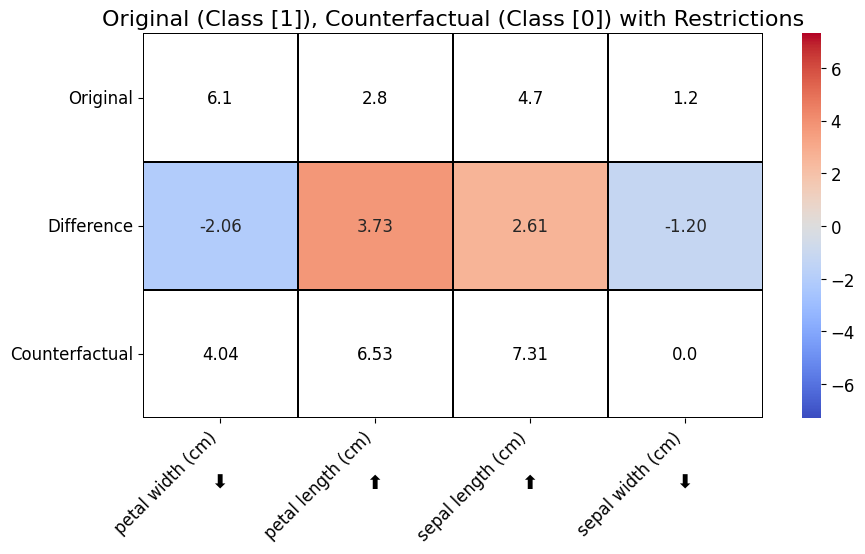

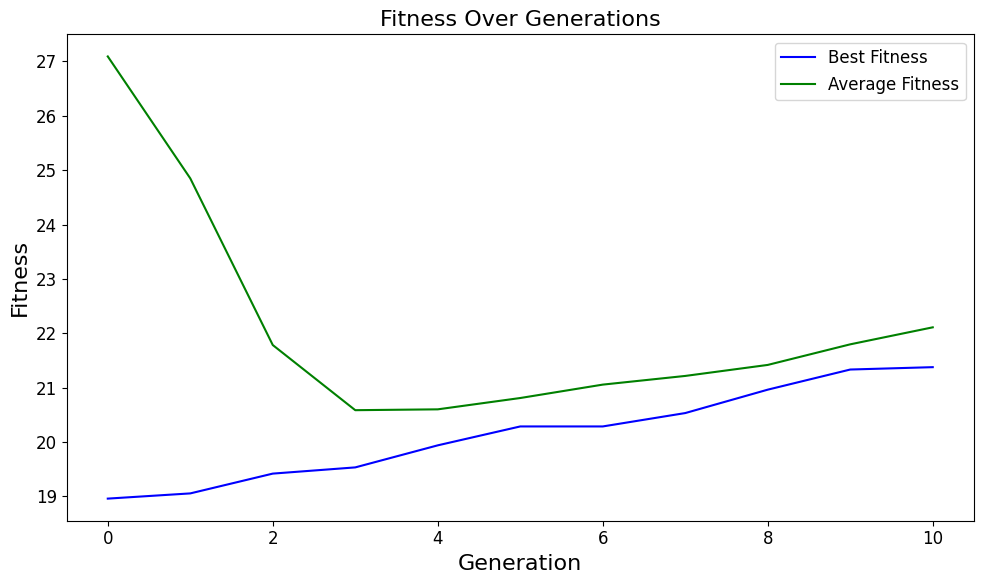

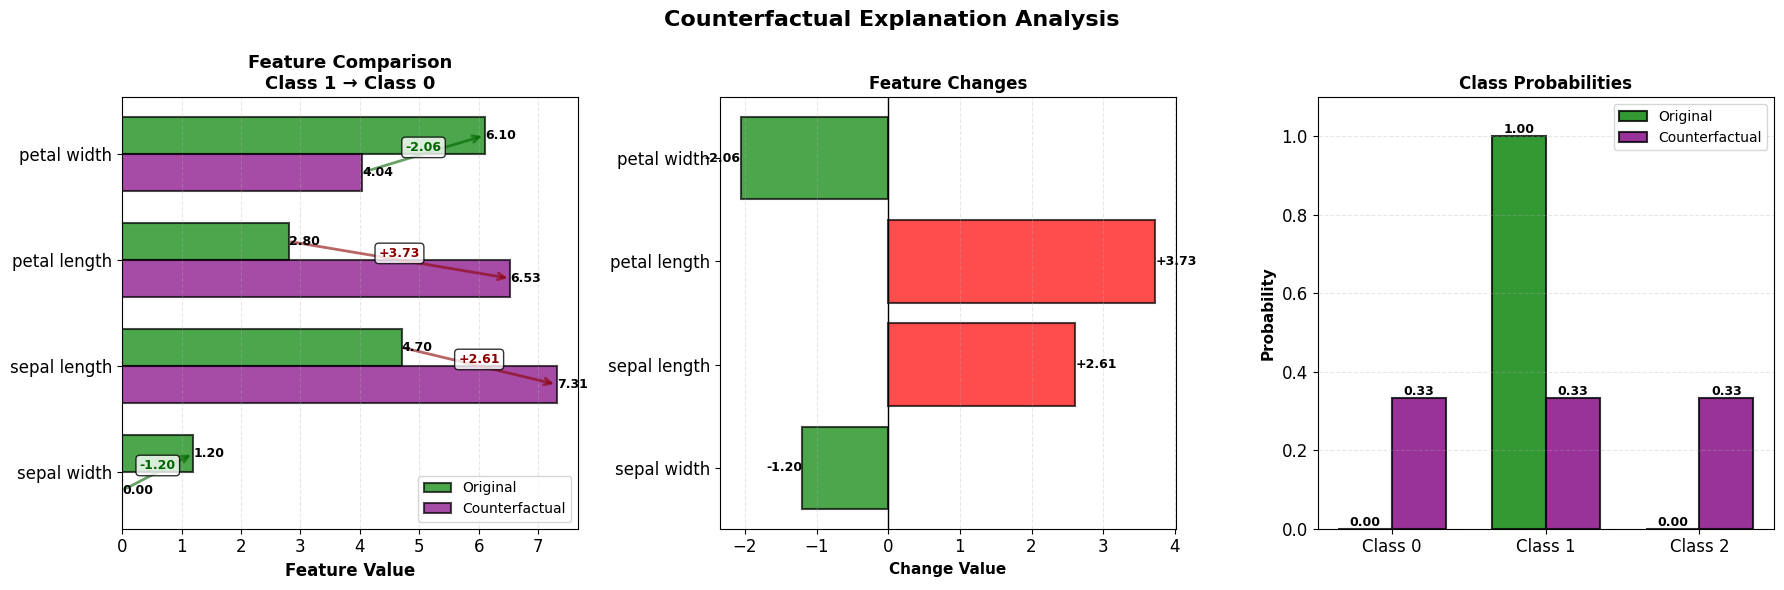

Feature 'petal width (cm)' changed from 6.1 to 4.04.
Feature 'petal length (cm)' changed from 2.8 to 6.53.
Feature 'sepal length (cm)' changed from 4.7 to 7.31.
Feature 'sepal width (cm)' changed from 1.2 to 0.
All constraints were respected.
Stopping criteria not set or not reached.
Original class: 1, Counterfactual class: 0
Original fitness: inf, Best fitness: inf
Generating counterfactual with constraints: {'petal width (cm)': 'non_increasing', 'petal length (cm)': 'non_decreasing', 'sepal length (cm)': 'non_decreasing', 'sepal width (cm)': 'non_decreasing'}
Generating counterfactual with constraints: {'petal width (cm)': 'non_decreasing', 'petal length (cm)': 'non_increasing', 'sepal length (cm)': 'non_increasing', 'sepal width (cm)': 'non_increasing'}
Generating counterfactual with constraints: {'petal width (cm)': 'non_decreasing', 'petal length (cm)': 'non_increasing', 'sepal length (cm)': 'non_increasing', 'sepal width (cm)': 'non_increasing'}


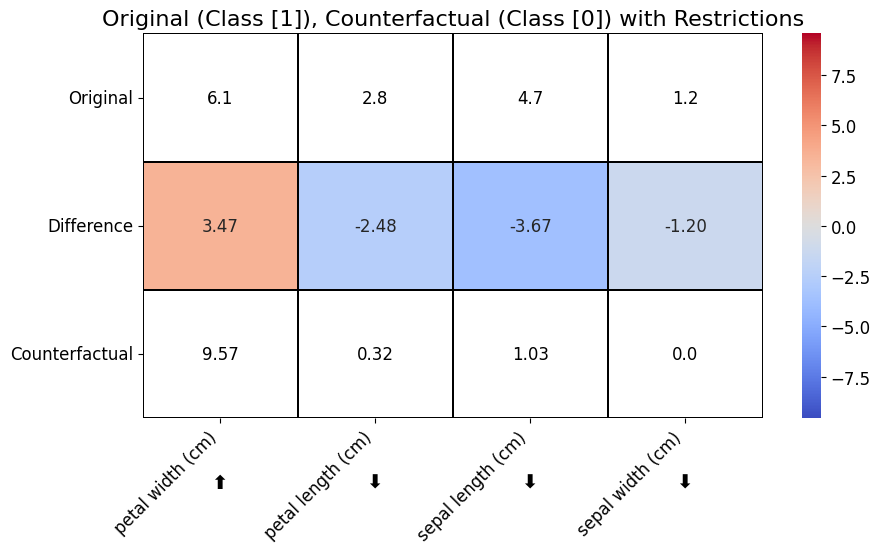

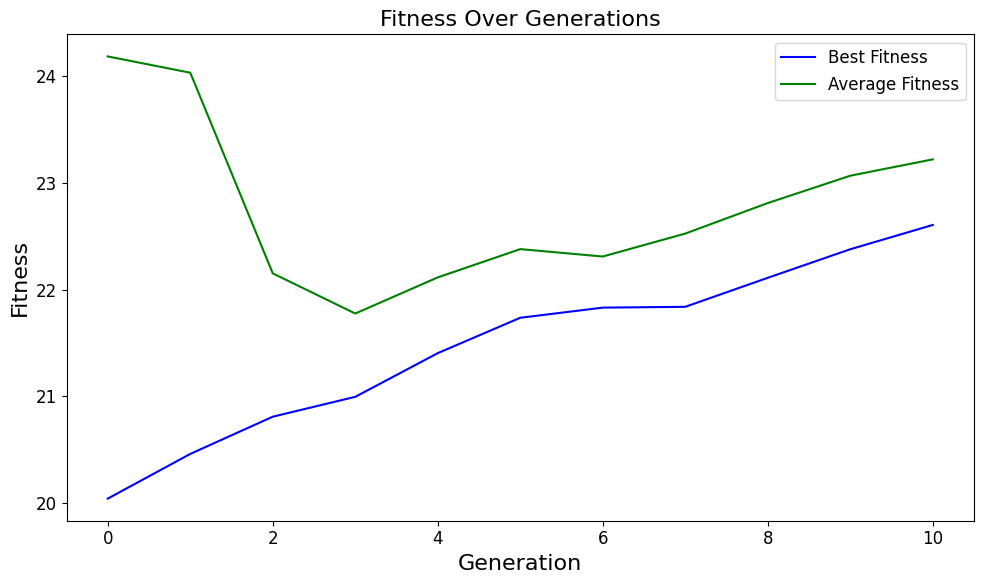

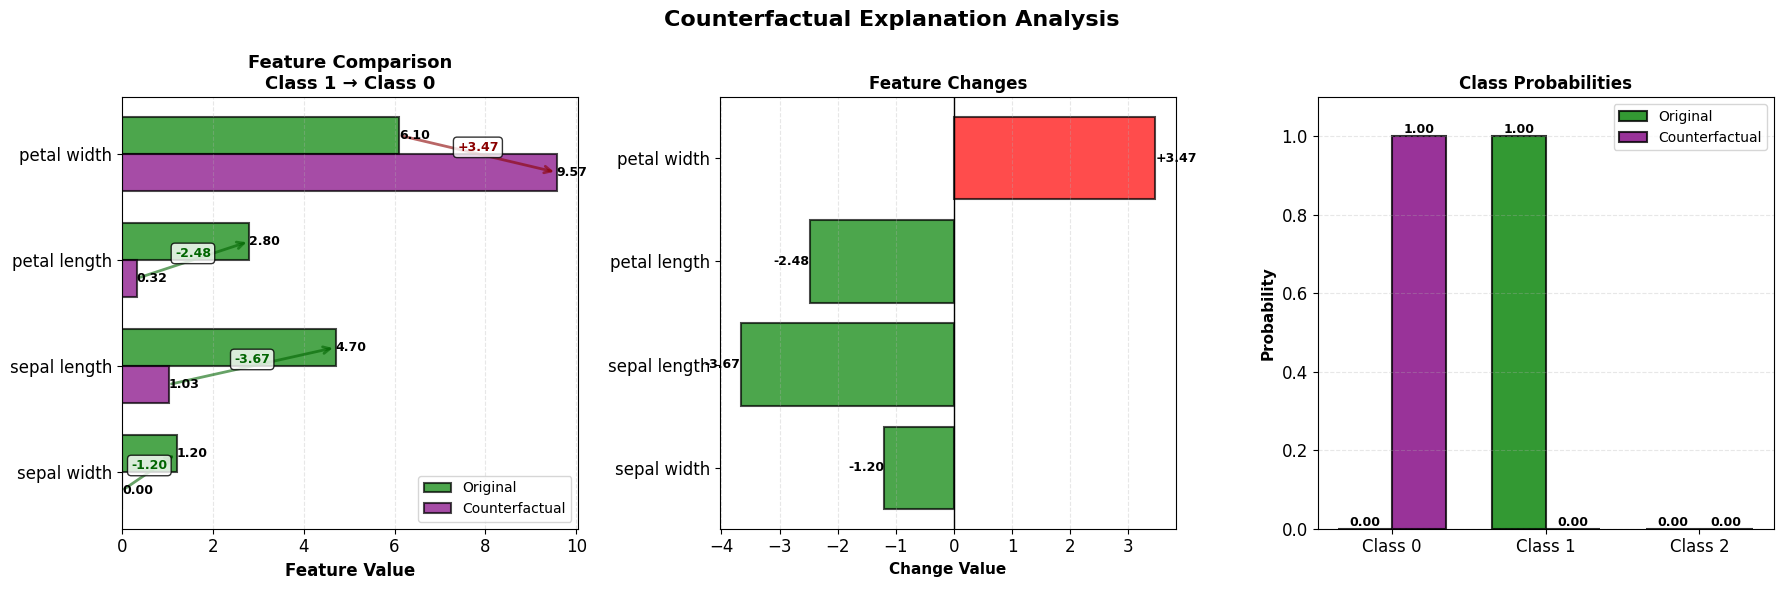

Feature 'petal width (cm)' changed from 6.1 to 9.57.
Feature 'petal length (cm)' changed from 2.8 to 0.32.
Feature 'sepal length (cm)' changed from 4.7 to 1.03.
Feature 'sepal width (cm)' changed from 1.2 to 0.
All constraints were respected.
Stopping criteria not set or not reached.
Original class: 1, Counterfactual class: 0
Original fitness: inf, Best fitness: inf
Generating counterfactual with constraints: {'petal width (cm)': 'non_decreasing', 'petal length (cm)': 'non_increasing', 'sepal length (cm)': 'non_increasing', 'sepal width (cm)': 'non_decreasing'}
Generating counterfactual with constraints: {'petal width (cm)': 'non_decreasing', 'petal length (cm)': 'non_increasing', 'sepal length (cm)': 'non_decreasing', 'sepal width (cm)': 'non_increasing'}
Generating counterfactual with constraints: {'petal width (cm)': 'non_decreasing', 'petal length (cm)': 'non_increasing', 'sepal length (cm)': 'non_decreasing', 'sepal width (cm)': 'non_increasing'}


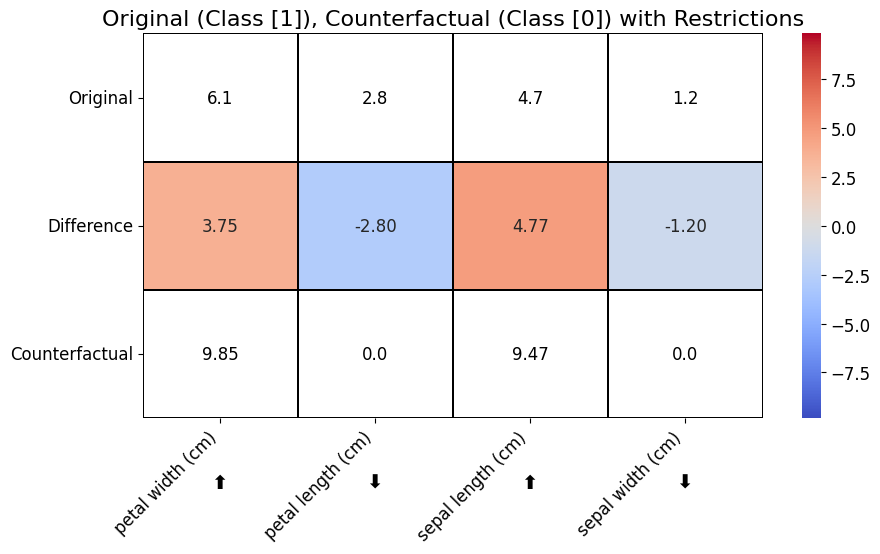

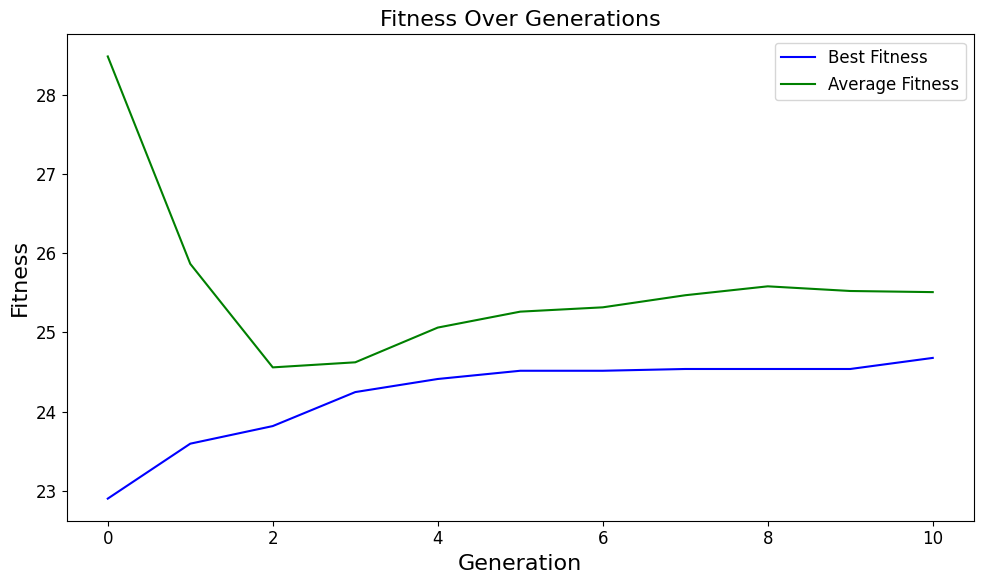

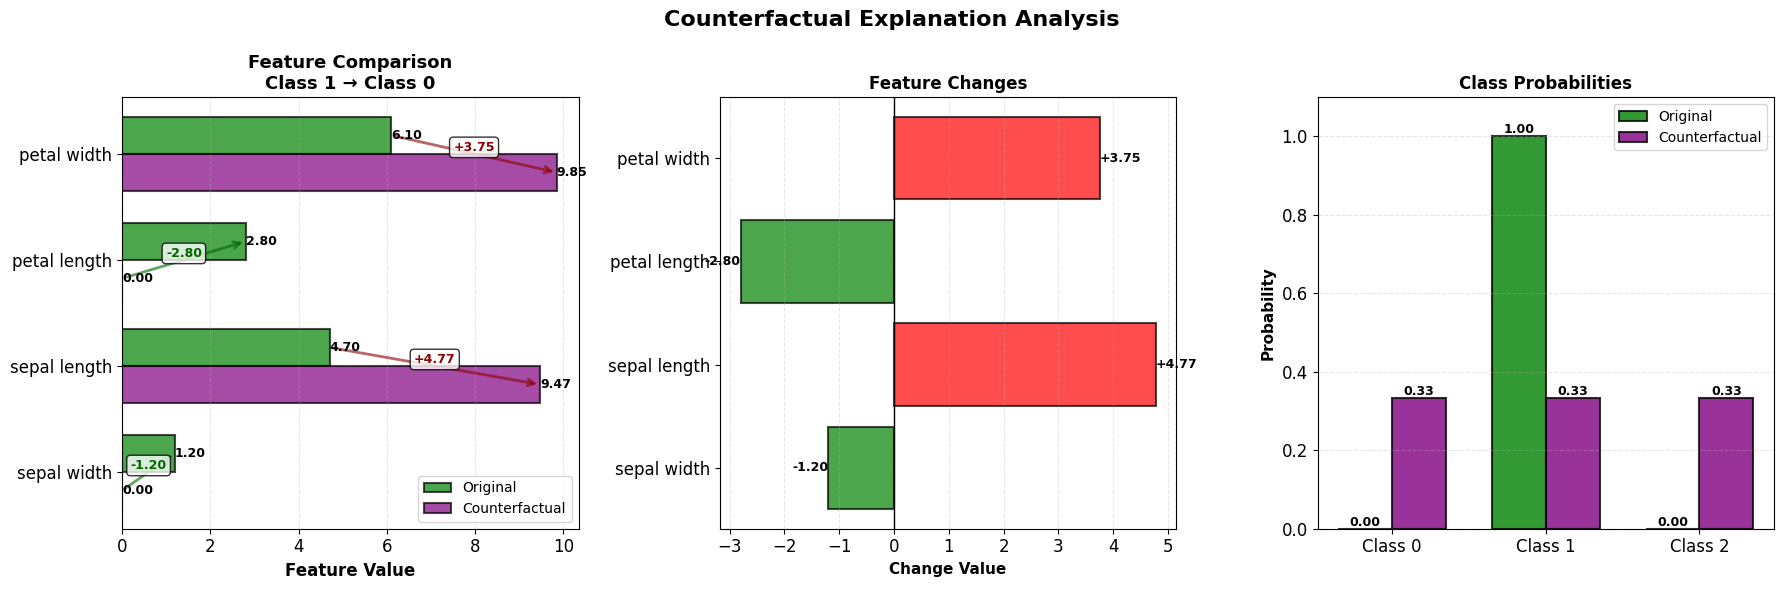

Feature 'petal width (cm)' changed from 6.1 to 9.85.
Feature 'petal length (cm)' changed from 2.8 to 0.
Feature 'sepal length (cm)' changed from 4.7 to 9.47.
Feature 'sepal width (cm)' changed from 1.2 to 0.
All constraints were respected.
Stopping criteria not set or not reached.
Original class: 1, Counterfactual class: 0
Original fitness: inf, Best fitness: inf
Generating counterfactual with constraints: {'petal width (cm)': 'non_decreasing', 'petal length (cm)': 'non_increasing', 'sepal length (cm)': 'non_decreasing', 'sepal width (cm)': 'non_decreasing'}
Generating counterfactual with constraints: {'petal width (cm)': 'non_decreasing', 'petal length (cm)': 'non_decreasing', 'sepal length (cm)': 'non_increasing', 'sepal width (cm)': 'non_increasing'}
Generating counterfactual with constraints: {'petal width (cm)': 'non_decreasing', 'petal length (cm)': 'non_decreasing', 'sepal length (cm)': 'non_increasing', 'sepal width (cm)': 'non_increasing'}


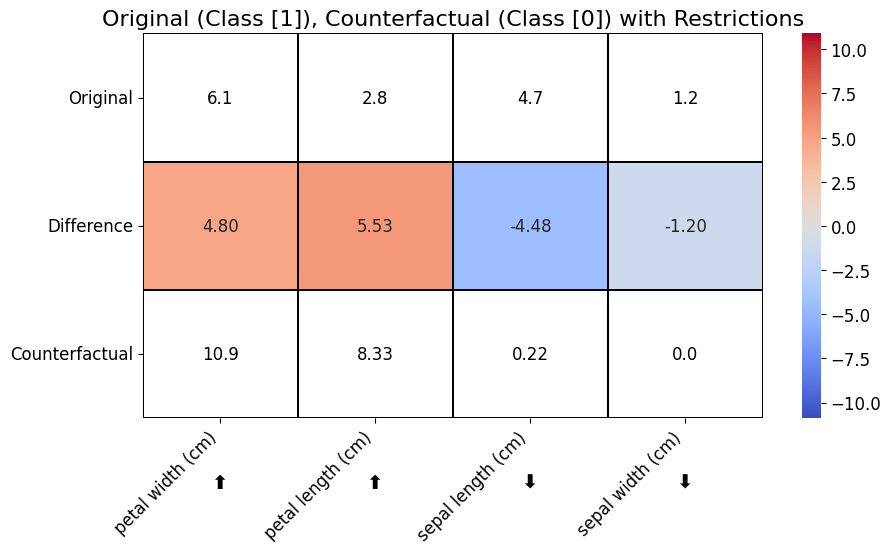

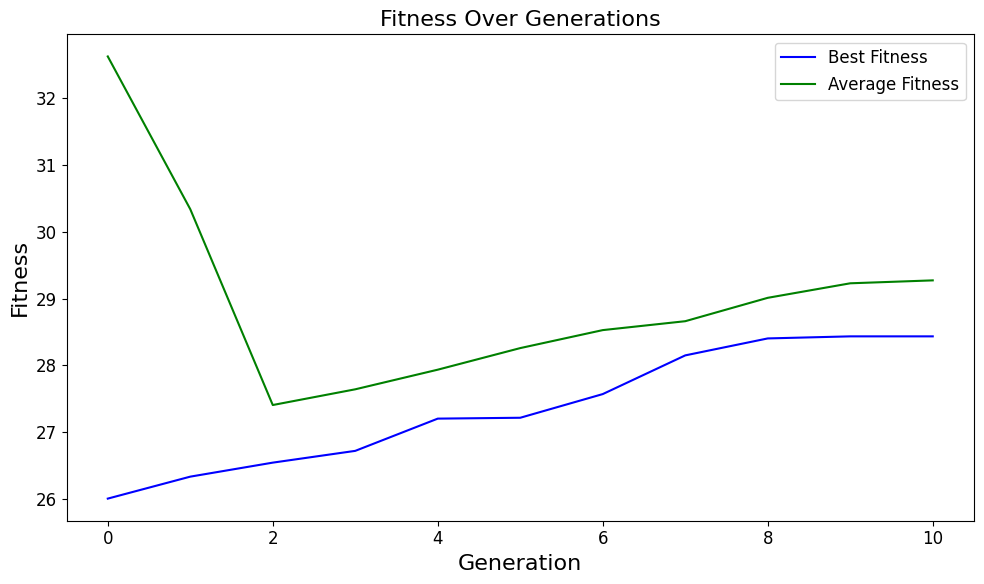

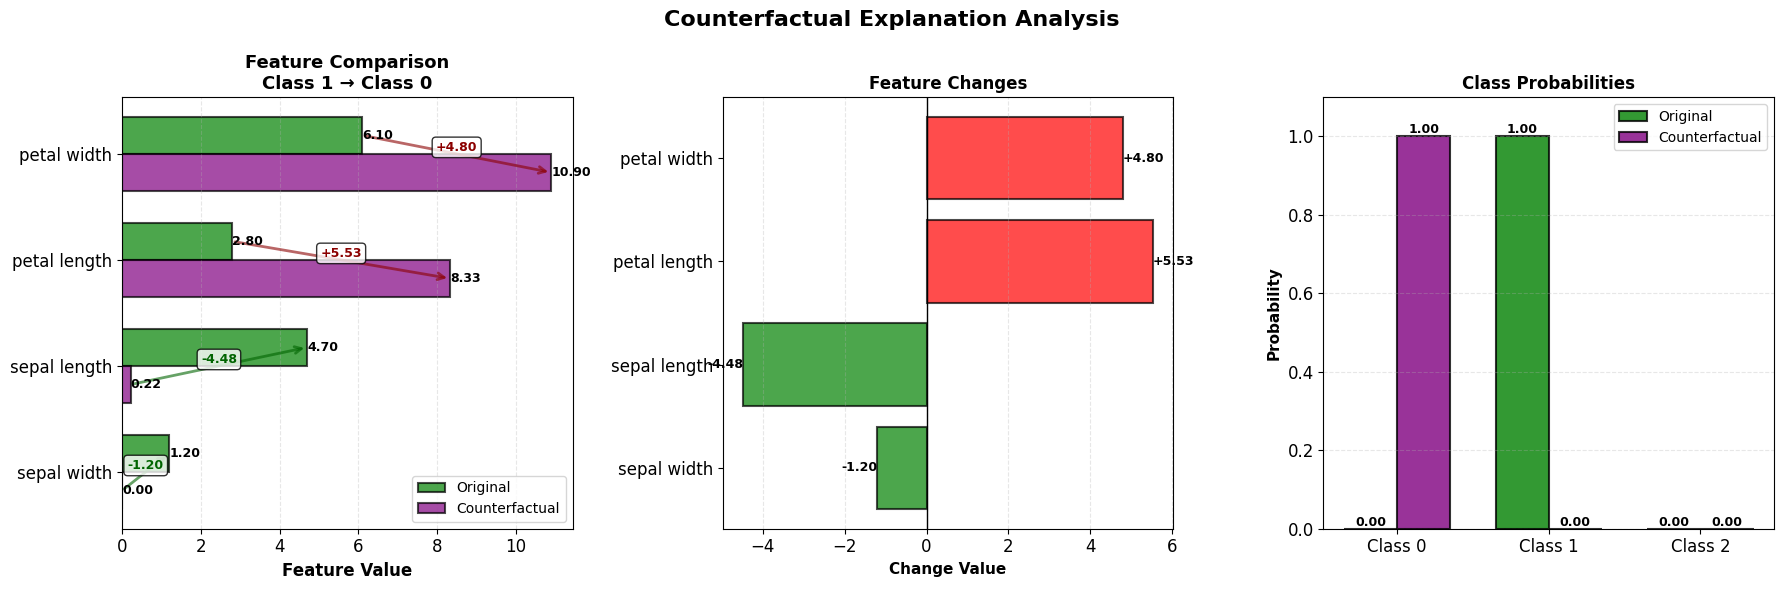

Feature 'petal width (cm)' changed from 6.1 to 10.9.
Feature 'petal length (cm)' changed from 2.8 to 8.33.
Feature 'sepal length (cm)' changed from 4.7 to 0.22.
Feature 'sepal width (cm)' changed from 1.2 to 0.
All constraints were respected.
Stopping criteria not set or not reached.
Original class: 1, Counterfactual class: 0
Original fitness: inf, Best fitness: inf
Generating counterfactual with constraints: {'petal width (cm)': 'non_decreasing', 'petal length (cm)': 'non_decreasing', 'sepal length (cm)': 'non_increasing', 'sepal width (cm)': 'non_decreasing'}
Generating counterfactual with constraints: {'petal width (cm)': 'non_decreasing', 'petal length (cm)': 'non_decreasing', 'sepal length (cm)': 'non_decreasing', 'sepal width (cm)': 'non_increasing'}
Generating counterfactual with constraints: {'petal width (cm)': 'non_decreasing', 'petal length (cm)': 'non_decreasing', 'sepal length (cm)': 'non_decreasing', 'sepal width (cm)': 'non_increasing'}


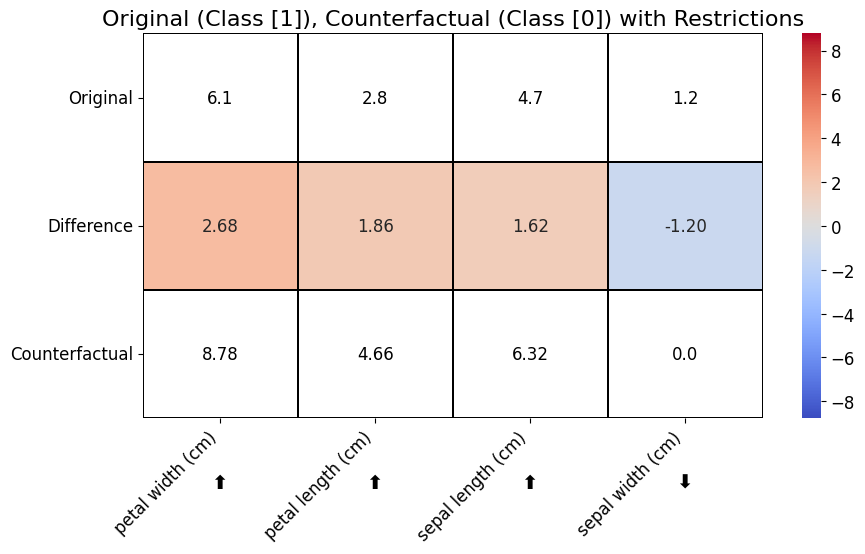

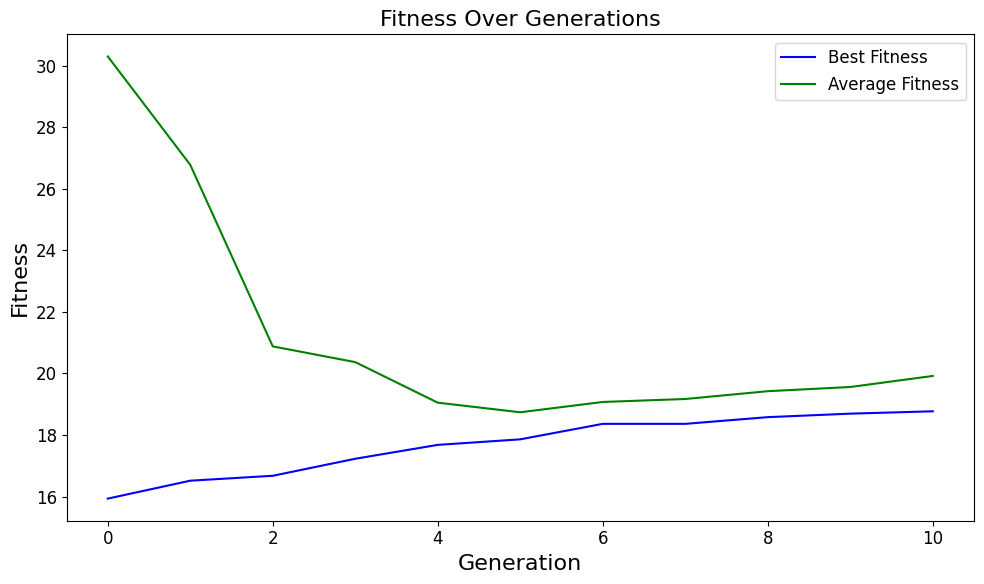

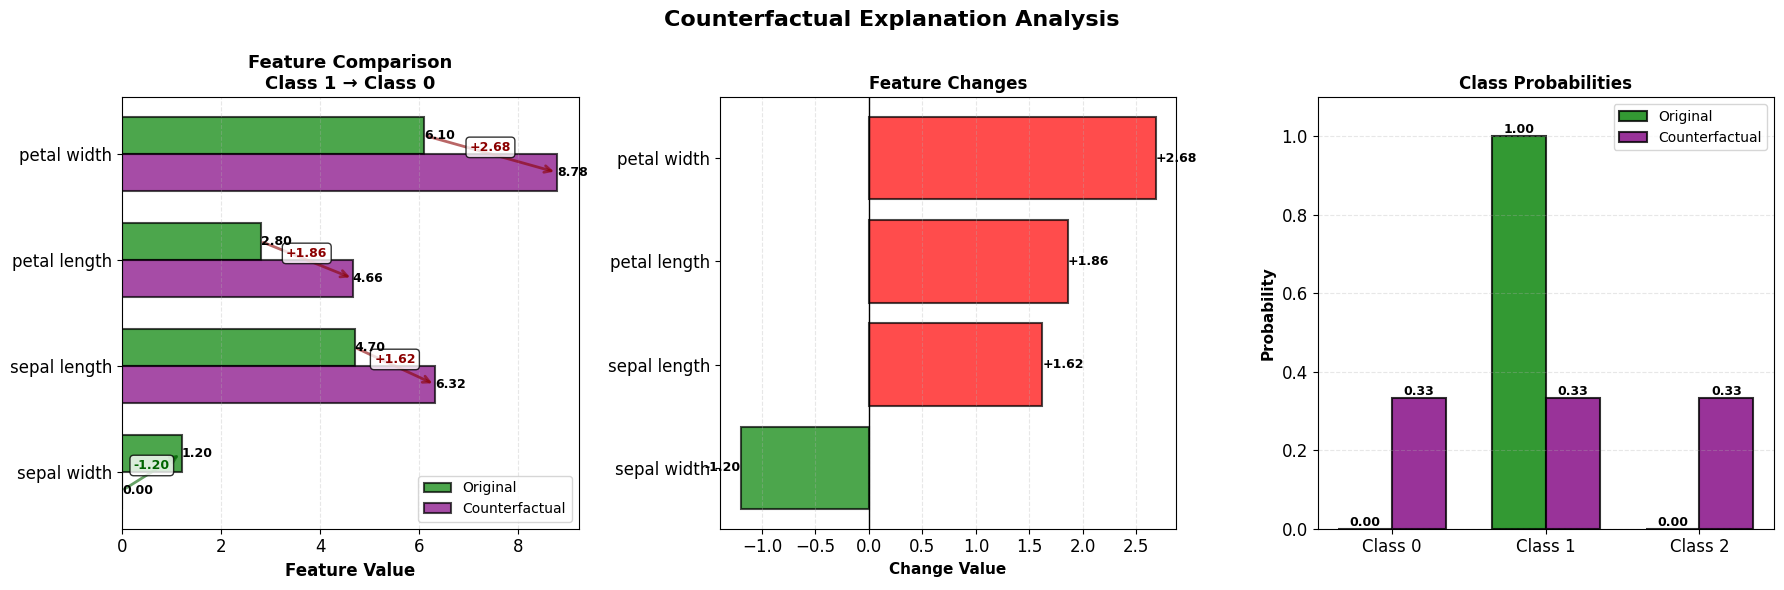

Feature 'petal width (cm)' changed from 6.1 to 8.78.
Feature 'petal length (cm)' changed from 2.8 to 4.66.
Feature 'sepal length (cm)' changed from 4.7 to 6.32.
Feature 'sepal width (cm)' changed from 1.2 to 0.
All constraints were respected.
Stopping criteria not set or not reached.
Original class: 1, Counterfactual class: 0
Original fitness: inf, Best fitness: inf
Generating counterfactual with constraints: {'petal width (cm)': 'non_decreasing', 'petal length (cm)': 'non_decreasing', 'sepal length (cm)': 'non_decreasing', 'sepal width (cm)': 'non_decreasing'}
   petal width (cm)  petal length (cm)  sepal length (cm)  sepal width (cm)  \
0              3.81               1.29               1.77                 0   
1              4.74               1.34               7.03                 0   
2              3.18               5.54               0.97                 0   
3              4.04               6.53               7.31                 0   
4              9.57               0.3

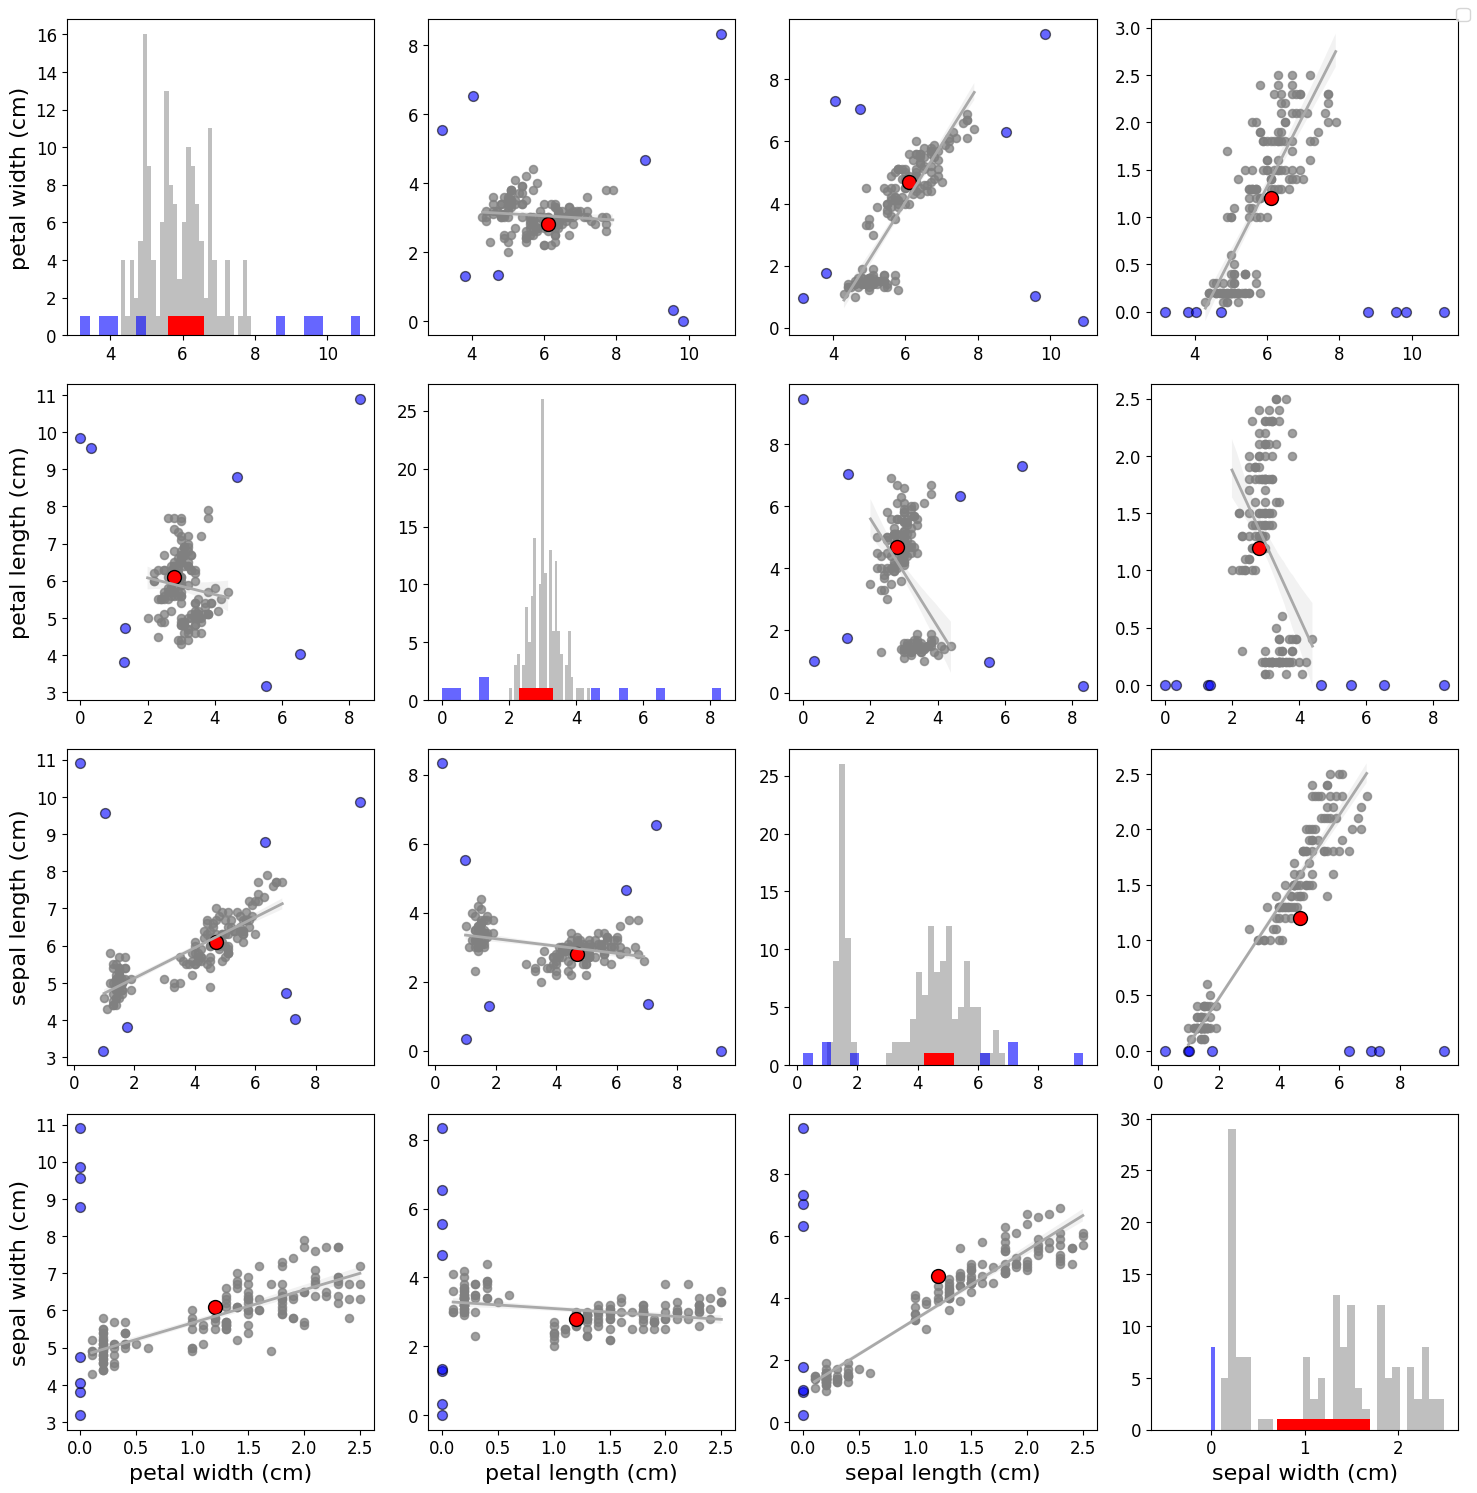

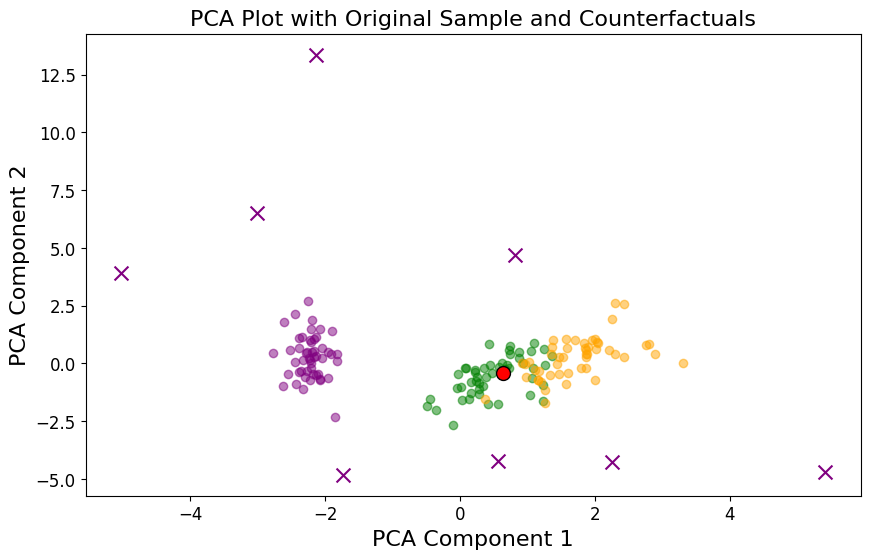

In [5]:
rules = ['no_change', 'non_increasing', 'non_decreasing']
rules = [ 'non_increasing', 'non_decreasing']


# counterfactual_class = model.predict(pd.DataFrame([counterfactual]))

# Generate all possible combinations of rules for each feature
feature_names = list(ORIGINAL_SAMPLE.keys())
rule_combinations = list(itertools.product(rules, repeat=len(feature_names)))

counterfactuals_df_combinations = []

# Iterate through each combination of rules
for combination in rule_combinations:
    dict_non_actionable = dict(zip(feature_names, combination))
    print(f"Generating counterfactual with constraints: {dict_non_actionable}")
    # Create an instance of the CounterFactualModel class
    cf_dpg = CounterFactualModel(MODEL, CONSTRAINTS)
    cf_dpg.dict_non_actionable = dict_non_actionable

    # Generate counterfactual
    counterfactual = cf_dpg.generate_counterfactual(ORIGINAL_SAMPLE, TARGET_CLASS, 20, 100)
    if (counterfactual == None):
        continue

    plot_sample_and_counterfactual_heatmap(ORIGINAL_SAMPLE, ORIGINAL_SAMPLE_PREDICTED_CLASS, counterfactual,  MODEL.predict(pd.DataFrame([counterfactual])),  dict_non_actionable)
    cf_dpg.plot_fitness()
    plot_sample_and_counterfactual_comparison(MODEL, ORIGINAL_SAMPLE, SAMPLE_DATAFRAME, counterfactual, CLASS_COLORS_LIST)


    explainer = CounterFactualExplainer(cf_dpg, ORIGINAL_SAMPLE, counterfactual, TARGET_CLASS)
    print(explainer.explain_feature_modifications())
    print(explainer.check_constraints_respect())
    print(explainer.explain_stopping_criteria())
    print(explainer.summarize_final_results())


    # Prepare data for DataFrame
    cf_data = counterfactual.copy()
    cf_data.update({'Rule_' + k: v for k, v in dict_non_actionable.items()})

    # Append to DataFrame
    counterfactuals_df_combinations.append(cf_data)

counterfactuals_df_combinations = pd.DataFrame(counterfactuals_df_combinations)
# Displaying the DataFrame
print(counterfactuals_df_combinations)

plot_pairwise_with_counterfactual_df(MODEL, IRIS_FEATURES, IRIS_LABELS, ORIGINAL_SAMPLE, counterfactuals_df_combinations)
plot_pca_with_counterfactuals(MODEL, pd.DataFrame(IRIS_FEATURES), IRIS_LABELS, ORIGINAL_SAMPLE, counterfactuals_df_combinations)


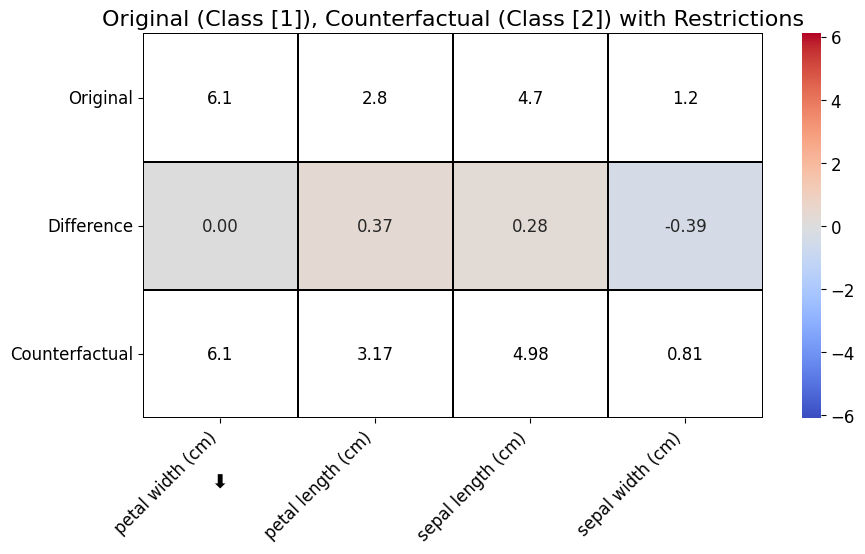

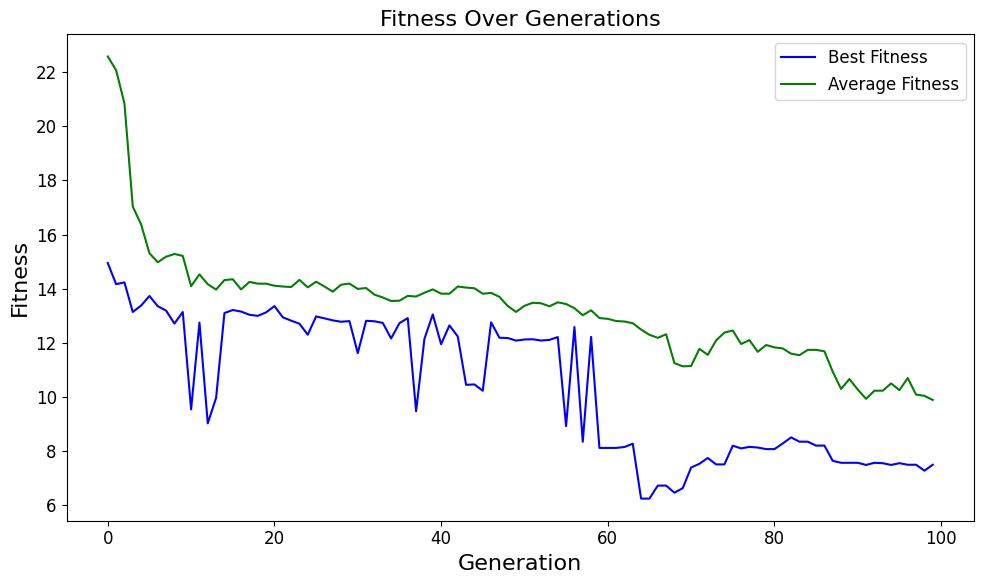

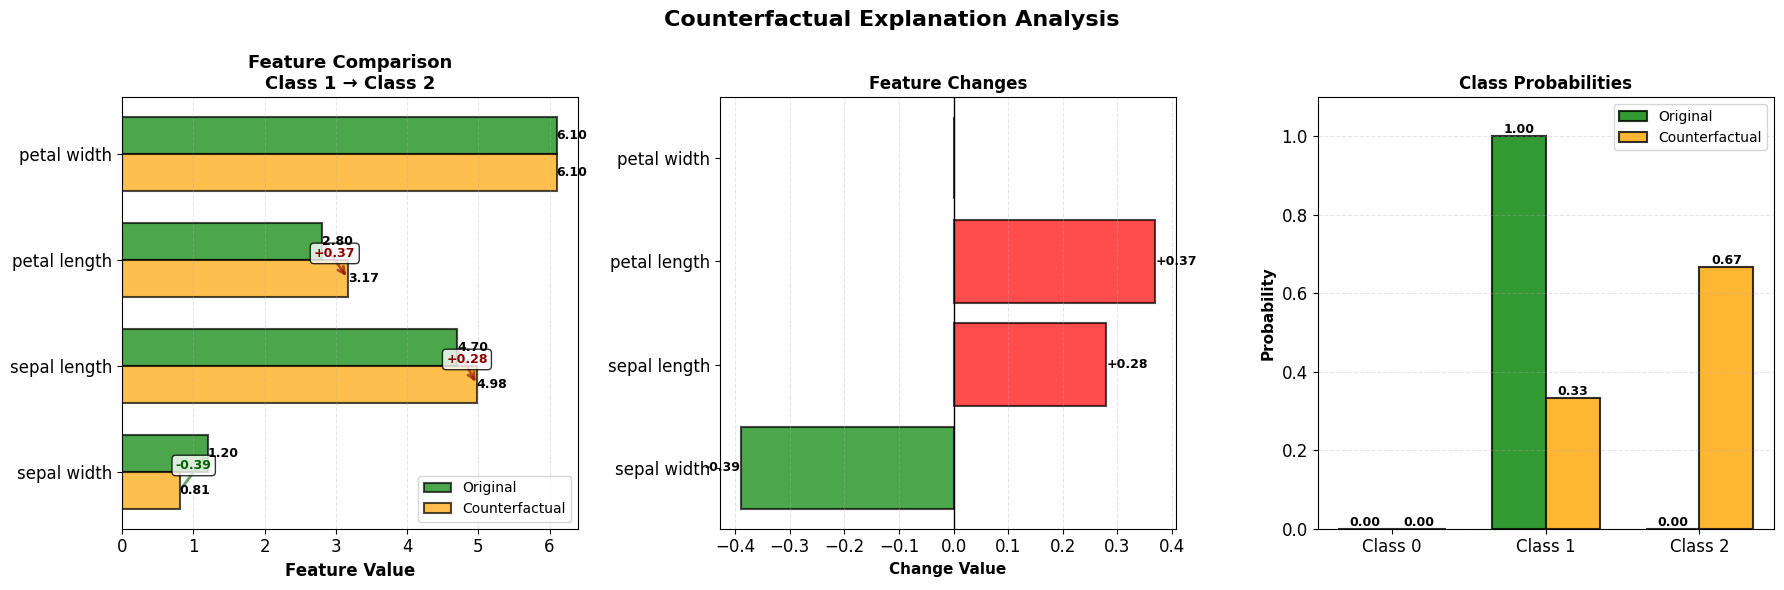

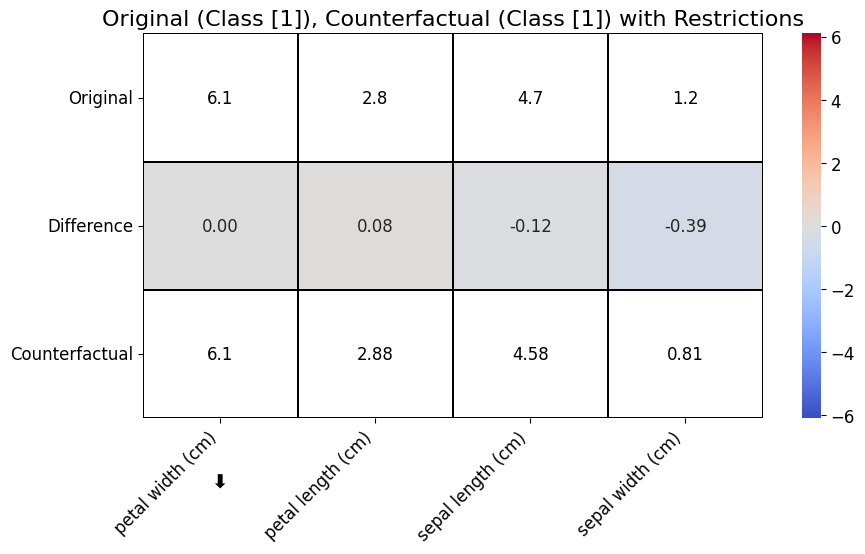

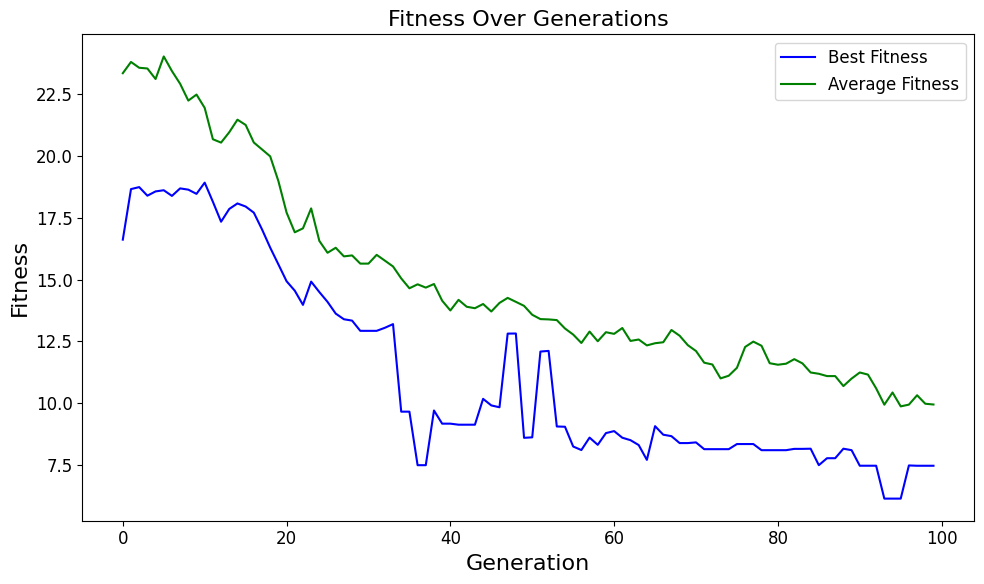

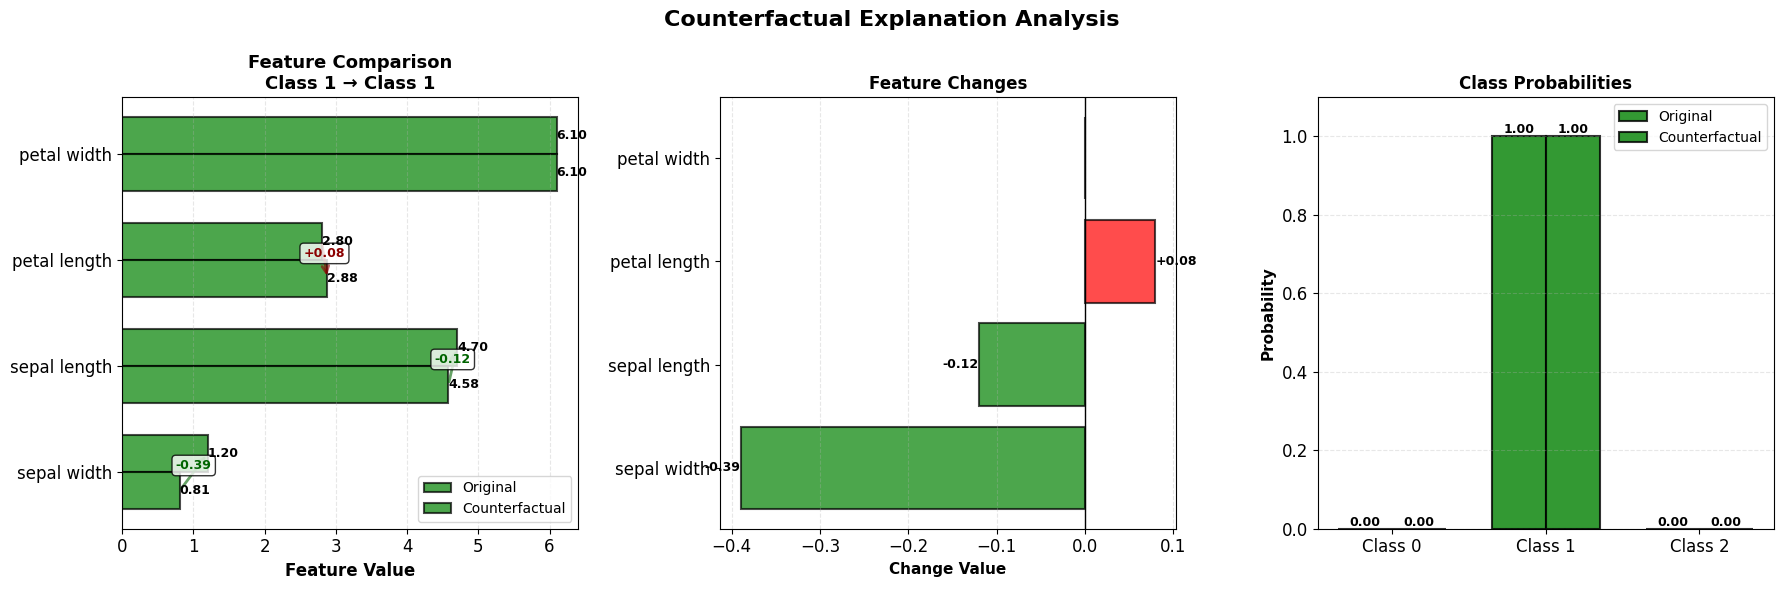

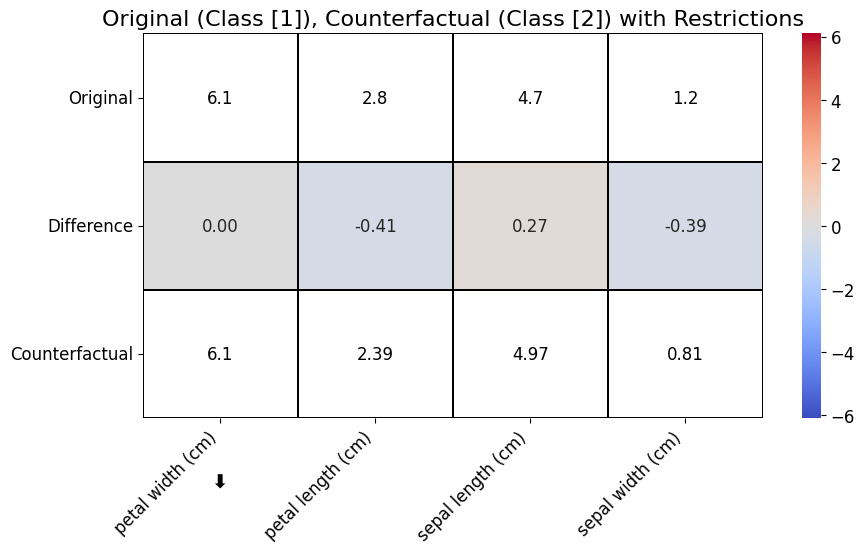

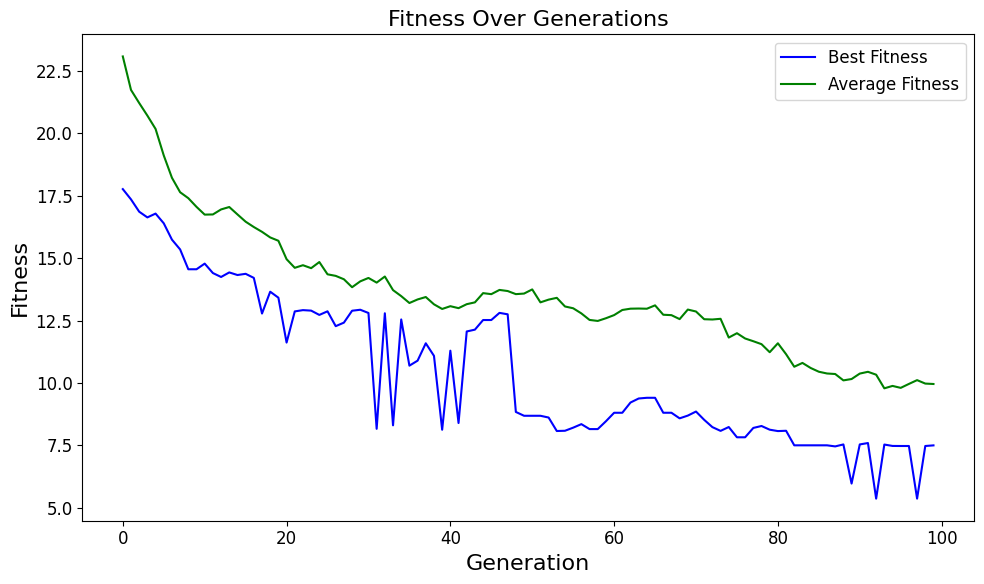

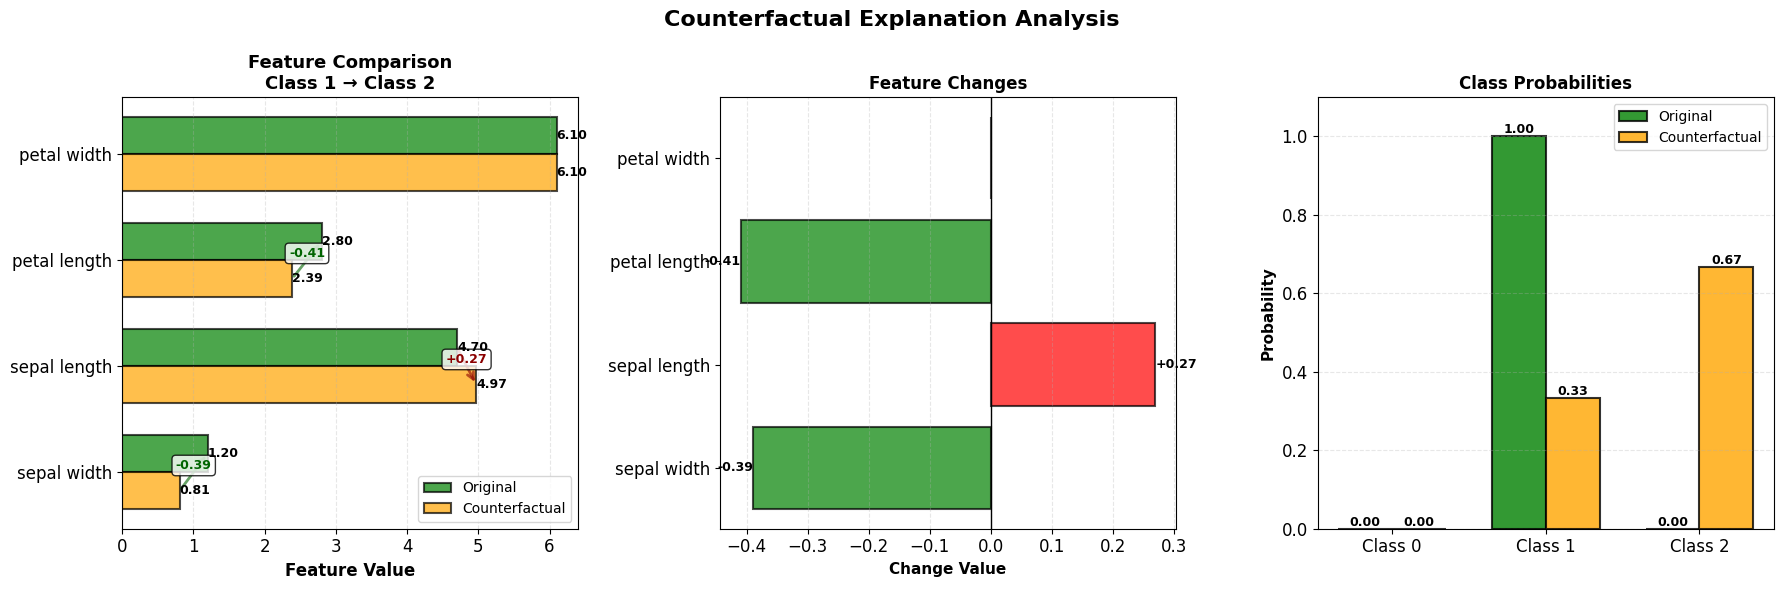

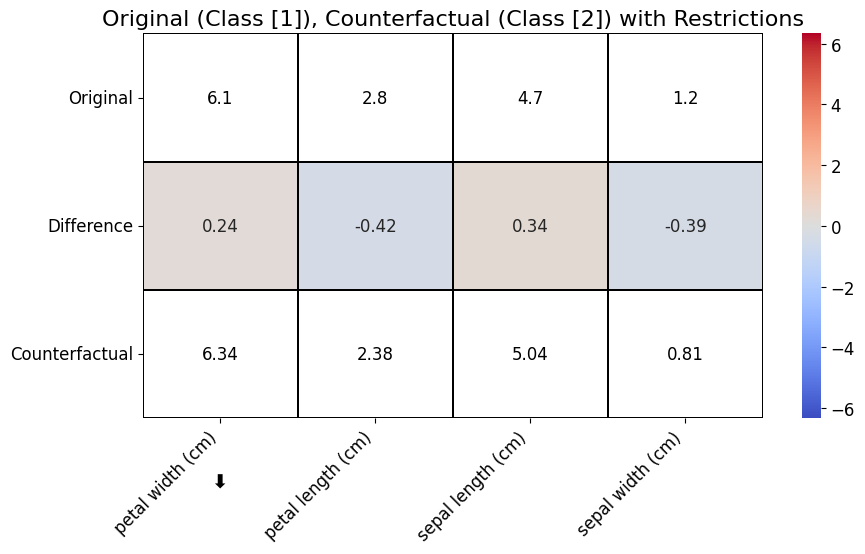

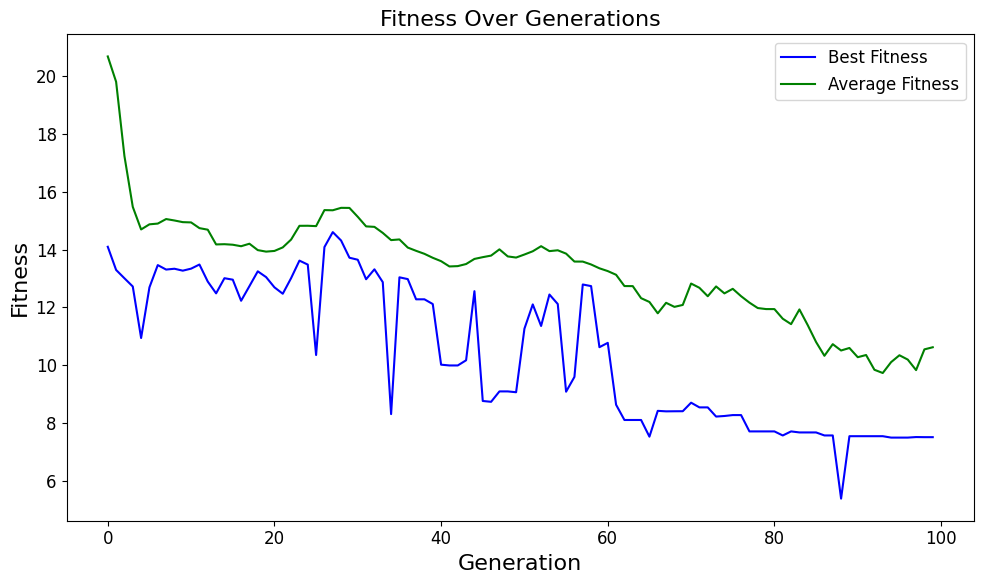

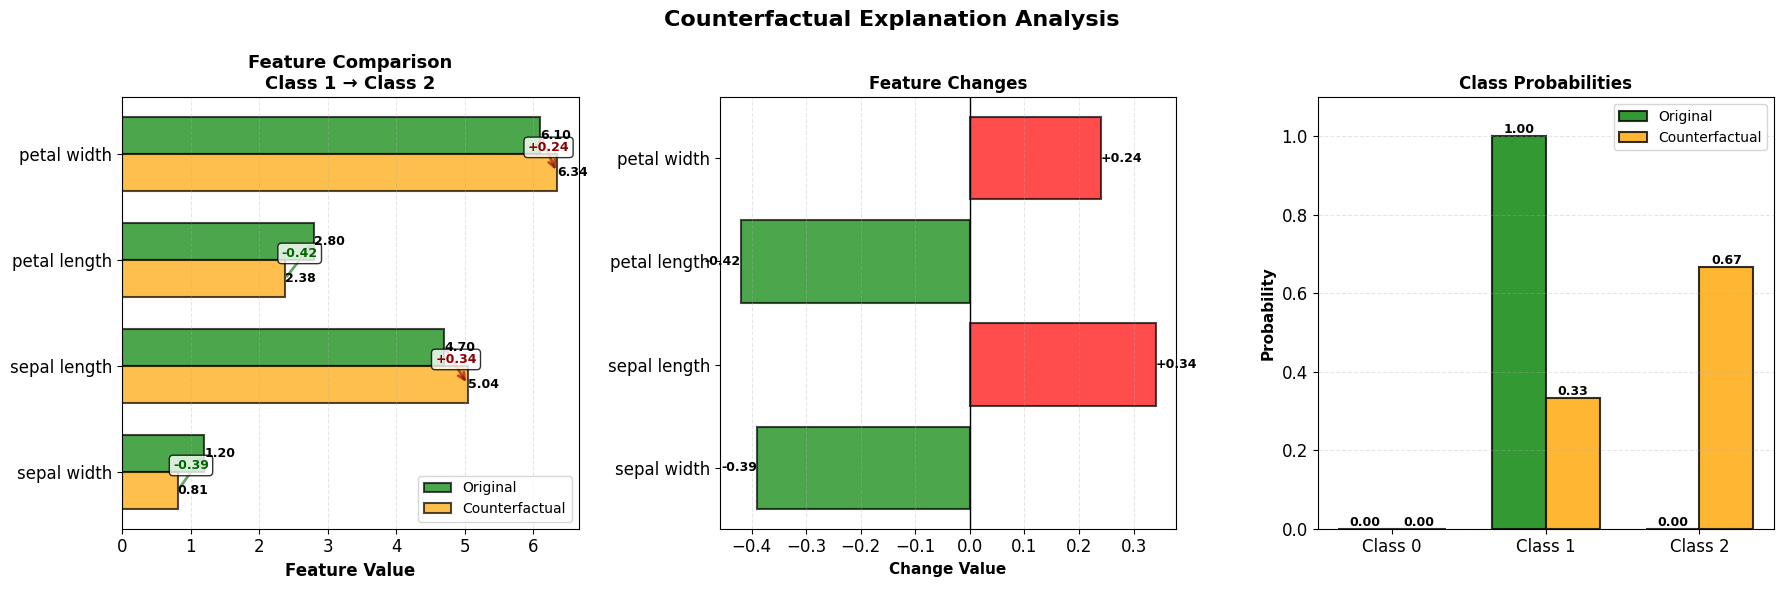

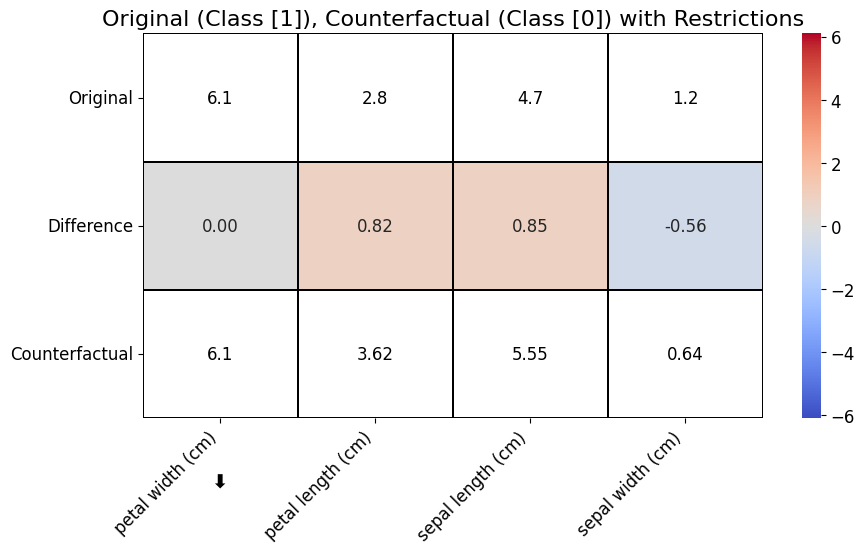

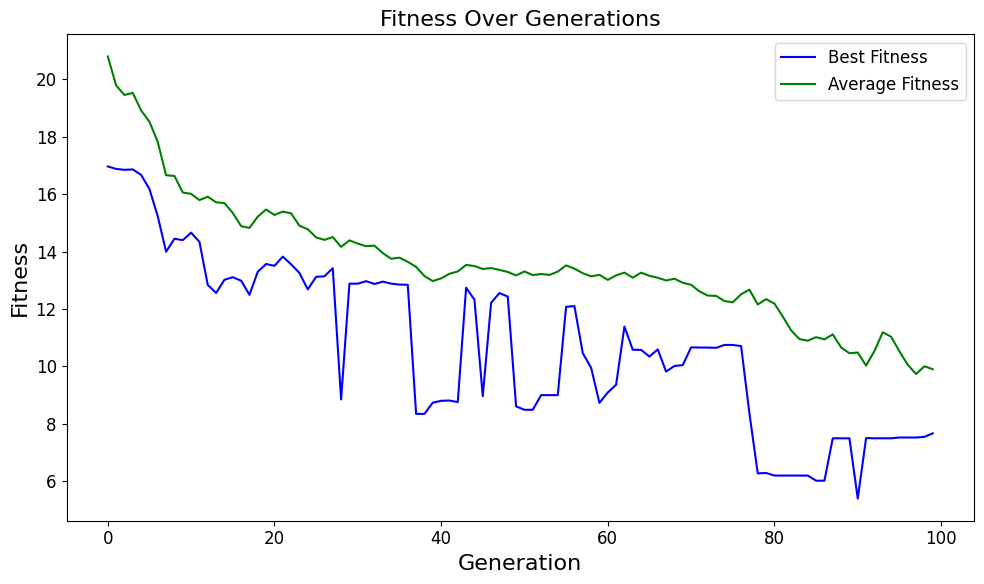

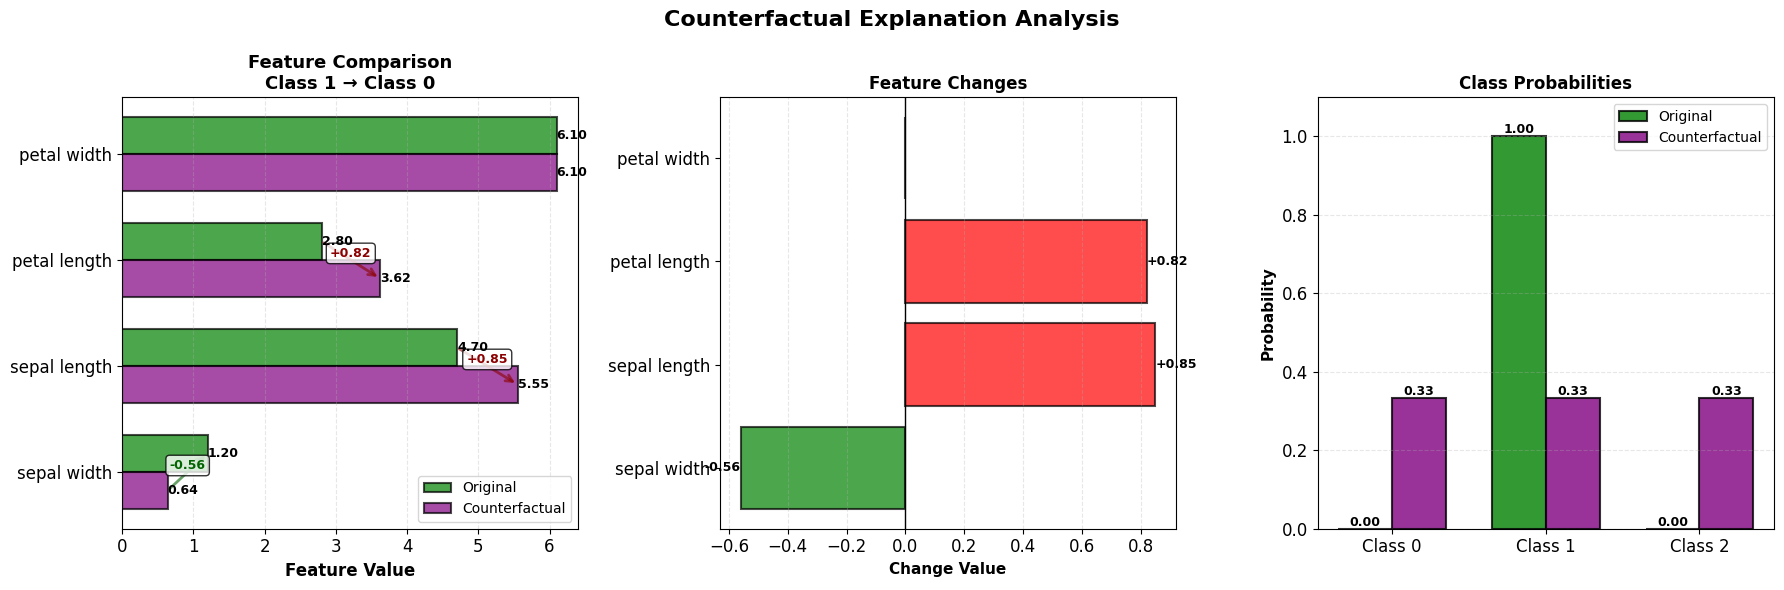

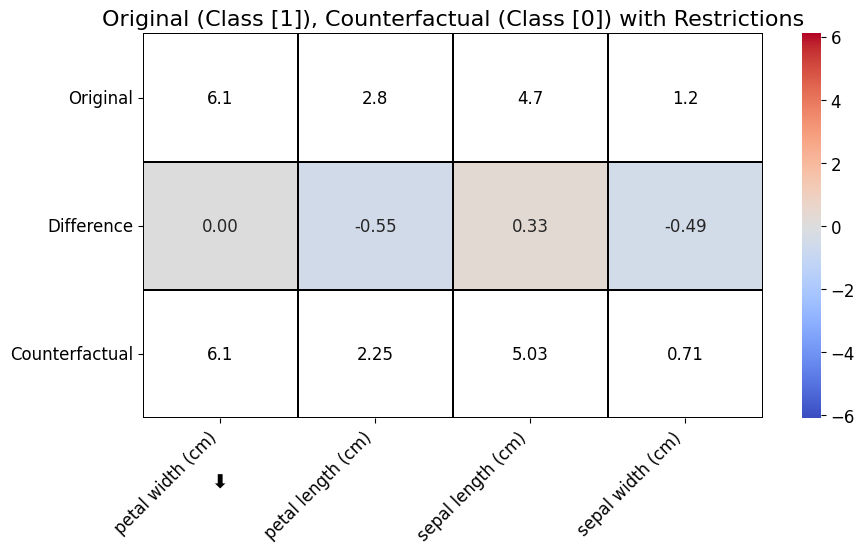

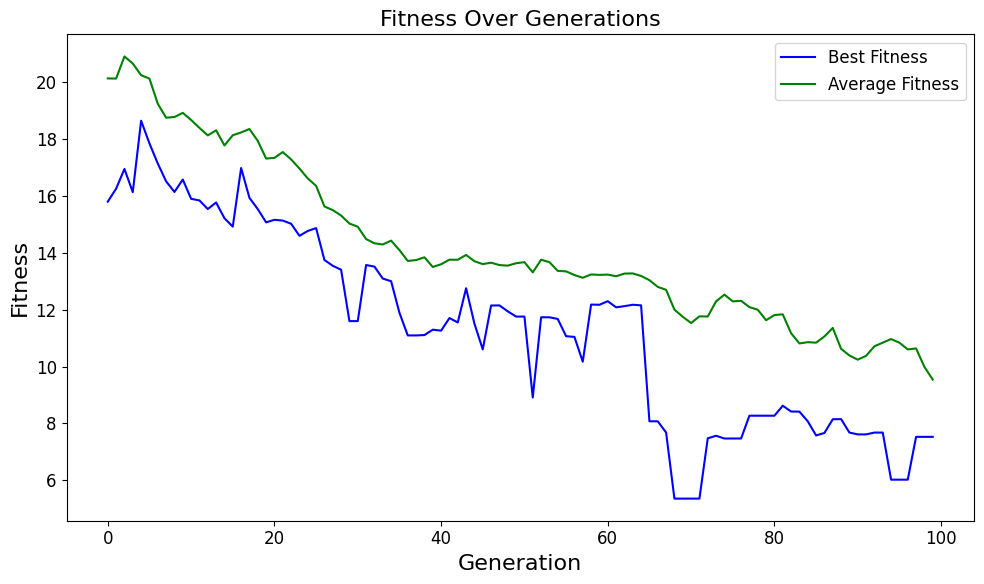

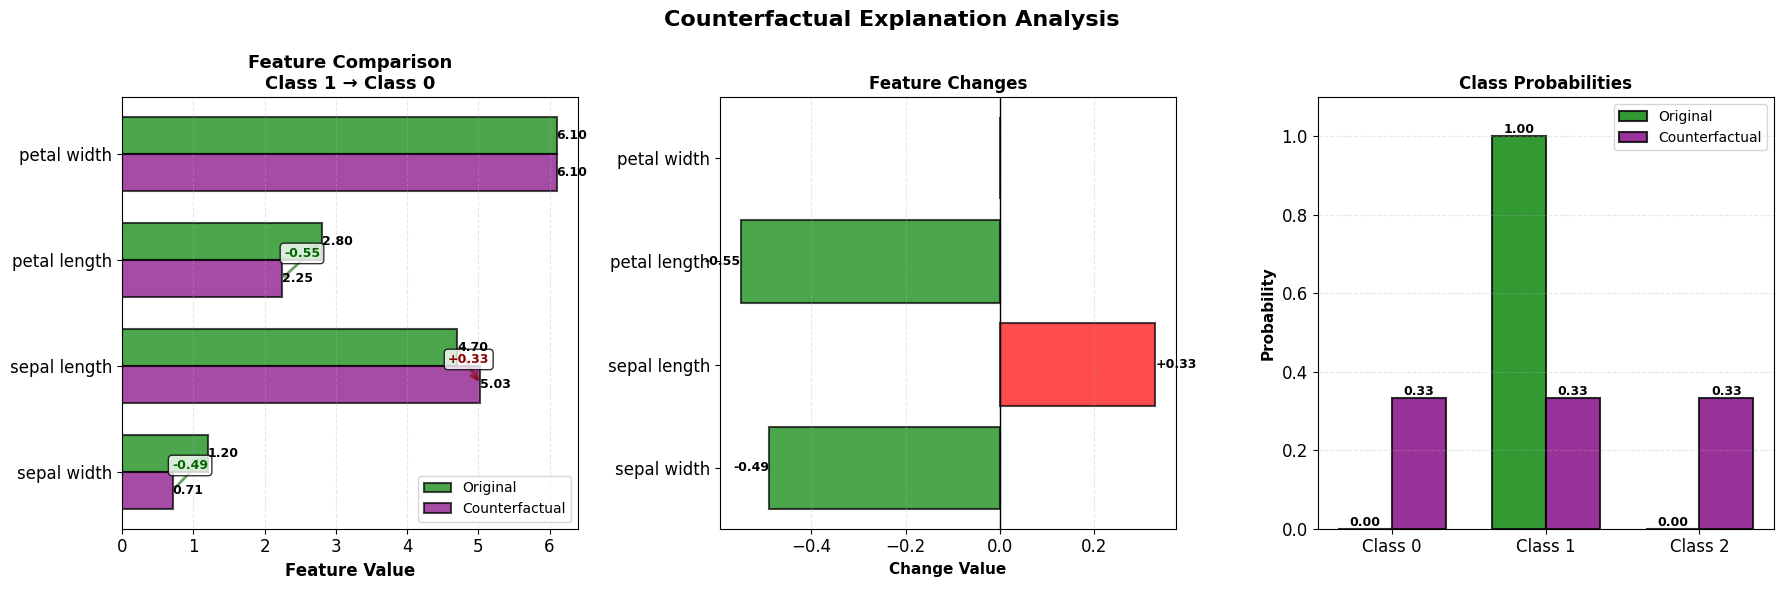

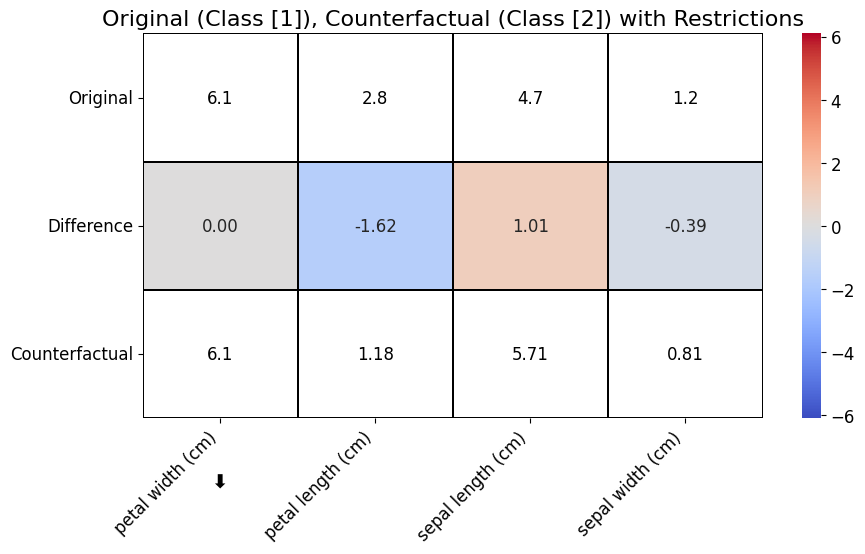

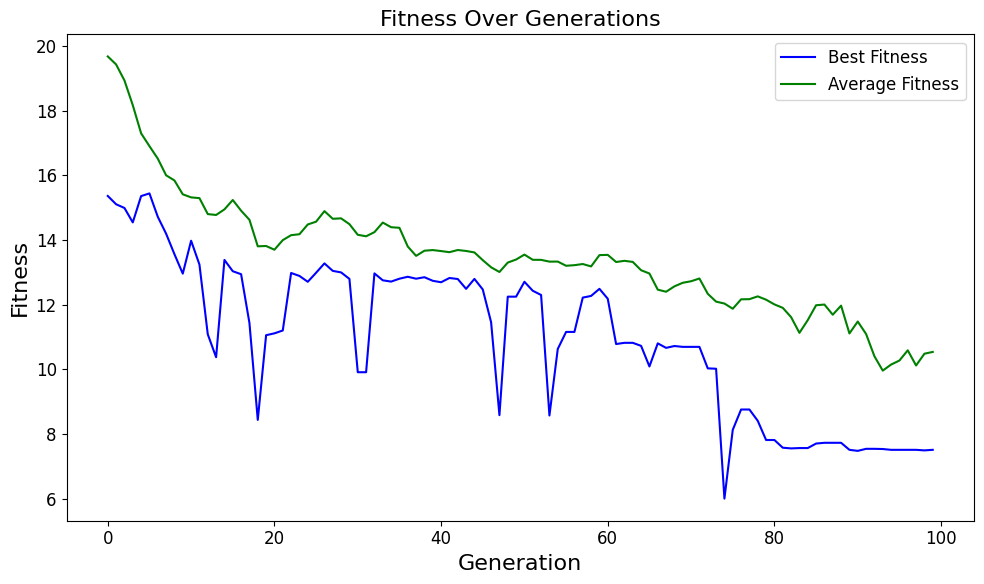

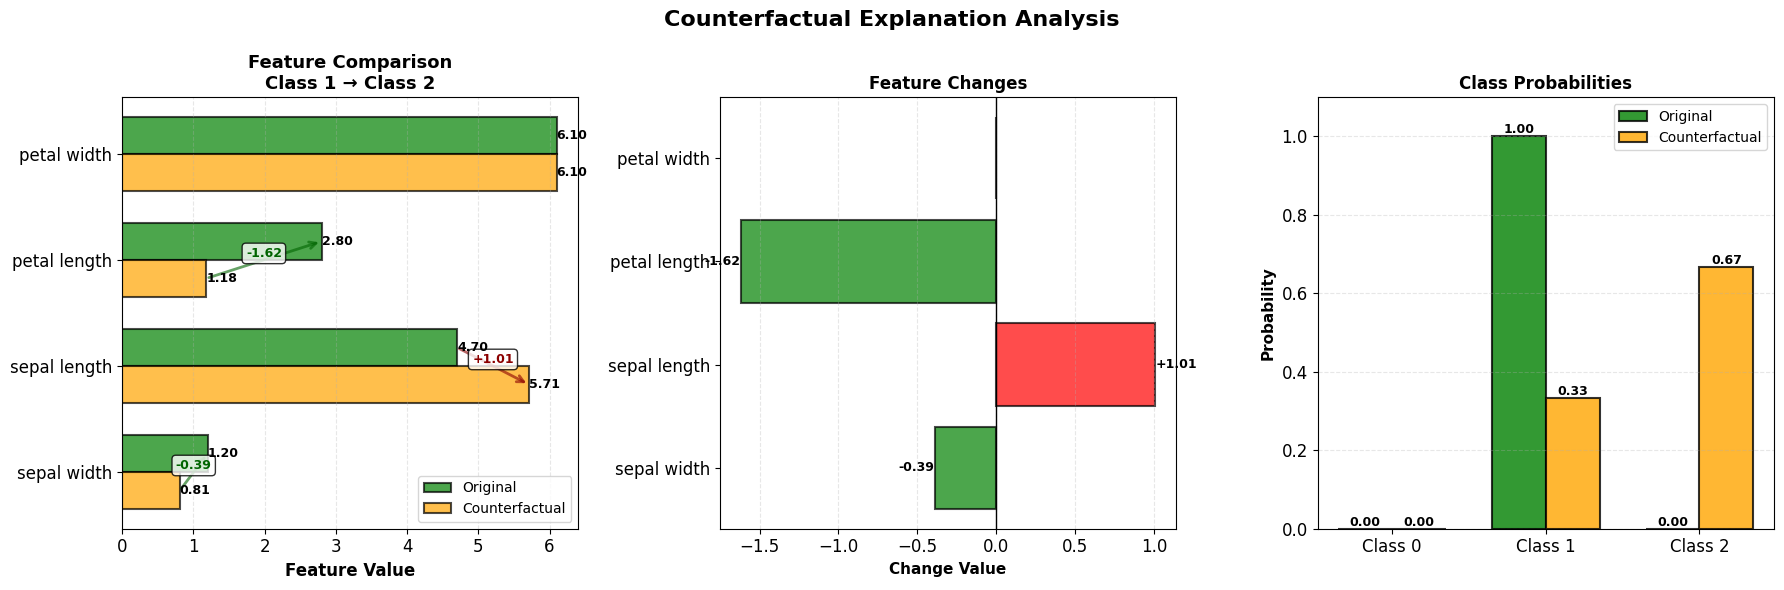

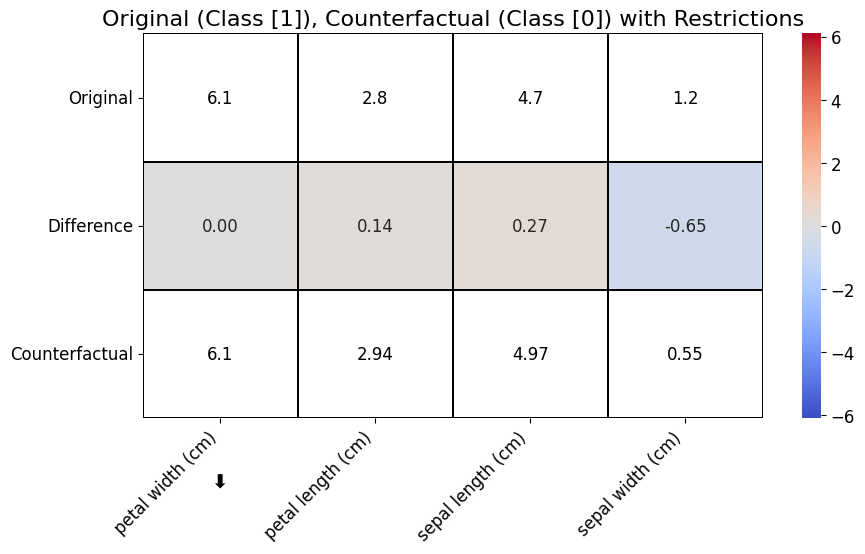

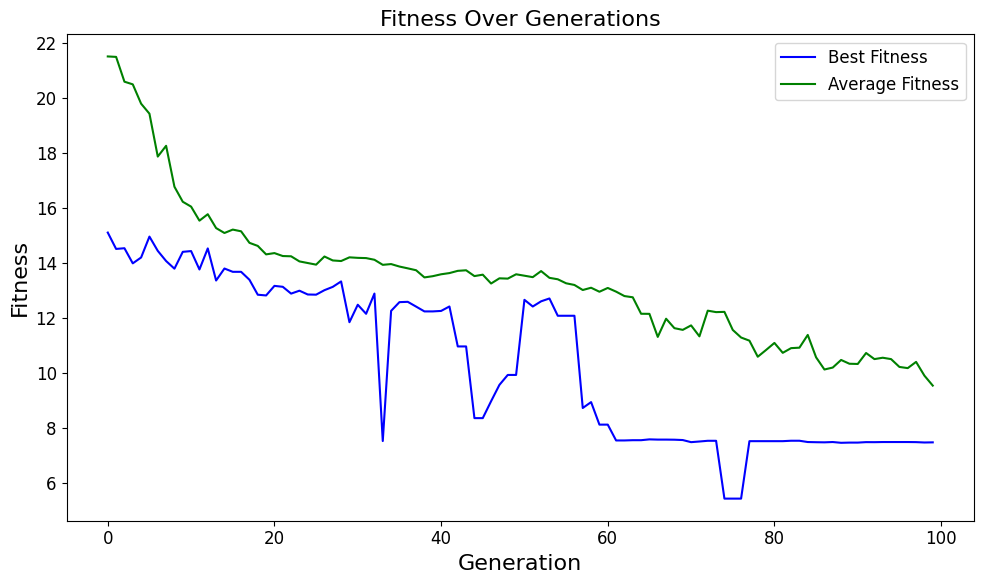

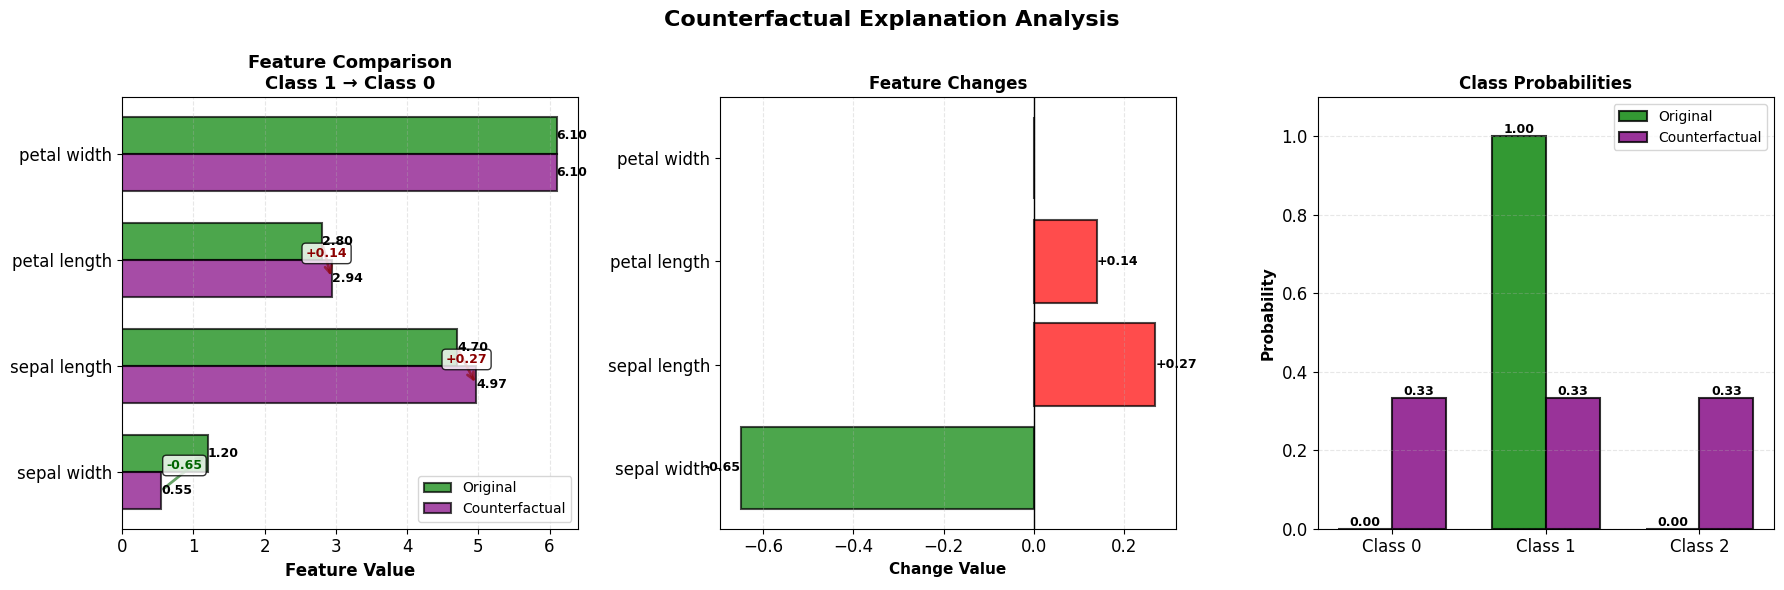

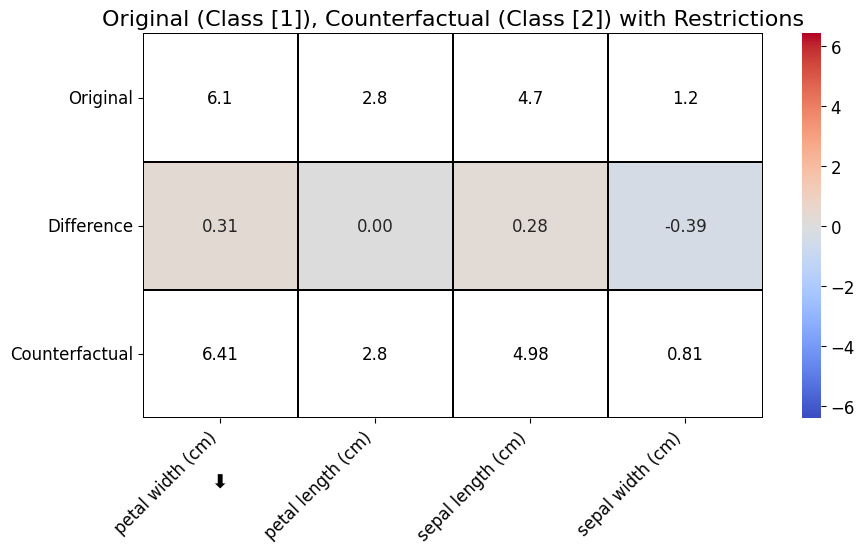

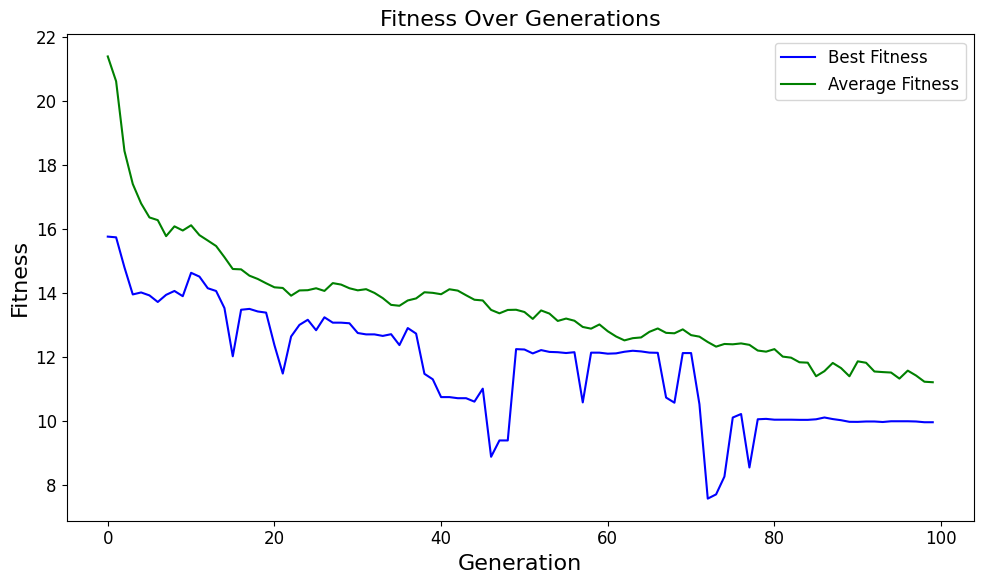

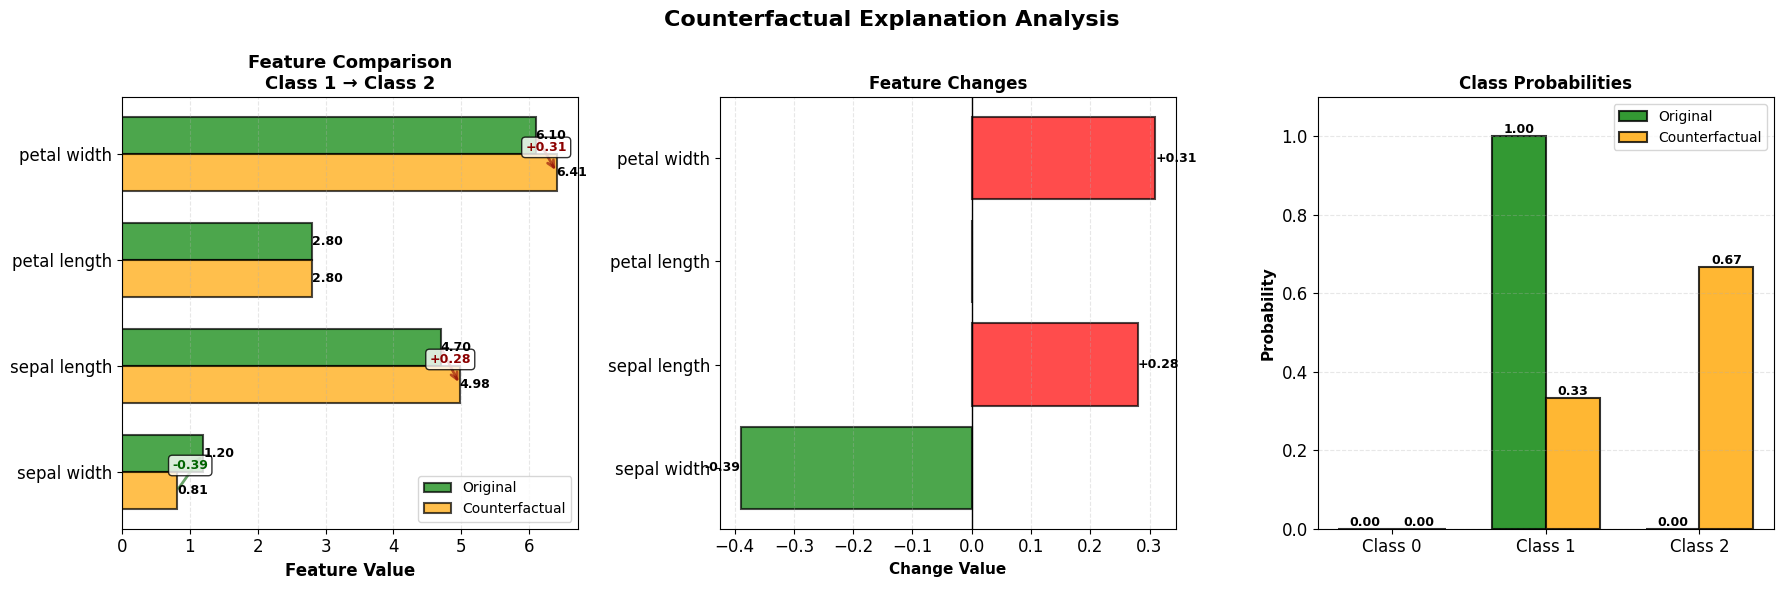

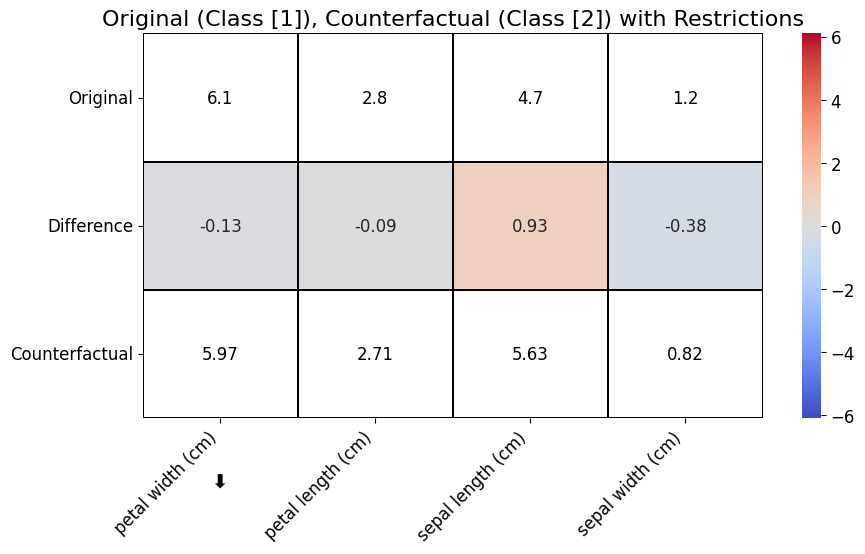

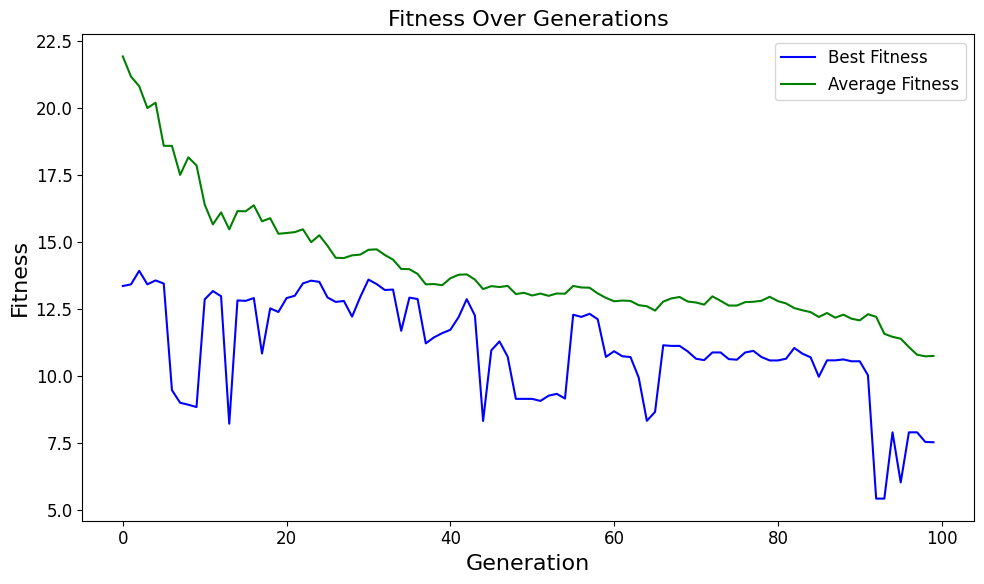

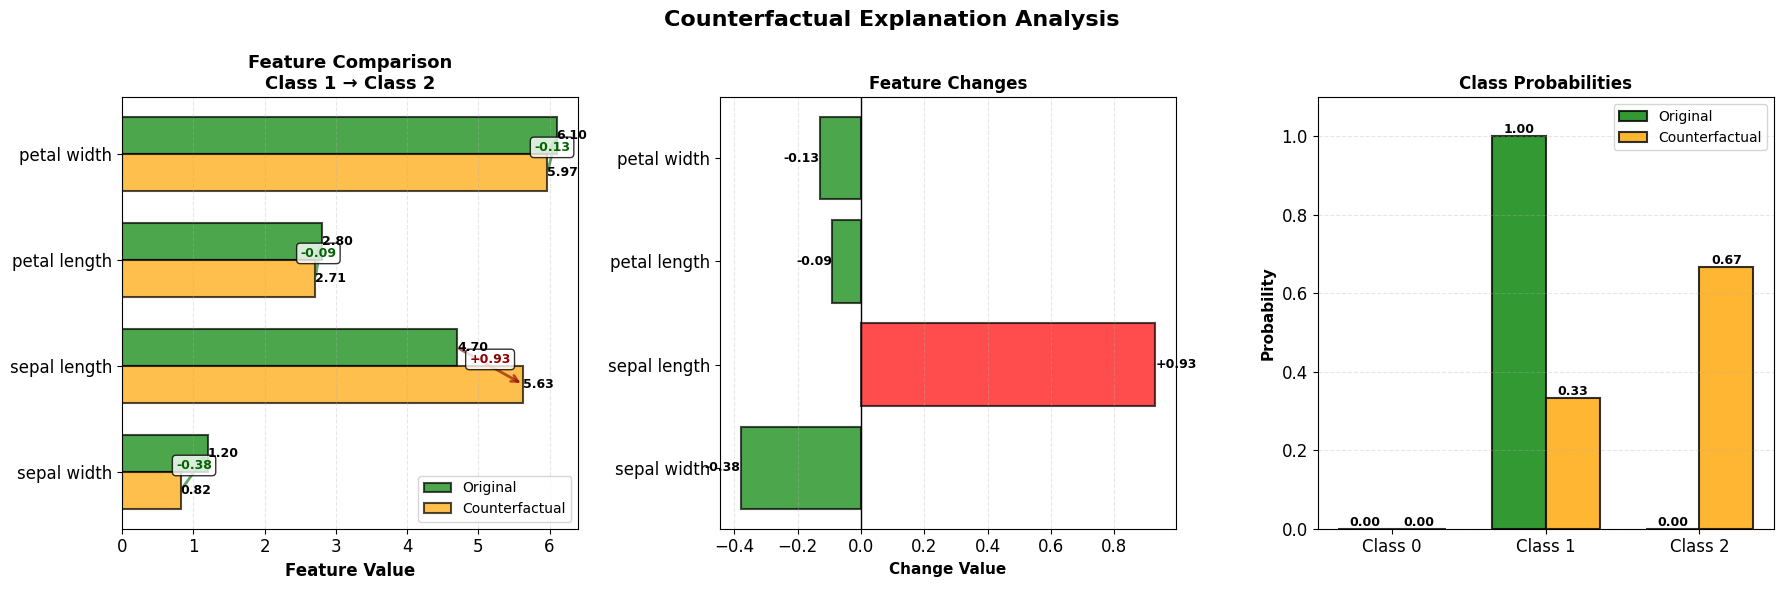

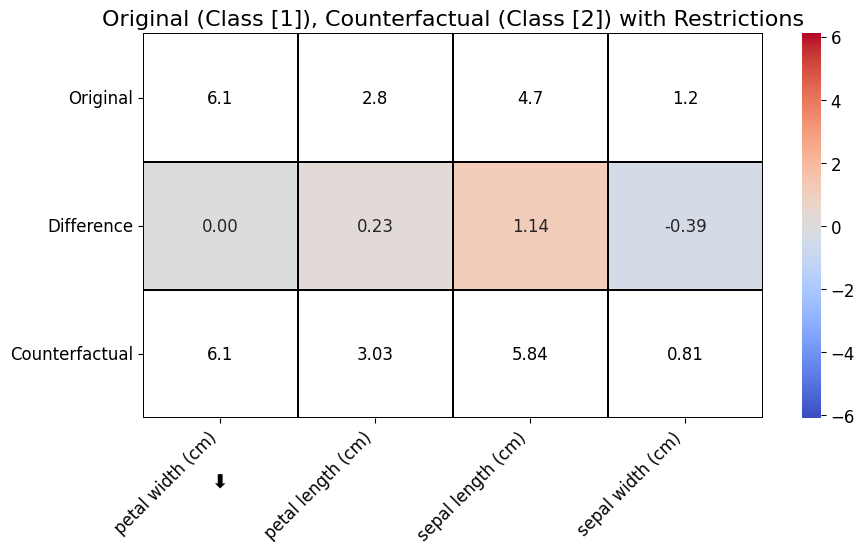

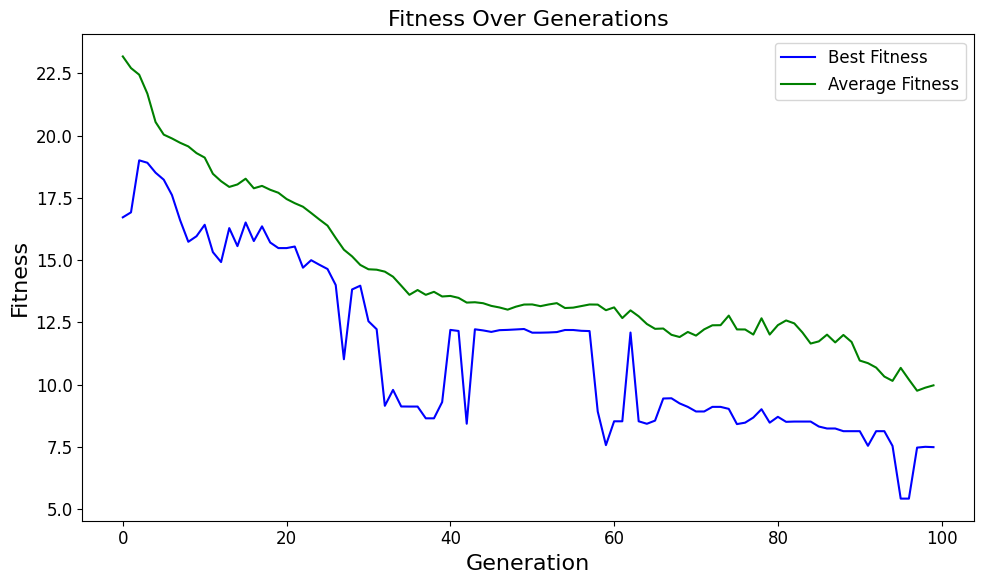

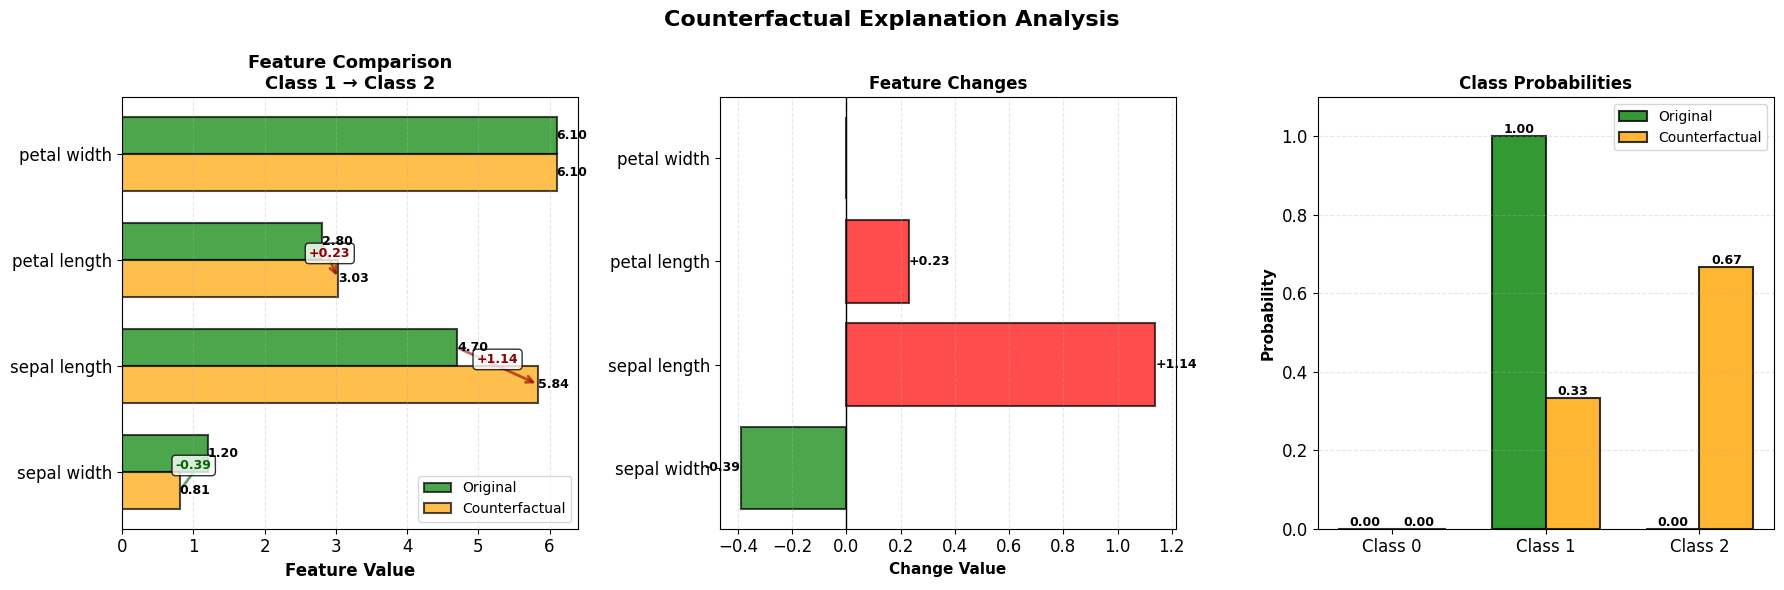

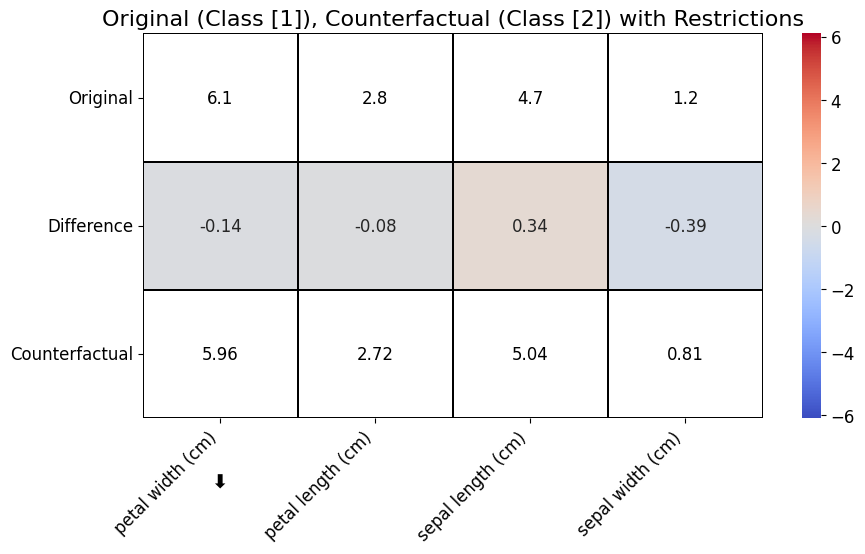

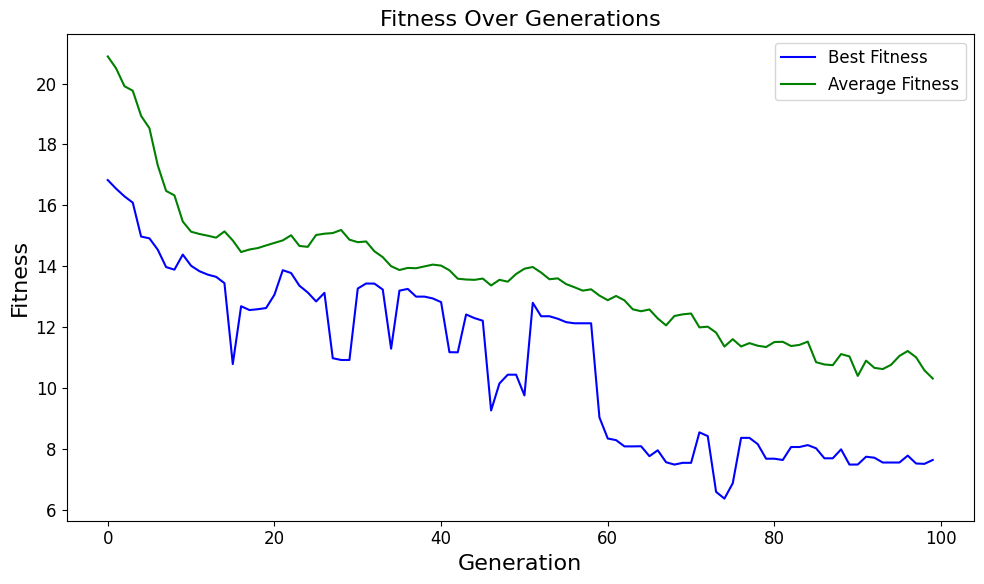

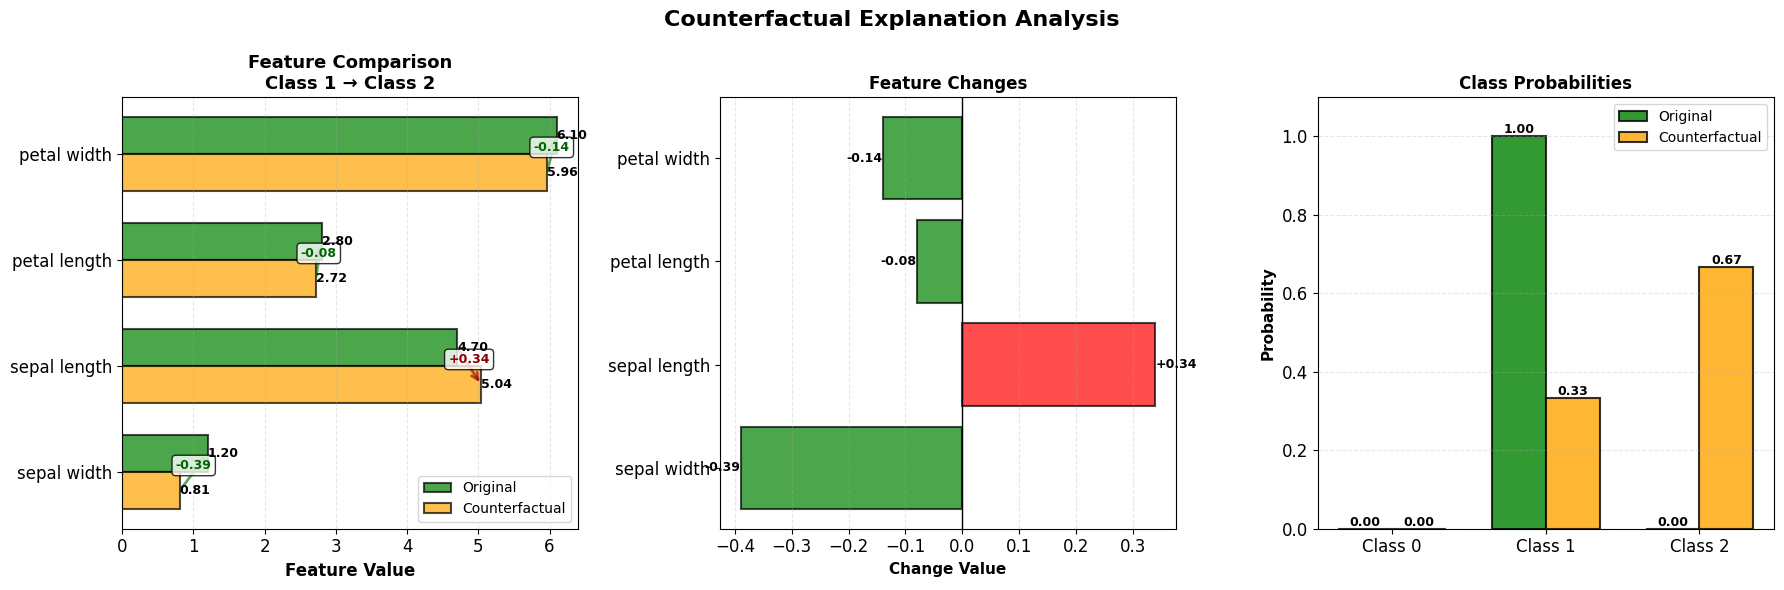

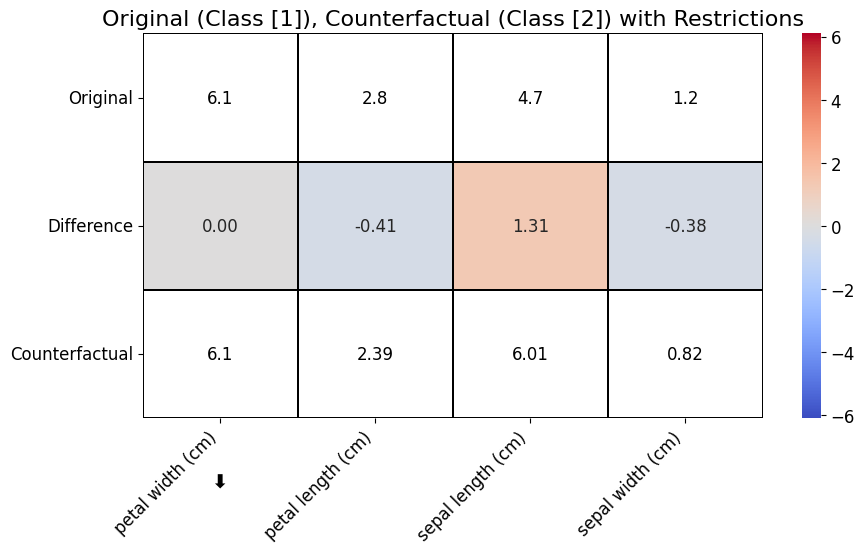

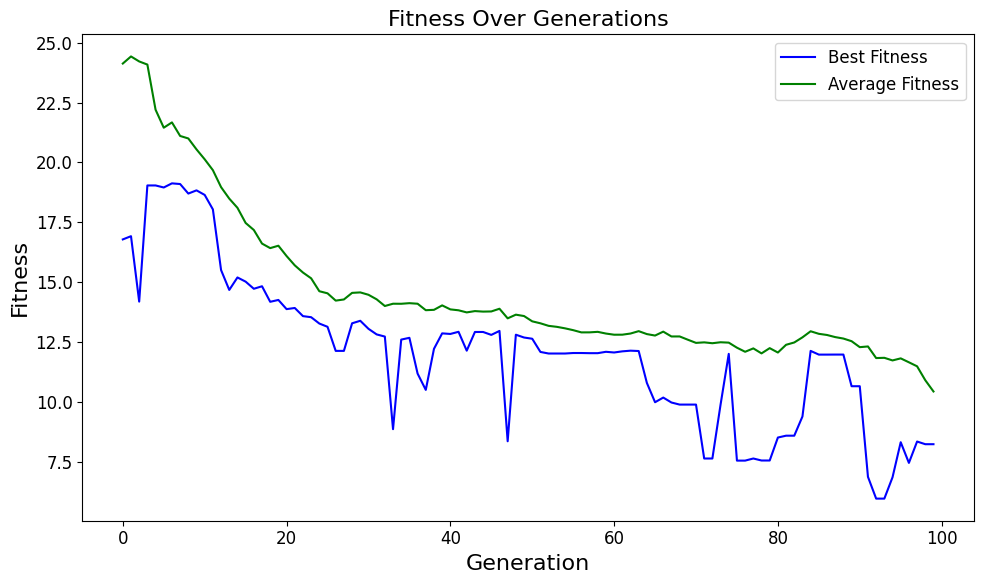

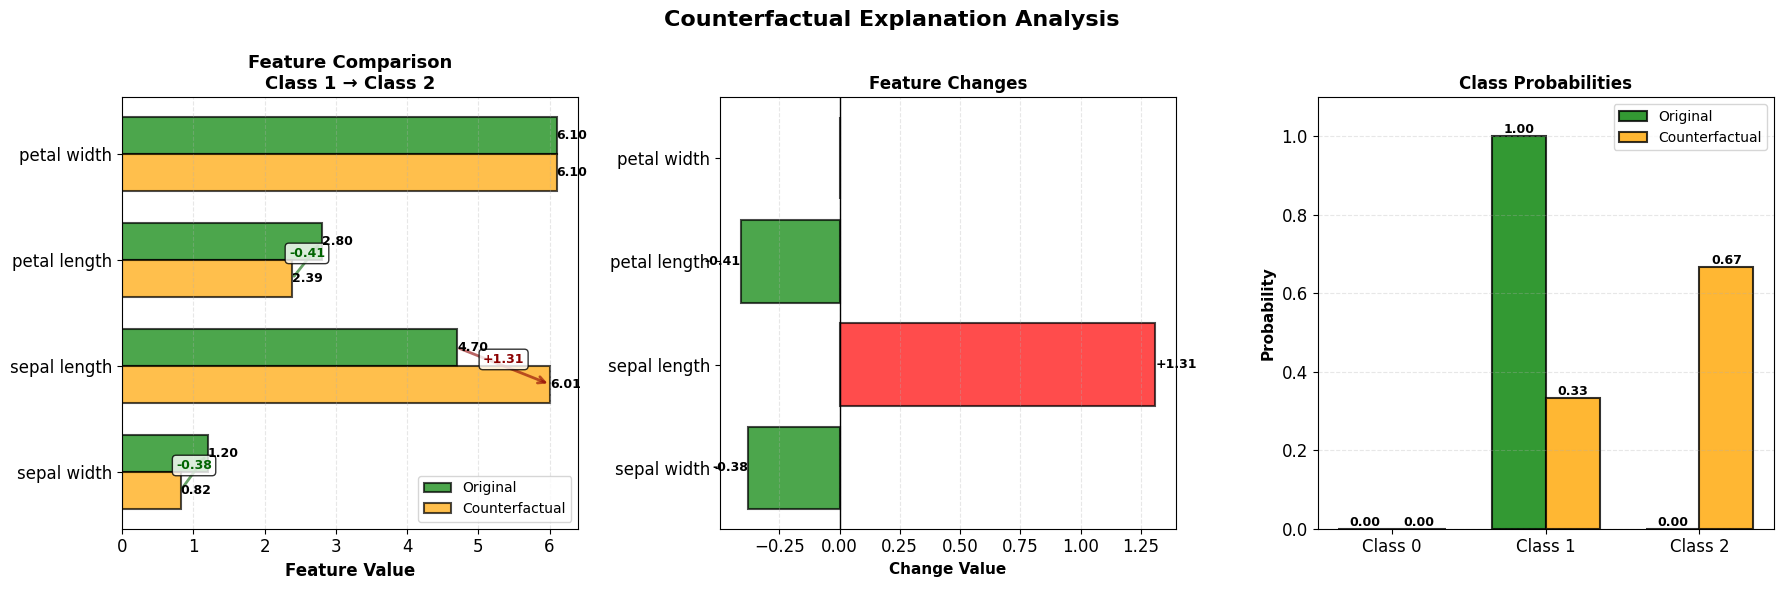

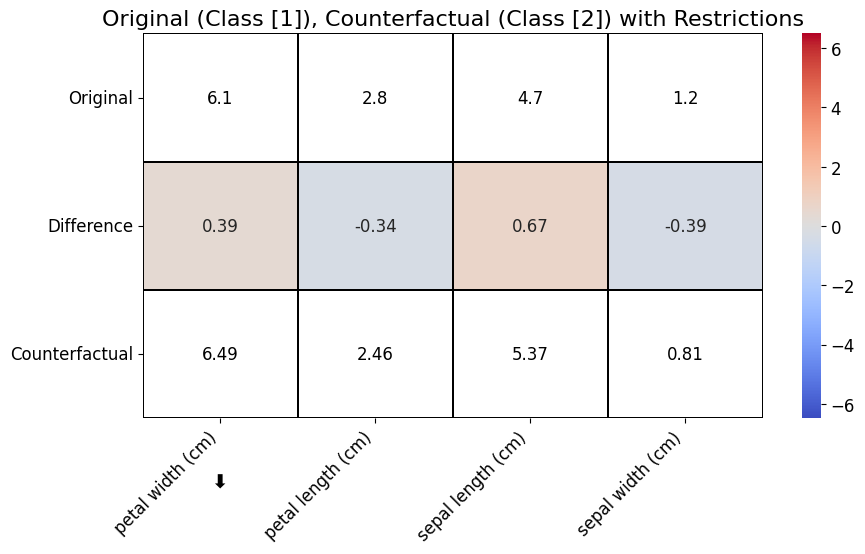

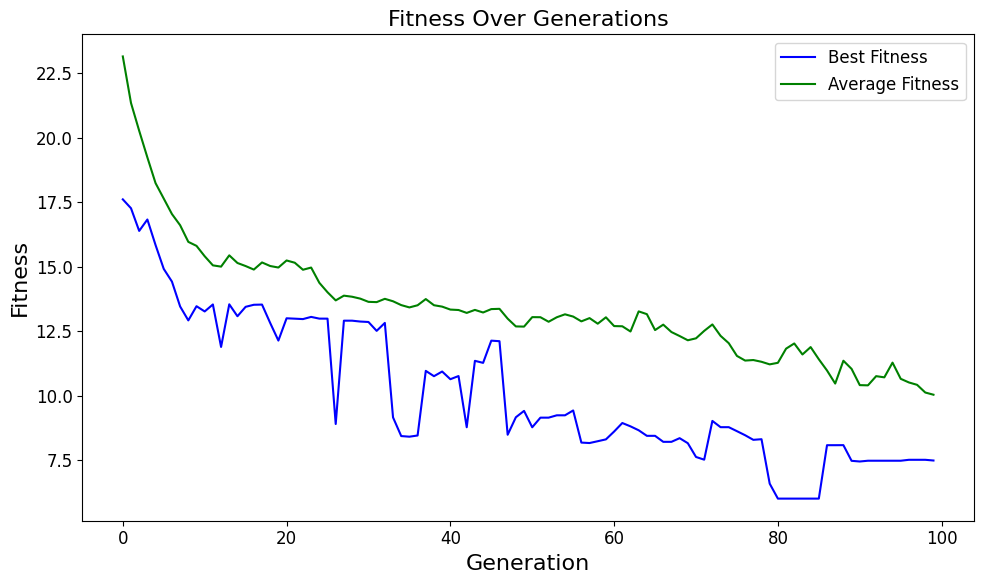

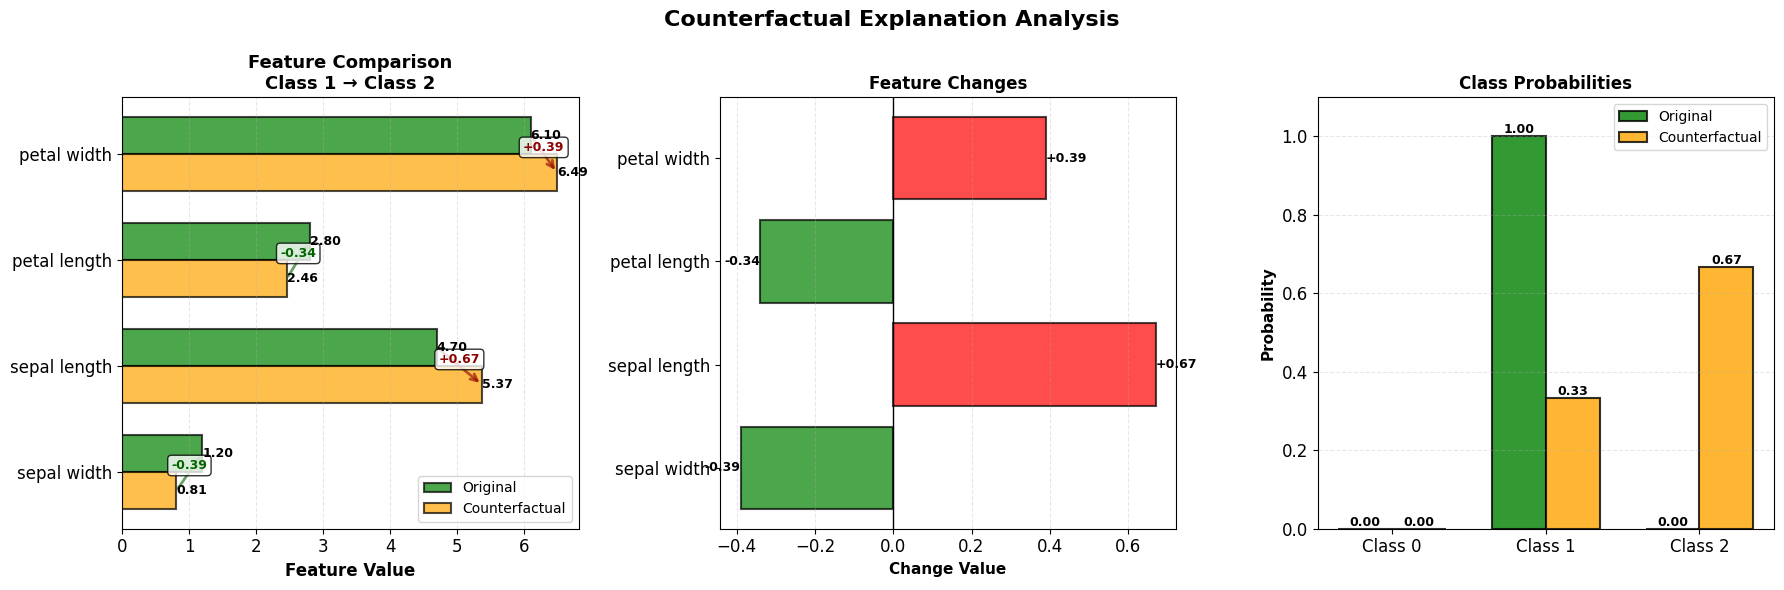

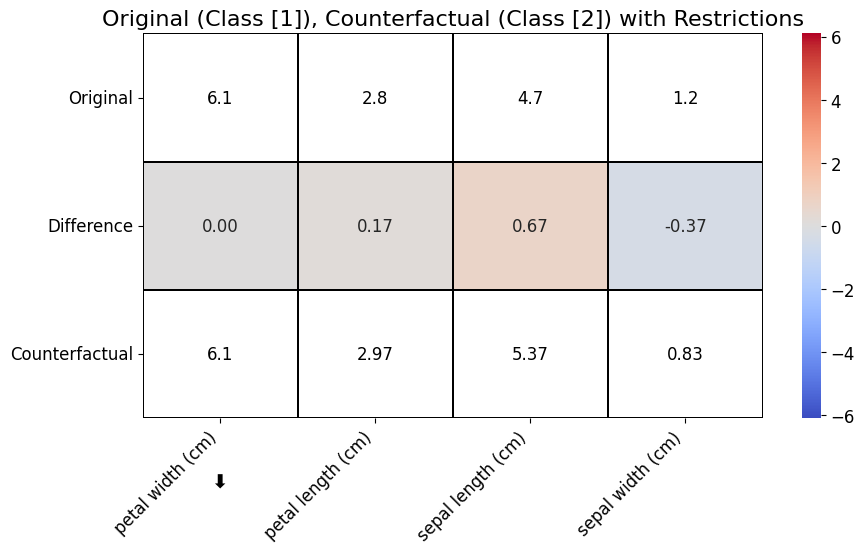

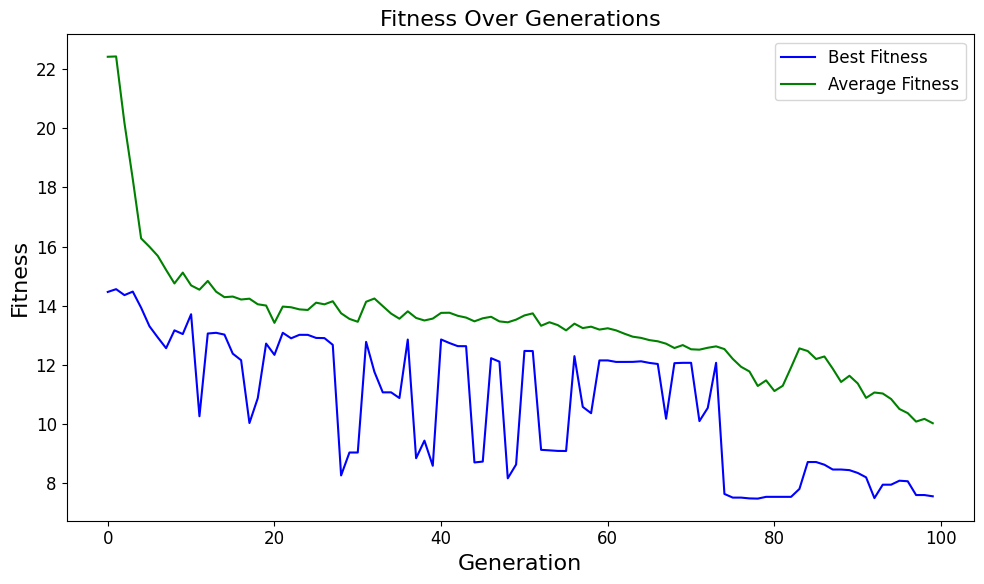

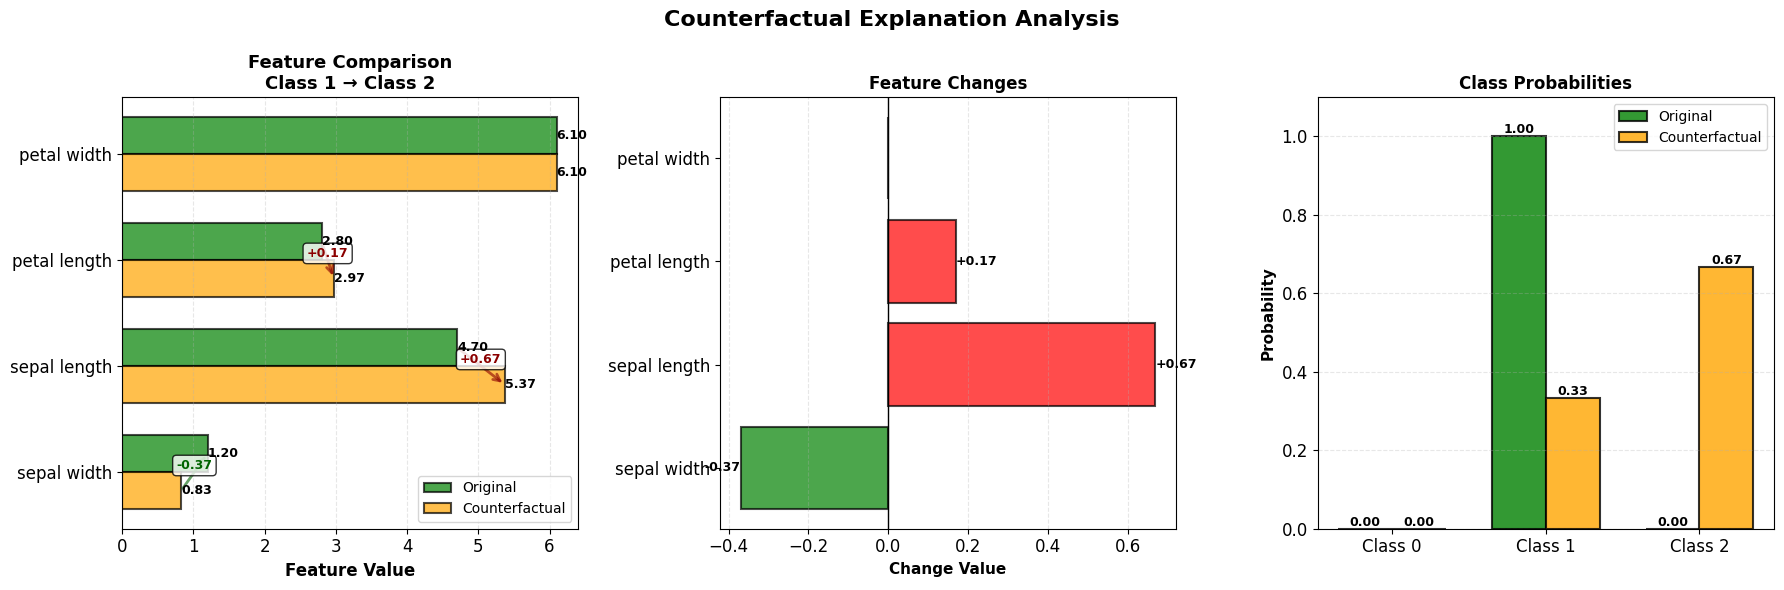

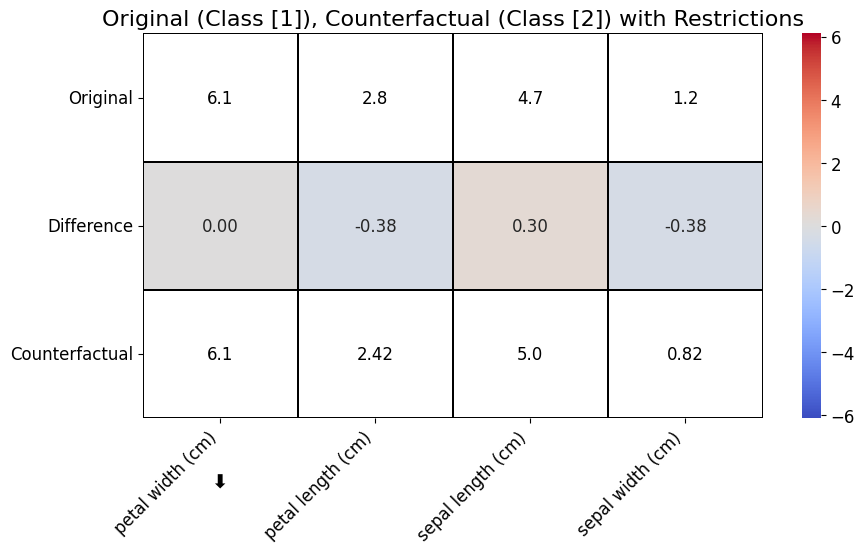

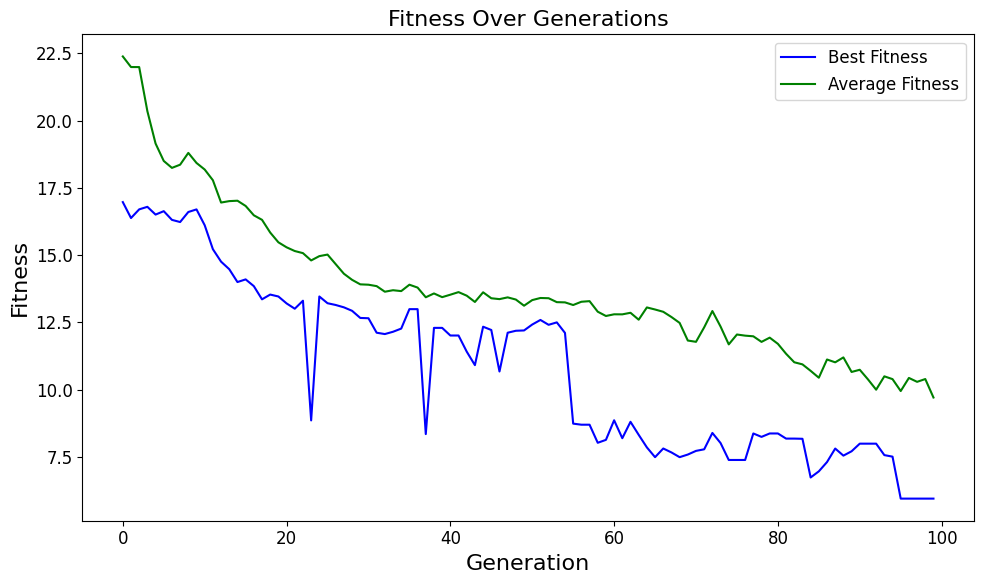

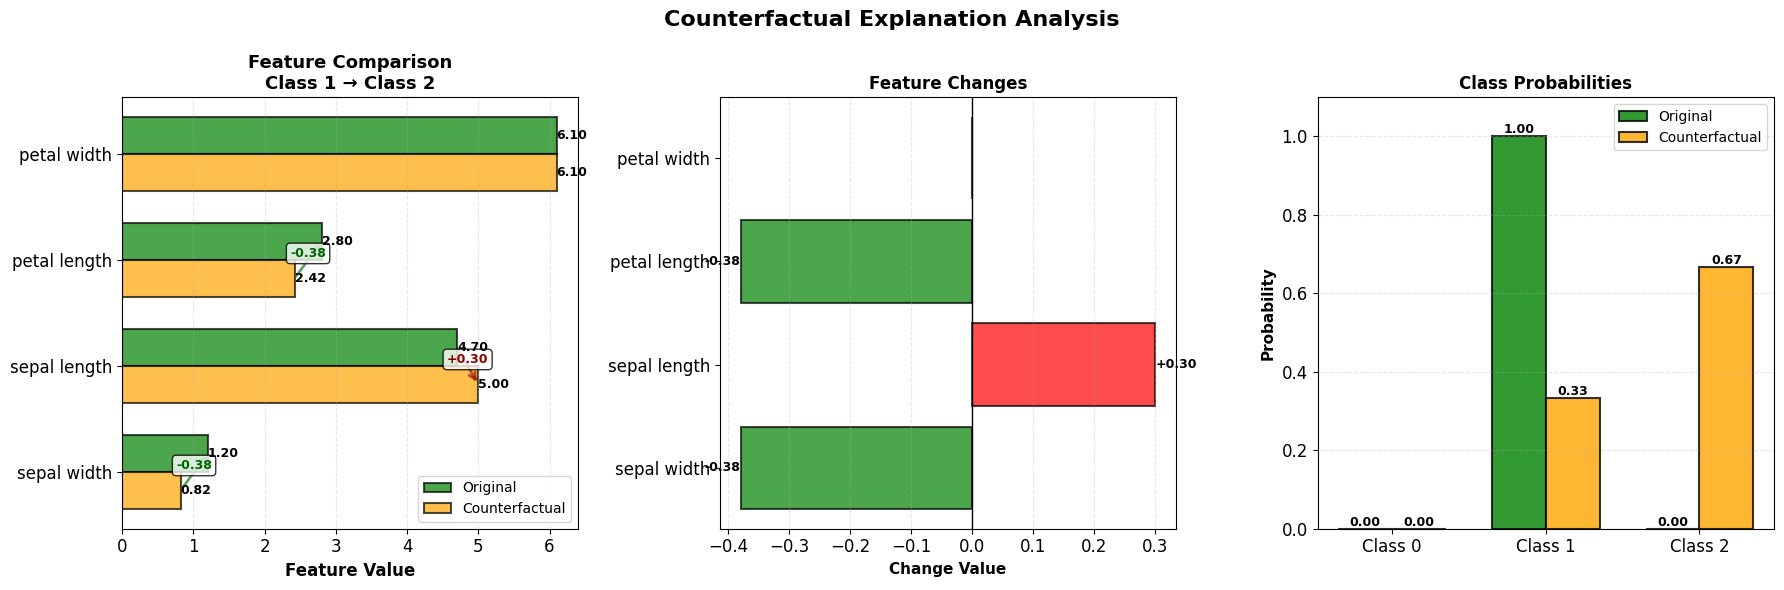

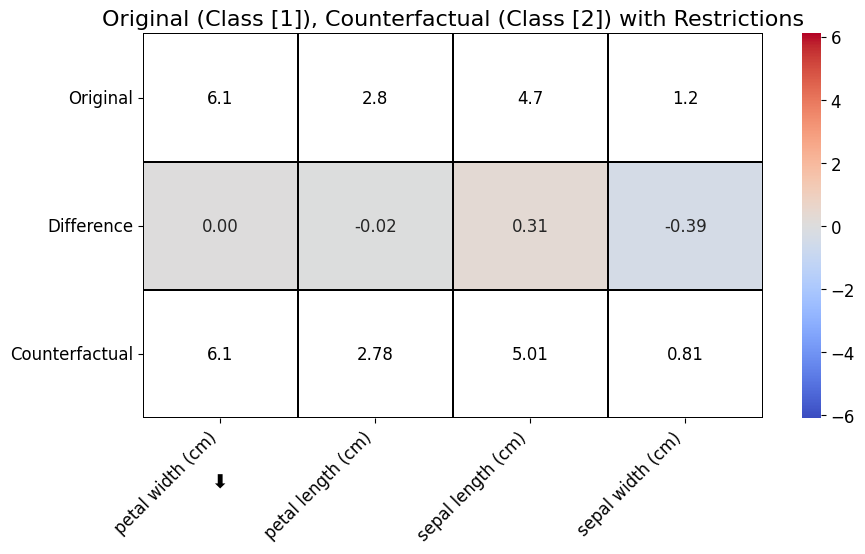

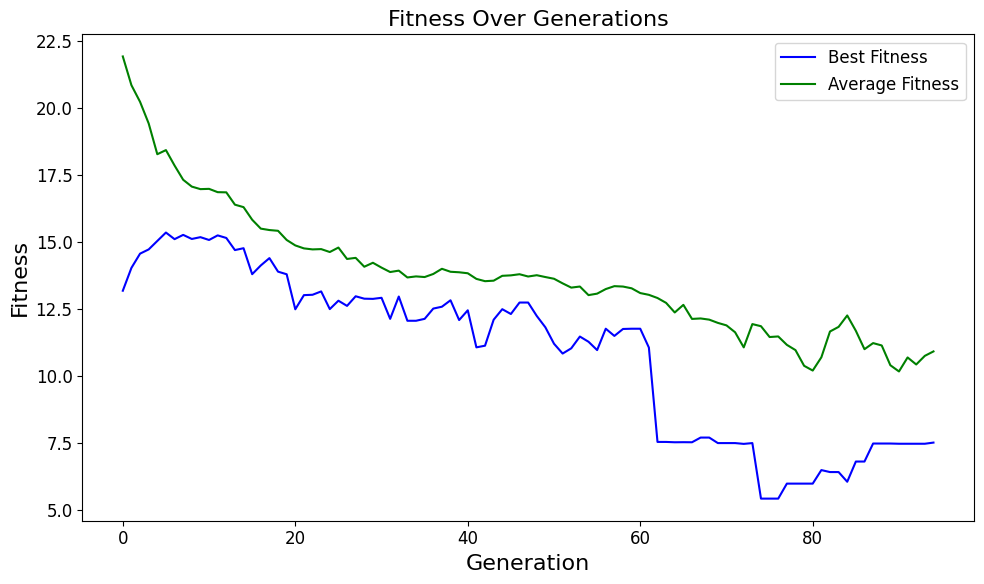

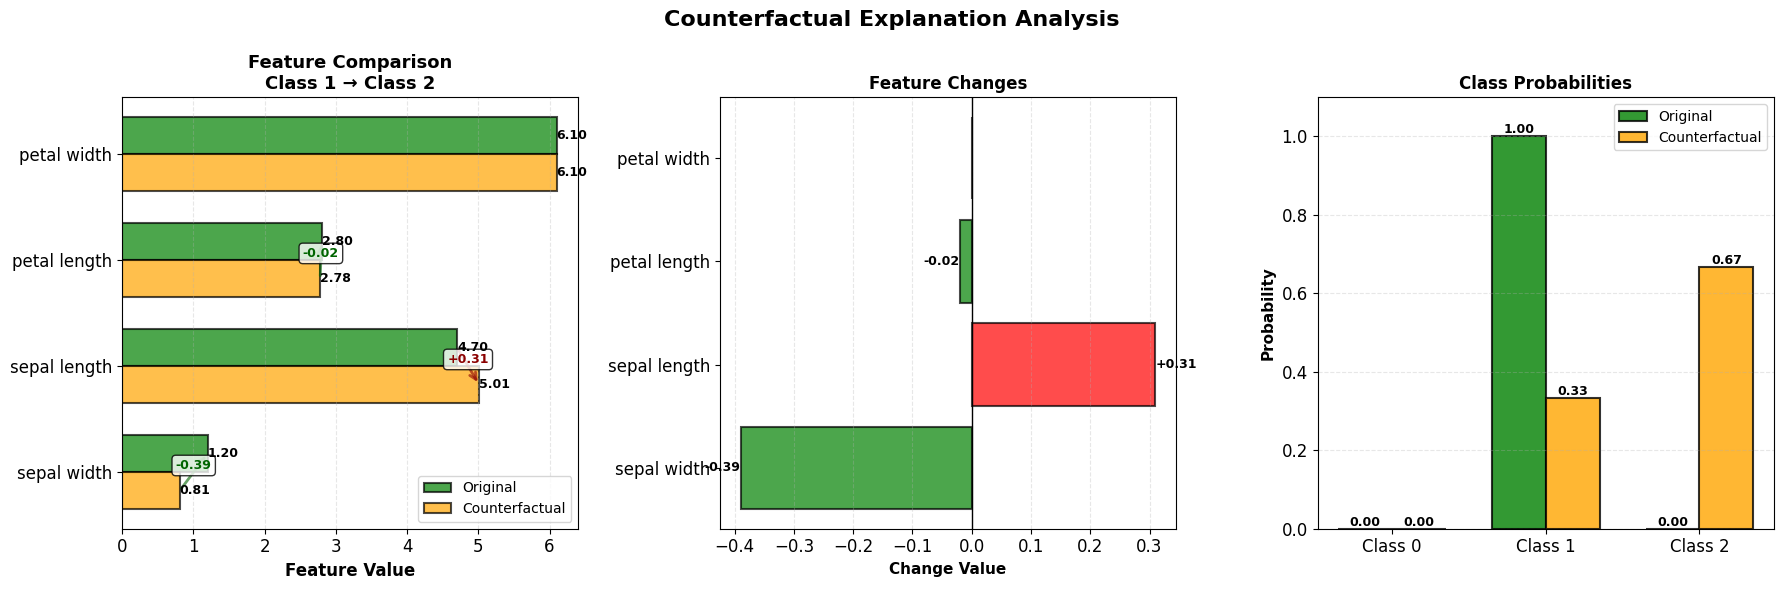

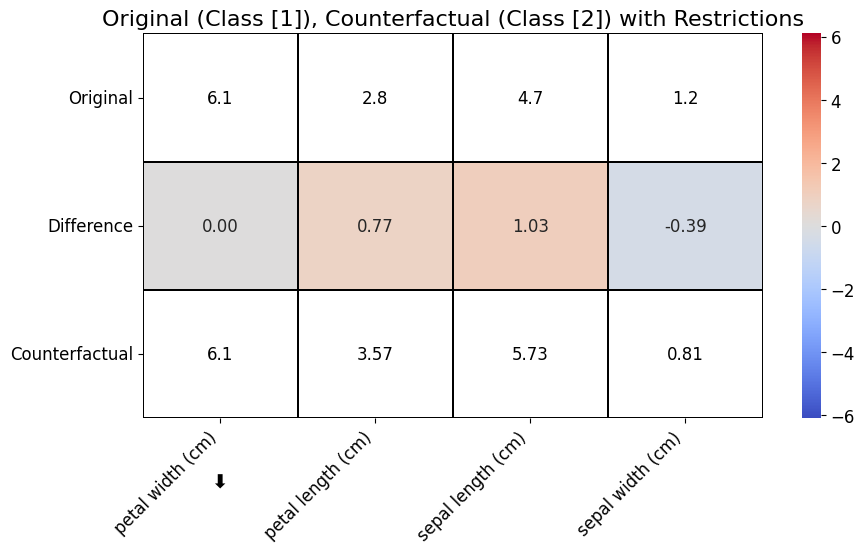

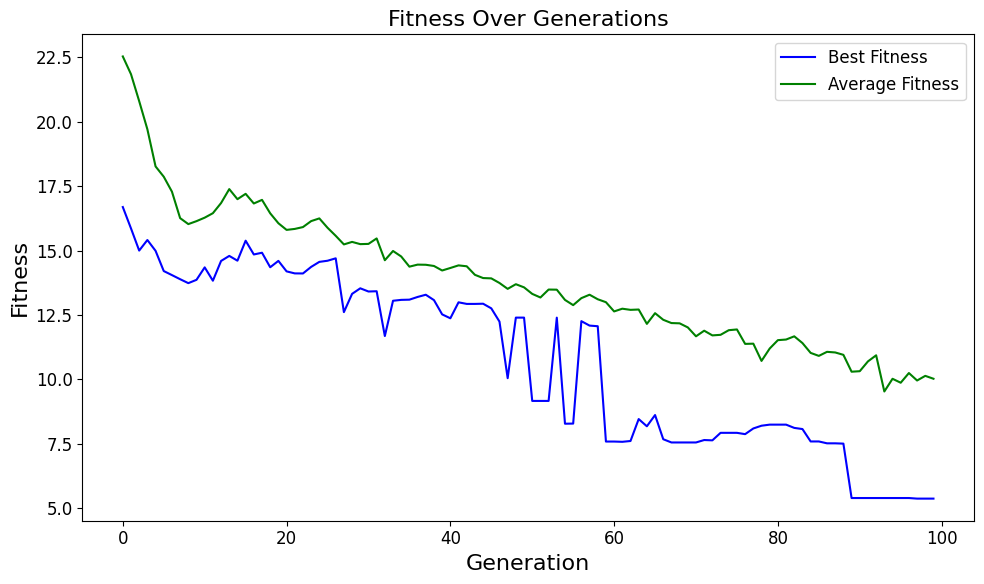

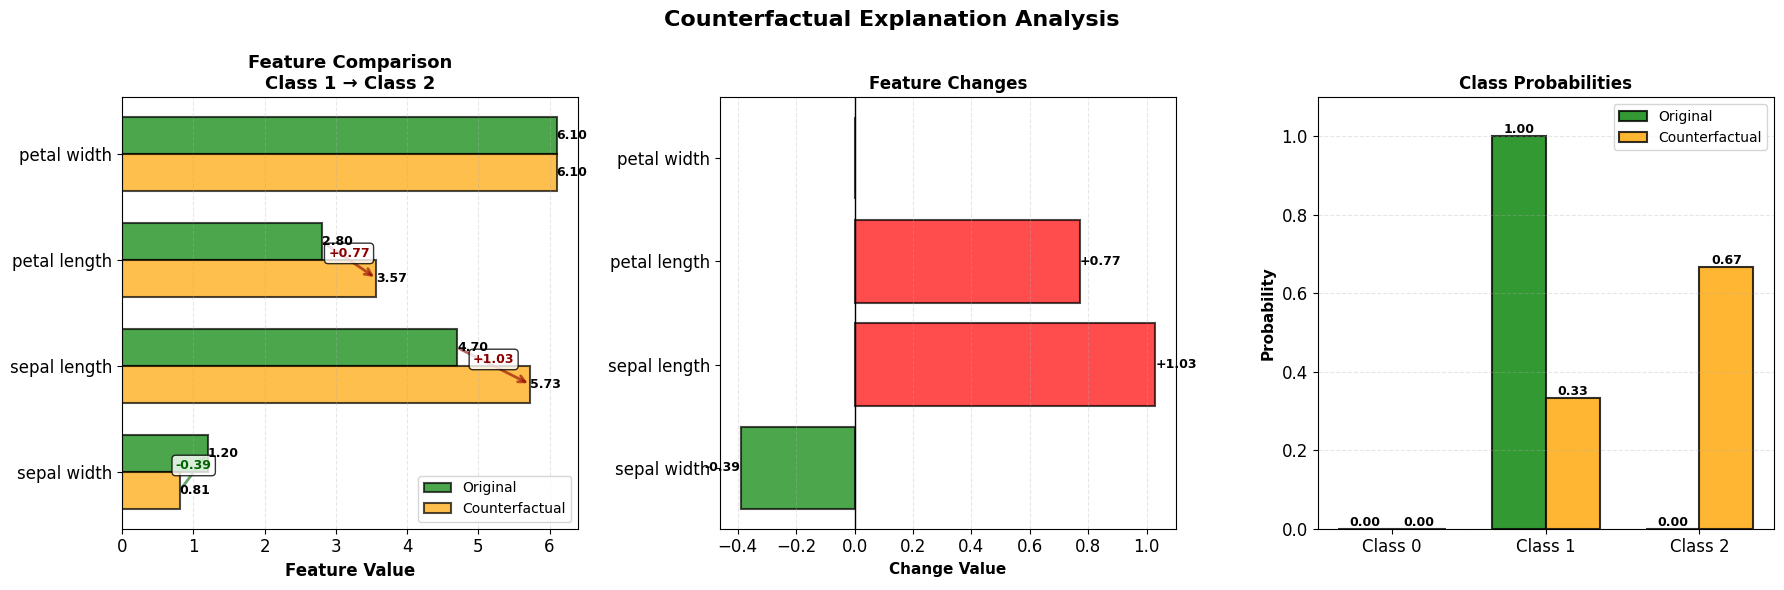

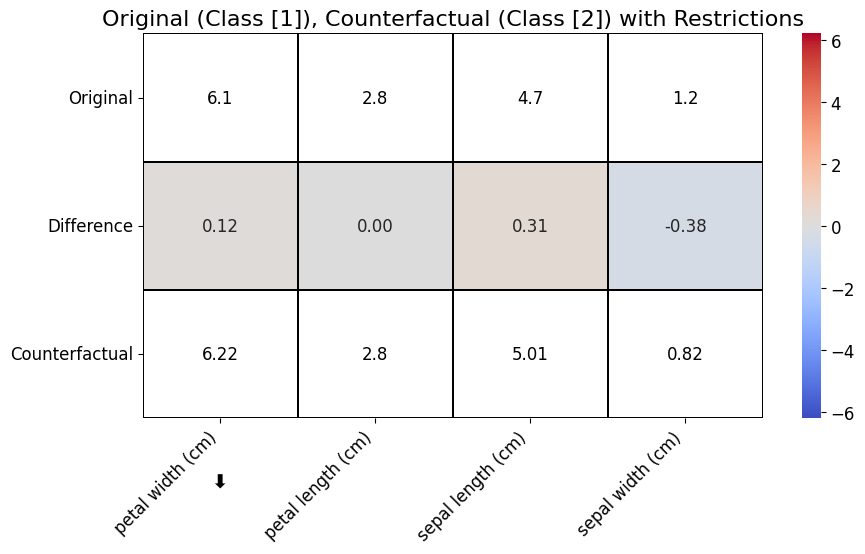

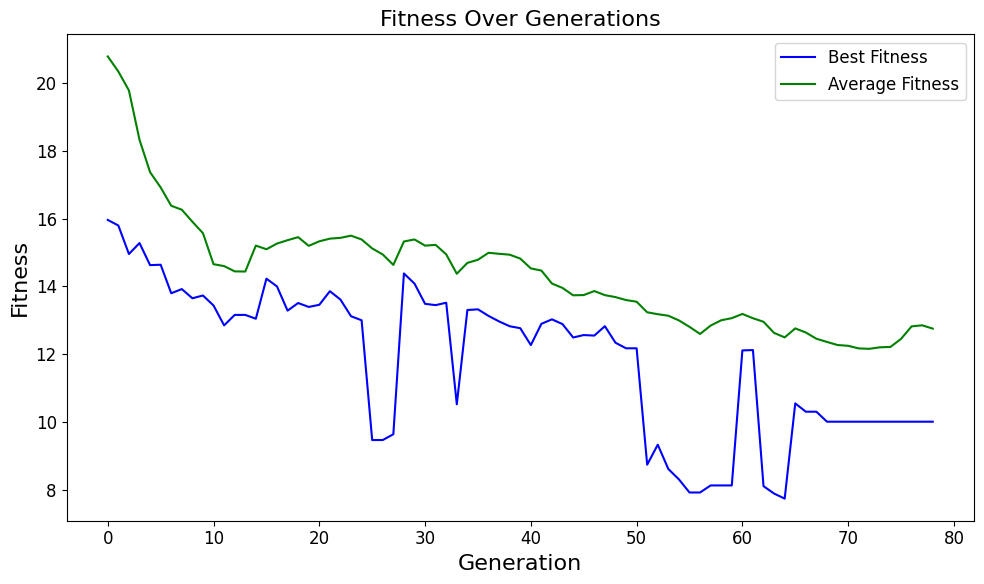

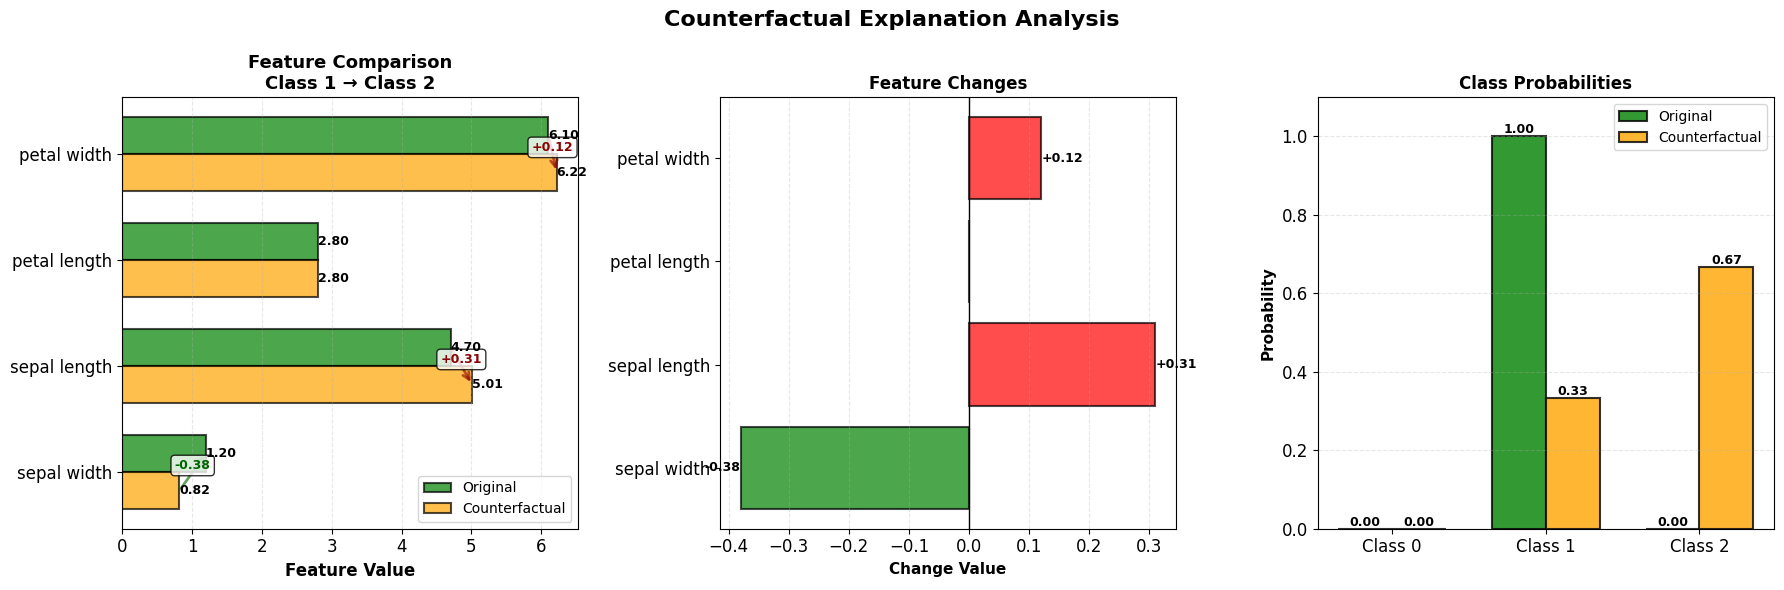

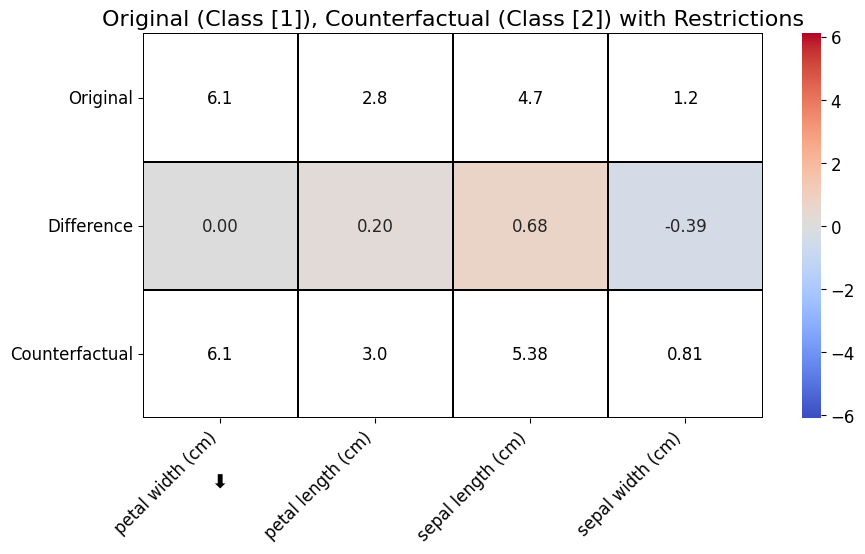

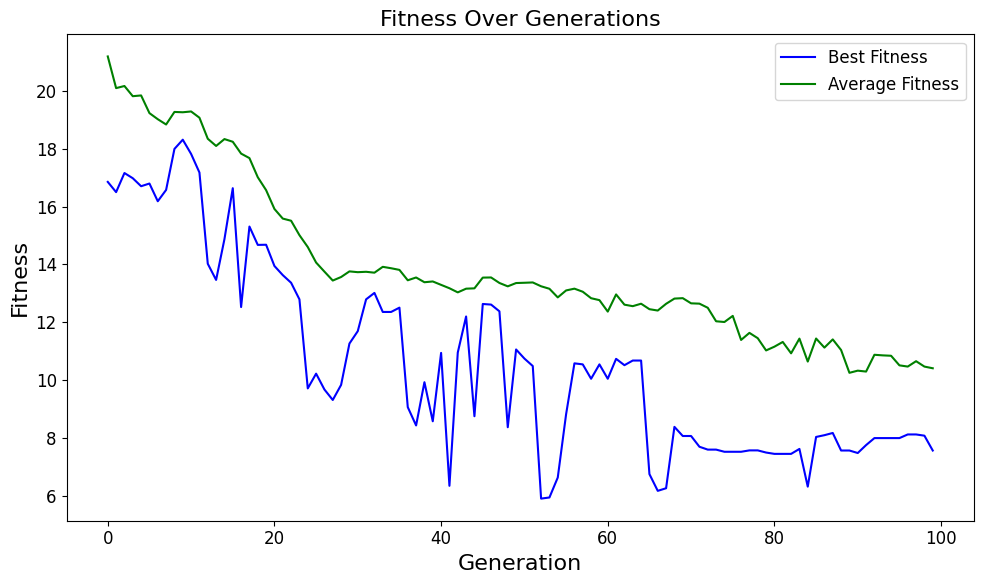

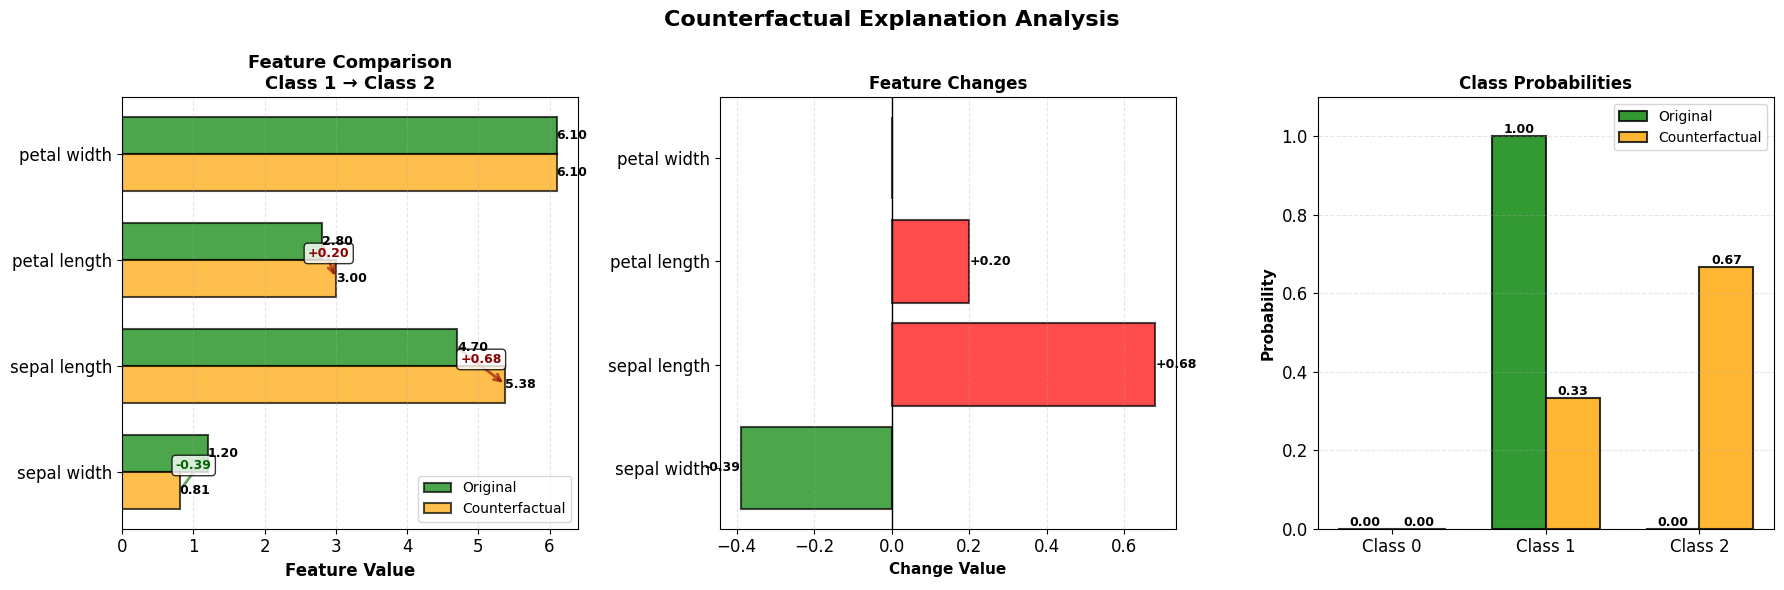

    petal width (cm)  petal length (cm)  sepal length (cm)  sepal width (cm)  \
0               6.10               3.17               4.98              0.81   
1               6.10               2.88               4.58              0.81   
2               6.10               2.39               4.97              0.81   
3               6.34               2.38               5.04              0.81   
4               6.10               3.62               5.55              0.64   
5               6.10               2.25               5.03              0.71   
6               6.10               1.18               5.71              0.81   
7               6.10               2.94               4.97              0.55   
8               6.41               2.80               4.98              0.81   
9               5.97               2.71               5.63              0.82   
10              6.10               3.03               5.84              0.81   
11              5.96               2.72 

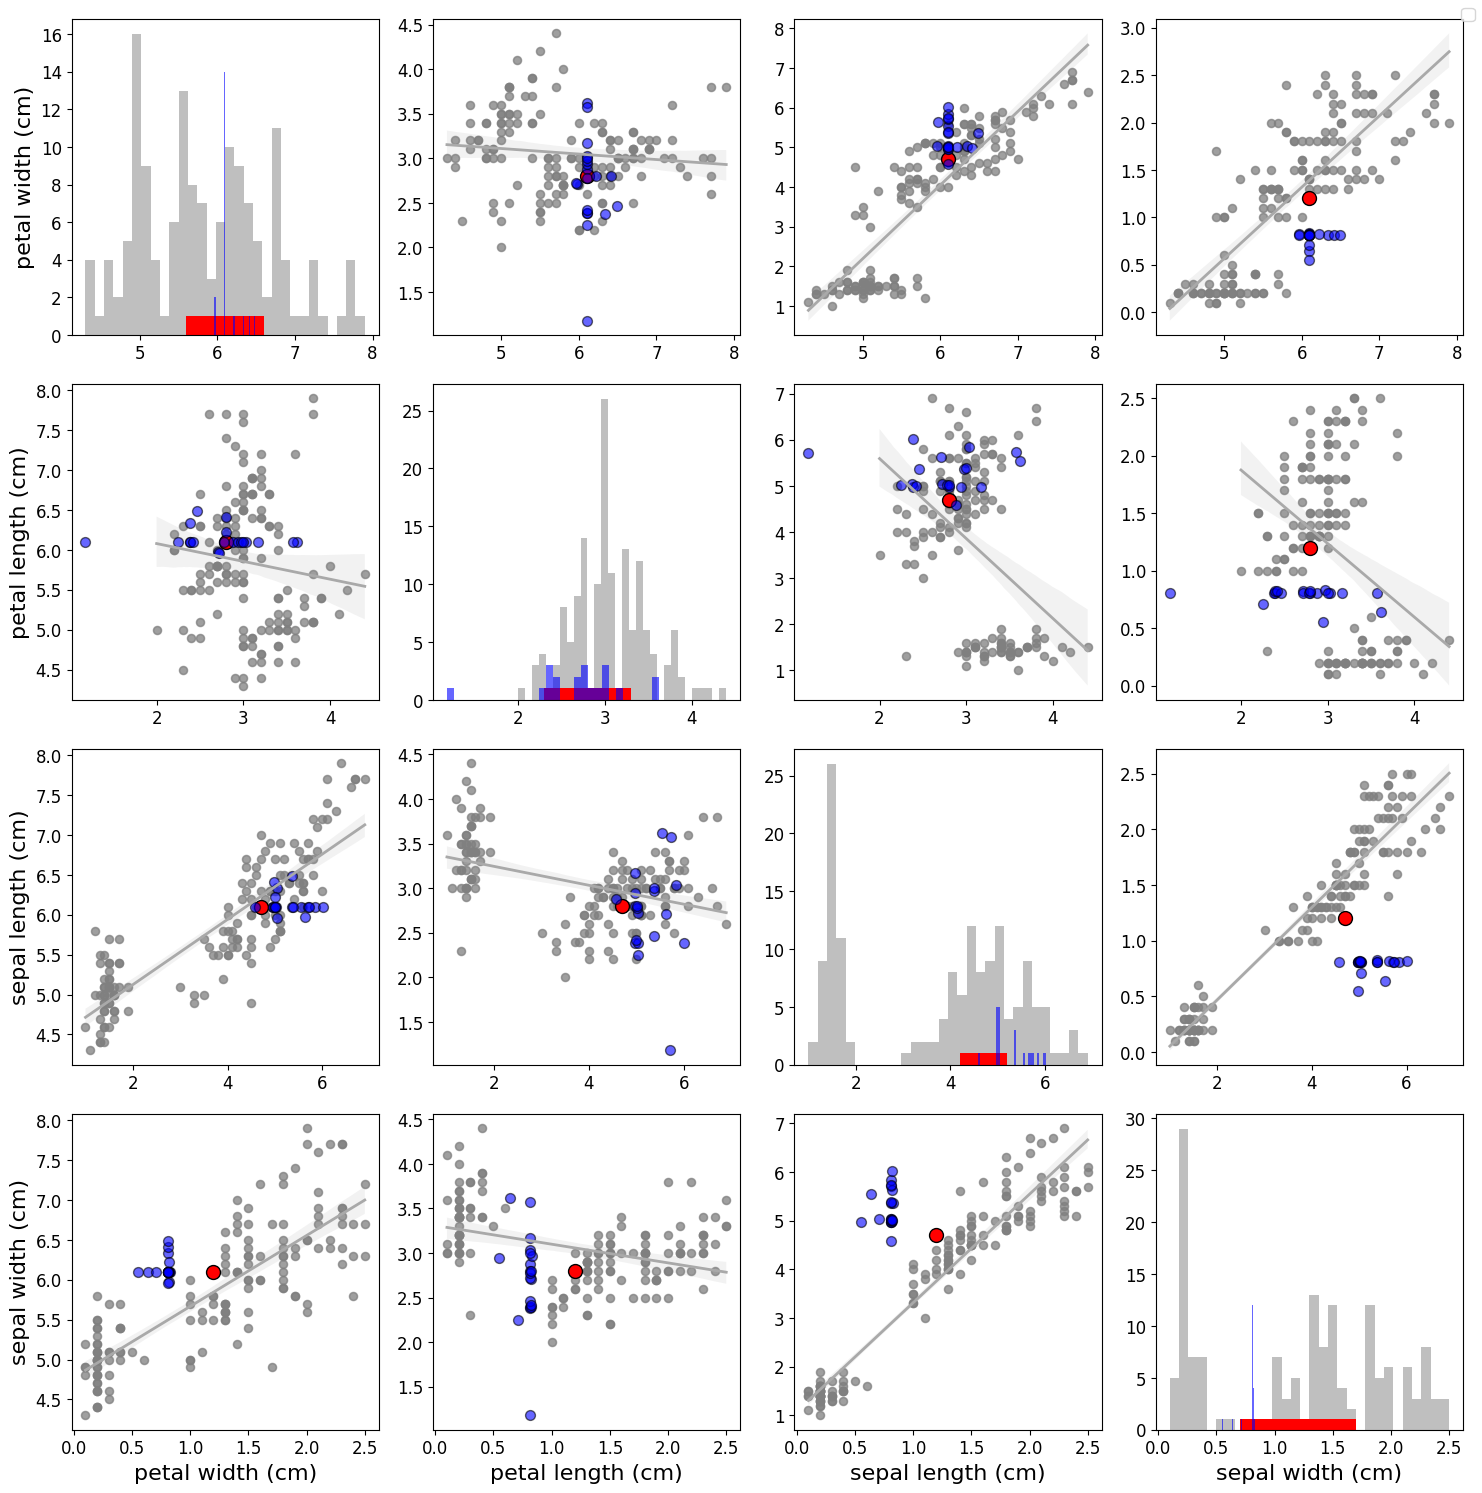

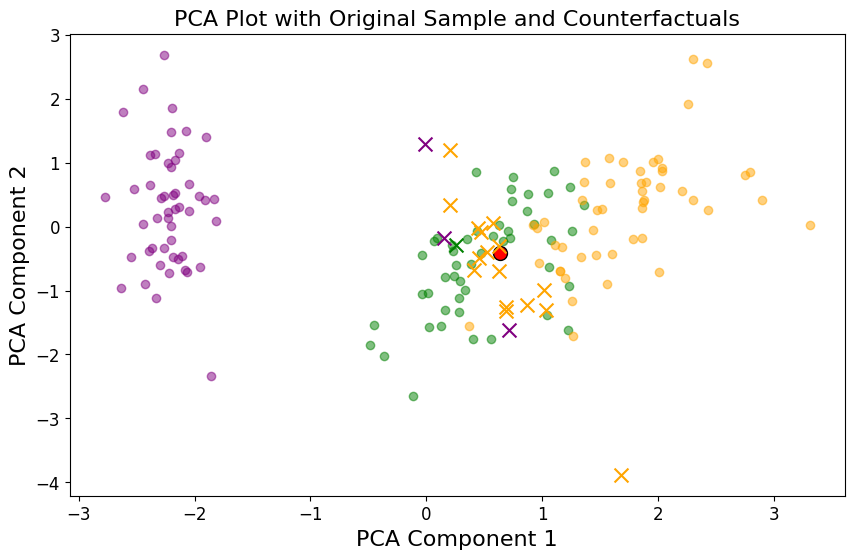

In [6]:
feature_names = list(ORIGINAL_SAMPLE.keys())
rule_combinations = list(itertools.product(rules, repeat=len(feature_names)))

counterfactuals_df = []

for replicatons in range(20):
  # Iterate through each combination of rules
    #dict_non_actionable = {'sepal width (cm)': 'no_change', 'sepal length (cm)': 'non_increasing'}
    dict_non_actionable = {'sepal width (cm)': 'non_increasing'}

    # Create an instance of the CounterFactualModel class
    cf_dpg = CounterFactualModel(MODEL, CONSTRAINTS)
    cf_dpg.dict_non_actionable = dict_non_actionable

    # Generate counterfactual
    counterfactual = cf_dpg.generate_counterfactual(ORIGINAL_SAMPLE, target_class=2)
    if (counterfactual == None):
        continue

    plot_sample_and_counterfactual_heatmap(ORIGINAL_SAMPLE, ORIGINAL_SAMPLE_PREDICTED_CLASS, counterfactual,  MODEL.predict(pd.DataFrame([counterfactual])),  dict_non_actionable)
    cf_dpg.plot_fitness()
    plot_sample_and_counterfactual_comparison(MODEL, ORIGINAL_SAMPLE, SAMPLE_DATAFRAME, counterfactual, CLASS_COLORS_LIST)


    # Prepare data for DataFrame
    cf_data = counterfactual.copy()
    cf_data.update({'Rule_' + k: v for k, v in dict_non_actionable.items()})

    # Append to DataFrame
    counterfactuals_df.append(cf_data)

counterfactuals_df = pd.DataFrame(counterfactuals_df)
# Displaying the DataFrame
print(counterfactuals_df)

plot_pairwise_with_counterfactual_df(MODEL, IRIS_FEATURES, IRIS_LABELS, ORIGINAL_SAMPLE, counterfactuals_df)
plot_pca_with_counterfactuals(MODEL, pd.DataFrame(IRIS_FEATURES), IRIS_LABELS, ORIGINAL_SAMPLE, counterfactuals_df)
